In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.dates import DateFormatter

%matplotlib inline
pd.set_option('display.max_rows', 200)

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

**IMPORT AND FORMAT DATAFRAMES**

In [10]:
df = pd.read_excel('C:/Users/adam_/OneDrive/Documents/pip_apps/app_data/Data2.xlsx', sheet_name='data')

In [11]:
df.head()

,time,crude_ton_per_day,crude_m3h,crude_sg,crude_sulphur_wtpct,lssr_ton_per_day,lssr_sg,lssr_m3h,lssr_sulphur_wtpct,desalter_water_m3h,...,lssr_t002_sulphur_wtpct,lssr_t003_m3h,lssr_t003_sg,lssr_t003_sulphur_wtpct,j70a_on_off,j70b_on_off,j70c_on_off,steam_vent_new_t/h,steam_vent_cogen1_th,steam_vent_cogen2_th
0,PI TAG,CNM10041,CNM10012,CDNIN.00,CSUIN.00,CCFI0295,CDNBL.00,CPFI0295,CSUBL.00,CPFI0007,...,TSU002.00,UPFC2008,TDN003A.00,TSU003.00,CJRR070A,CJRR070B,CJRR070C,PPFC1138.C,MPHC1022.C,MPHC2037.C
1,2013-01-11 00:00:00,11133.8,555.98,0.8344,Arc Off-line,714.037,0.9445,37.553,0.58,10.3248,...,0.859,0,No Data,0.92,No Data,No Data,No Data,No Data,No Data,No Data
2,2013-01-12 00:00:00,10771.5,538.79,0.833,Arc Off-line,640.831,0.949,34.1541,0.582,9.39082,...,0.859,0,No Data,0.92,No Data,No Data,No Data,No Data,No Data,No Data
3,2013-01-13 00:00:00,11080.9,555.799,0.8305,Arc Off-line,1023.18,0.9439,51.4376,0.546,9.33179,...,0.859,0,No Data,0.92,No Data,No Data,No Data,No Data,No Data,No Data
4,2013-01-14 00:00:00,11534.8,577.177,0.8311,Arc Off-line,981.602,0.9399,48.3774,0.62,8.70376,...,0.859,0,No Data,0.92,NOTRUN,NOTRUN,RUN,No Data,No Data,No Data


In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 306 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   time                             object
 1   crude_ton_per_day                object
 2   crude_m3h                        object
 3   crude_sg                         object
 4   crude_sulphur_wtpct              object
 5   lssr_ton_per_day                 object
 6   lssr_sg                          object
 7   lssr_m3h                         object
 8   lssr_sulphur_wtpct               object
 9   desalter_water_m3h               object
 10  desalter_salt_in_ptb             object
 11  desalter_stg1_salt_out_ptb       object
 12  desalter_stg2_salt_out_ptb       object
 13  b1a_tin                          object
 14  b1a_tout                         object
 15  b1b_tin                          object
 16  b1b_tout                         object
 17  e1_flashzone_temp               

In [13]:
#extract tag data to separate dataframe
tags = pd.DataFrame(df.iloc[0,:])
tags.columns = ['pi_tags']
tags.drop(tags.index[0], inplace=True)

#drop the tags from main data df
df.drop(df.index[0], inplace=True)

In [14]:
df.time = pd.to_datetime(df.time, dayfirst=True)
df.set_index('time', inplace=True)

In [15]:
missing_data_list = ['Bad', 'Bad Input', 'I/O Timeout', 'Shutdown', 'No Data', 'Configure', '#VALUE!', 
                     'Calc Failed', 'Failed', 'Error', 'Tag not found', 'Arc Off-line']

In [16]:
# When processing Crude only (no LSSR) the LSSR pumps J70abc will not be in operation. 
# We can use this to help identify when only crude is being run..

df['j70a_on_off'].replace("NOTRUN", 0, inplace=True)
df['j70a_on_off'].replace("RUN", 1, inplace=True)

df['j70b_on_off'].replace("NOTRUN", 0, inplace=True)
df['j70b_on_off'].replace("RUN", 1, inplace=True)

df['j70c_on_off'].replace("NOTRUN", 0, inplace=True)
df['j70c_on_off'].replace("RUN", 1, inplace=True)

In [17]:
def missing_values_to_float(x):
    try:
        if x in missing_data_list:
            return np.nan
        else:
            return float(x)
    except:
        pass

In [18]:
for col in df.columns:
    df[col] = df[col].map(lambda x: missing_values_to_float(x))

In [19]:
# column indicating whether any of the J70abc pumps are in operation
df['j70abc_on_off'] = df['j70a_on_off'] + df['j70b_on_off'] + df['j70c_on_off']
df['j70abc_on_off'] = df['j70abc_on_off'].map(lambda x: 1 if x > 0 else 0)

In [20]:
#df.info(verbose=True)

In [21]:
#check that all columns are of type float
sum(df.dtypes=='float64') == len(df.columns)

False

In [22]:
#HEX Effective Area m2
hex_area = {'c1ab': 538.9,
            'c1a': 538.9/2,
            'c1b': 538.9/2,
            'c2ab': 404.3,
            'c3': 235.9,
            'c4ab': 408.8,
            'c5ab': 495,
            'c6ab': 765.2,
            'c7ab': 388.5,
            'c8ab': 799.3,
            'c9ab': 415.3,
            'c10ab': 702.2,
            'c11': 341.7,
            'c12ab': 528.4,
            'c13ab': 357.6,
            'c14abcd': 831.1,
            'c15abc': 467,
            'c70ab': 346.4 ,
            'c71abc': 525.6,
            'c72abcd': 786.4,
            'c73ab': 642.5,
          }

In [23]:
#HEX No. Shells
hex_shells = {'c1ab': 2,
            'c1a': 1,
            'c1b': 1,
            'c2ab': 2,
            'c3': 1,
            'c4ab': 2,
            'c5ab': 2,
            'c6ab': 2,
            'c7ab': 2,
            'c8ab': 2,
            'c9ab': 2,
            'c10ab': 2,
            'c11': 1,
            'c12ab': 2,
            'c13ab': 2,
            'c14abcd': 4,
            'c15abc': 3,
            'c70ab': 2 ,
            'c71abc': 3,
            'c72abcd': 4,
            'c73ab': 2,
          }

In [24]:
#Crude side datasheet pressure drops (allowable)
ds_dp_dict = {'c1ab_dp': 2.0,
            'c2ab_dp': 3.0,
            'c3_dp': 0.36,
            'c4ab_dp': 1.0,
            'c5ab_dp': 1.0,
            'c6ab_dp': 2.0,
            'c7ab_dp': 1.0,
            'c8ab_dp': 1.8,
            'c9ab_dp': 1.2,
            'c10ab_dp': 2.0,
            'c11_dp': 1.1,
            'c12ab_dp': 1.0,
            'c13ab_dp': 1.3,
            'c14abcd_dp': 1.6,
            'c15abc_dp': 1.9,
            'c70ab_dp': 0.3 ,
            'c71abc_dp': 1.35,
            'c72abcd_dp': 6.7,
            'c73ab_dp': 2.4 ,

          }

ds_u_dict = {'c1ab_Uclean': 290.7,
            'c1ab_Userv': 161.4,
            'c2ab_Uclean': 745.2,
            'c2ab_Userv': 212.5,
            'c3_Uclean': 394.1,
            'c3_Userv': 188.7,
            'c4ab_Uclean': 629.6,
            'c4ab_Userv': 226.1,
            'c5ab_Uclean': 365.8,
            'c5ab_Userv': 180.3,
            'c6ab_Uclean': 388.5,
            'c6ab_Userv': 184.5,
            'c7ab_Uclean': 233,
            'c7ab_Userv': 131.3,
            'c8ab_Uclean': 473.4,
            'c8ab_Userv': 191.4,
            'c9ab_Uclean': 596.9,
            'c9ab_Userv': 221.7,
            'c9a_Uclean': 596.9,
            'c9a_Userv': 221.7,
            'c9b_Uclean': 596.9,
            'c9b_Userv': 221.7,
            'c10ab_Uclean': 521.8,
            'c10ab_Userv': 208.8,
            'c11_Uclean': 426.5,
            'c11_Userv': 190.6,
            'c12ab_Uclean': 284.1,
            'c12ab_Userv': 159.6,
            'c13ab_Uclean': 560.7,
            'c13ab_Userv': 211.8,
            'c14abcd_Uclean': 434.4,
            'c14abcd_Userv': 177.4,
            'c15abc_Uclean': 376.4,
            'c15abc_Userv': 151.2,
            'c70ab_Uclean':285.2 ,
            'c70ab_Userv': 145.3,
            'c71abc_Uclean': 72.8,
            'c71abc_Userv': 58.5,
            'c72abcd_Uclean': 377,
            'c72abcd_Userv':168,
            'c73ab_Uclean':140.4 ,
            'c73ab_Userv': 96,
          }

In [25]:
#Used in code that recalculates the U values for each exchanger

hot_stream_dict = {
    'c1a': 'e7_tpa',
    'c1b': 'e7_tpa',
    'c2ab': 'e1_tpa',
    'c3': 'kero_prod',
    'c4ab': 'kpa',
    'c5ab': 'lgo_prod',
    'c6ab': 'hvgo',
    'c7ab': 'hgo_prod',
    'c8ab': 'hvgo',
    'c9ab': 'lgo_pa',
    'c10ab': 'hvgo',
    'c11': 'hgo_pa',
    'c12ab': 'hvgo',
    'c13ab': 'hgo_pa',
    'c14abcd': 'ar',
    'c15abc': 'vbr',
    'c70ab': 'e1_tpa',
    'c71abc': 'vbr',
    'c72abcd': 'hvgo',
    'c73ab': 'e3_bpa',
}

In [26]:
#Used to look up hot stream for cp calculations.
hot_stream_cp_dict = {'c1a': 'e7_tpa', 
                      'c1b': 'e7_tpa', 
                      'c2ab': 'e1_tpa', 
                      'c3': 'kero', 
                      'c4ab': 'kero', 
                      'c5ab': 'lgo', 
                      'c6ab': 'hvgo', 
                      'c7ab': 'hgo',
                      'c8ab': 'hvgo', 
                      'c9ab': 'lgo',
                      'c10ab': 'hvgo', 
                      'c11': 'hgo',
                      'c12ab': 'hvgo', 
                      'c13ab': 'hgo', 
                      'c14abcd': 'ar', 
                      'c15abc': 'vr', 
                      'c70ab': 'e1_tpa', 
                      'c71abc': 'vr', 
                      'c72abcd': 'hvgo',
                      'c73ab': 'vr'}

**CALCULATIONS**

In [27]:
def lmtd(hot_tin, hot_tout, cold_tin, cold_tout):
    
    dt1 = hot_tin - cold_tout
    dt2 = hot_tout - cold_tin
    
    try:
        return (dt1 - dt2) / np.log(dt1 / dt2)
    
    except:
        return np.nan

In [28]:
# Stream cP formulas (kcal/kgC) - based on hysys properties

def crude_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.001 * avg_temp + 0.4319
    
    elif units=='kj_kg.c':
        return 4.1868 * (0.001 * avg_temp + 0.4319)
    
    elif units=='j_kg.c':
        return 1000 *4.1868 * (0.001 * avg_temp + 0.4319)

    else:
        print('invalid arguements')

In [29]:
def e1_tpa_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0011 * avg_temp + 0.424
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0011 * avg_temp + 0.424)
    
    elif units=='j_kg.c':
        return 1000 * 4.184 * (0.0011 * avg_temp + 0.424)

    else:
        print('invalid arguements')


In [30]:
def kero_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0011 * avg_temp + 0.4196
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0011 * avg_temp + 0.4196)
    
    elif units=='j_kg.c':
        return 1000 * 4.184 * (0.0011 * avg_temp + 0.4196)

    else:
        print('invalid arguements')


In [31]:
def lgo_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.001 * avg_temp + 0.4212      
    
    elif units=='kj_kg.c':
        return 4.184 * (0.001 * avg_temp + 0.4212)
    
    elif units=='j_kg.c':
        return 1000 * 4.184 * (0.001 * avg_temp + 0.4212)

    else:
        print('invalid arguements')   

In [32]:
def hgo_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0009 * avg_temp + 0.4366    
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0009 * avg_temp + 0.4366)
    
    elif units=='j_kg.c':
        return 1000 *4.184 * (0.0009 * avg_temp + 0.4366)

    else:
        print('invalid arguements')   


In [33]:
def e7_tpa_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0009 * avg_temp + 0.427     
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0009 * avg_temp + 0.427)
    
    elif units=='j_kg.c':
        return 1000 *4.184 * (0.0009 * avg_temp + 0.427)

    else:
        print('invalid arguements')

In [34]:
def hvgo_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0008 * avg_temp + 0.4473     
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0008 * avg_temp + 0.4473)
    
    elif units=='j_kg.c':
        return 1000 *4.184 * (0.0008 * avg_temp + 0.4473)

    else:
        print('invalid arguements')

In [35]:
def ar_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0008 * avg_temp + 0.4493     
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0008 * avg_temp + 0.4493)
    
    elif units=='j_kg.c':
        return 1000 *4.184 * (0.0008 * avg_temp + 0.4493)

    else:
        print('invalid arguements')

In [36]:
def vr_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0008 * avg_temp + 0.4547     
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0008 * avg_temp + 0.4547)
    
    elif units=='j_kg.c':
        return 1000 *4.184 * (0.0008 * avg_temp + 0.4547)

    else:
        print('invalid arguements')

In [37]:
def lssr_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.0009 * avg_temp + 0.4277     
    
    elif units=='kj_kg.c':
        return 4.184 * (0.0009 * avg_temp + 0.4277)
    
    elif units=='j_kg.c':
        return 1000 *4.184 * (0.0009 * avg_temp + 0.4277)

    else:
        print('invalid arguements')

In [38]:
#flashed crude flowrate and SG also calculated by hysys at different temps (this may need to be updated depending on crude type)

def flashed_crude_sg(crude_sg, preflash_drum_temp):
    
     return crude_sg * (0.0003*preflash_drum_temp + 0.958)
      
def flashed_crude_m3h(crude_m3h, preflash_drum_temp):
    
    liq_fraction = (-0.0022*preflash_drum_temp + 1.2831)
    return crude_m3h * liq_fraction

def flashed_crude_cp(*temps, units='kcal_kg.c'):

    x = 0
    for temp in temps:
        x += temp
        avg_temp = x/len(temps)
        
    if units=='kcal_kg.c':
        return 0.001 * avg_temp + 0.4294     
    
    elif units=='kj_kg.c':
        return 4.184 * (0.001 * avg_temp + 0.4294)
    
    elif units=='j_kg.c':
        return 1000 * 4.184 * (0.001 * avg_temp + 0.4294)

    else:
        print('invalid arguements')

In [39]:
#ADD SOME MAIN STREAM MASS FLOWS

#Crude to main Crude preheat train ie. not including Crude to LSSR line
df['crude_tnh'] = df['crude_m3h'] * df['crude_sg']

df['crude_tot_tnh']  = (df['crude_m3h'] + df['lssr_m3h']*(1-df['j70abc_on_off'])) * df['crude_sg']

#df['lssr_tnh'] see below 
#df['flashed_crude_tnh'] see flashed_crude selection below
df['kero_prod_tnh'] = df['kero_m3h'] * df['kero_sg']
df['lgo_prod_tnh'] = df['lgo_m3h'] * df['lgo_sg']
df['hgo_prod_tnh'] = df['hgo_m3h'] * df['hgo_sg']
df['e7_lvgo_prod_tnh'] = df['e7_lvgo_m3h'] * df['e7_lvgo_sg']
df['e3_lvgo_prod_tnh'] = df['e3_lvgo_m3h'] * df['e3_lvgo_sg']
df['hvgo_prod_tnh'] = df['hvgo_m3h'] * df['hvgo_sg']
df['vr_tnh'] = df['vr_m3h'] * df['vr_sg']

In [40]:
#no measurement of Atm. Residue SG. Could calculate from flows/SGs of LVGO, HVGO and VR from the VDU, but this could lead to
#inaccuracies if one of more of those data points are off. Therefore, will simply enter a reasonable, fixed value for SG.
#This could be updated based on simulations of the current crude slate etc if this information was available...

df['ar_sg'] = 0.90

df['vfr_sg'] = 0.91

# For simplicity, use a fixed value of VBR SG.
# Use Vac res cp calc for vbr

df['vbr_sg'] = 1.00

In [41]:
# There are two alterntaive LSSR mass flowrates to choose from;
# 1. LSSR m3/h * SG
# 2. LSSR Ton Per Day / 24

#In calc1, use Crude sg when calculating flow through LSSR line in Crude only operation. To avoid adding addtional names to the program, crude running trough
#the LSSR line will continue to be referred to as 'lssr_tnh'

df['lssr_tnh_1'] = (df['lssr_m3h'] * df['lssr_sg'] * df['j70abc_on_off']) + (df['lssr_m3h'] * df['crude_sg'] * (1-df['j70abc_on_off'])) #use Crude SG when pump is off

df['lssr_tnh_2'] = df['lssr_ton_per_day'] / 24

lssr_tnh_select = 1

if lssr_tnh_select ==1:
    df['lssr_tnh'] = df['lssr_tnh_1']
    
elif lssr_tnh_select ==2:
    df['lssr_tnh'] = df['lssr_tnh_2']

else:
    print('Enter valid lssr flowrate selection')

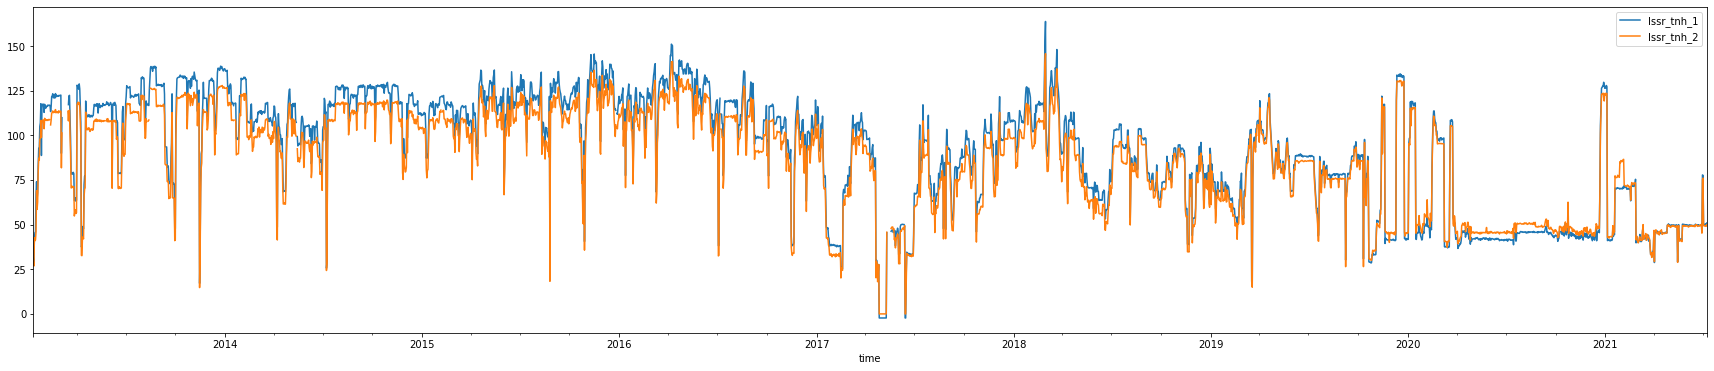

In [42]:
df['lssr_tnh_1'].plot(figsize=(30,6))
df['lssr_tnh_2'].plot()
plt.legend()

In [43]:
#HVGO

#Alternative total HVGO_rates (pa+prod). SELECT which one to use...

# 1. HVGO PA return (CPFI0050) + HVGO Prod (CPFI0060)
# 2. HVGO to C6AB (CPFI0288) + C6AB HVGO BYPASS (CPFI0289)
# 3. HVGO to C12AB (CPFI0296) + C72A-D (CPFI0306)
df['hvgo_tot_m3h_1'] = df['hvgo_prod_m3h'] + df['hvgo_pa_m3h']
df['hvgo_tot_m3h_2'] = df['c6ab_hvgo_m3h'] + df['c6ab_hvgo_bypass_m3h']
df['hvgo_tot_m3h_3'] = df['c12ab_hvgo_m3h'] + df['c72abcd_hvgo_m3h']



hvgo_tot_m3h_select = 1

if hvgo_tot_m3h_select == 1:
    df['hvgo_tot_m3h'] = df['hvgo_tot_m3h_1']
    
elif hvgo_tot_m3h_select == 2:
    df['hvgo_tot_m3h'] = df['hvgo_tot_m3h_2']
    
elif hvgo_tot_m3h_select == 3:
    df['hvgo_tot_m3h'] = df['hvgo_tot_m3h_3']

else:
    print('Enter valid HVGO flowrate selection')

array([[<AxesSubplot:xlabel='time'>],
       [<AxesSubplot:xlabel='time'>],
       [<AxesSubplot:xlabel='time'>]], dtype=object)

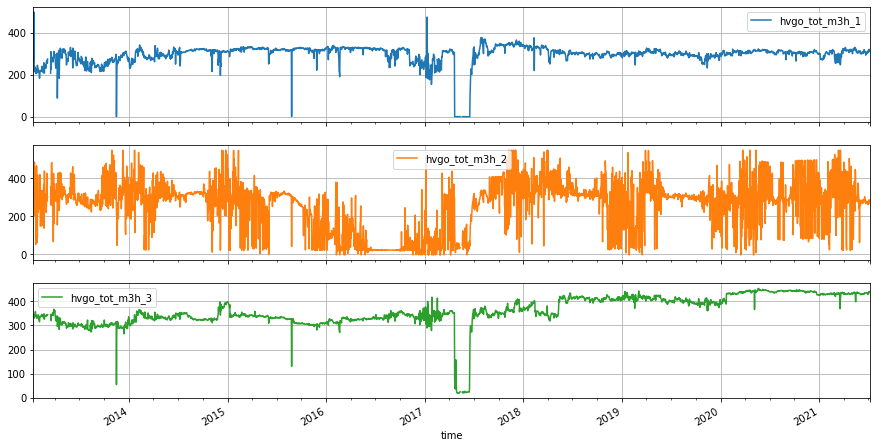

In [44]:
df[['hvgo_tot_m3h_1', 'hvgo_tot_m3h_2','hvgo_tot_m3h_3']].plot(subplots=True, layout=(3, 1), figsize=(15, 8), grid=True, sharex=True)

In [274]:
#Alternative Flashed Crude rates

# 1. Vol flow meters avg.(CPFI0019, CPFI018B, CPFI018,)
# 2. Based on Pre-flash Drum Temperature and HYSYS Simulation (for project crude mix)

df['flashed_crude_m3h_1'] =  (df['c10ab_flashed_crude_m3h_1of3'] + df['c10ab_flashed_crude_m3h_2of3'] + df['c10ab_flashed_crude_m3h_3of3'])/3
df['flashed_crude_m3h_2'] = flashed_crude_m3h((df['crude_m3h'] + df['lssr_m3h']*(1 - df['j70abc_on_off'])), df['f15_tin']) # add crude flow from lssr line WHEN CRUDE OPERATION ONLY.

# Will use calc 2 as the flowmeters appear to suggest a much higher %flash #9~30%)in the Pre-Flash Drum that
# can't be squared with the simulation. The simulation %flash (~10%) tallies well with the data sheets flows also ie. crude to C9/C10


flashed_crude_m3h_select = 2

if flashed_crude_m3h_select == 1:
    df['flashed_crude_m3h'] = df['flashed_crude_m3h_1']
    
elif flashed_crude_m3h_select == 2:
    df['flashed_crude_m3h'] = df['flashed_crude_m3h_2']
    
else:
    print('Enter valid flashed_crude flowrate selection')    
    

df['flashed_crude_tnh'] = df.flashed_crude_m3h * flashed_crude_sg(df['crude_sg'], df['f15_tin'])


In [46]:
# There are three measurements for the net VBR flow (m3h), in addition to the VBR quench flowrate (to C15 only).

#1 : CPFI0284
#2 : VPFI0173
#3 : CPFI0080
# Quench: CPFI0013

vbr_prod_m3h_select = 1

if vbr_prod_m3h_select == 1:
    df['c71abc_vbr_m3h'] = df['c71abc_vbr_m3h_1of3']
    
elif vbr_prod_m3h_select == 2:
    df['c71abc_vbr_m3h'] = df['c71abc_vbr_m3h_2of3']
    
elif vbr_prod_m3h_select == 3:
    df['c71abc_vbr_m3h'] = df['c71abc_vbr_m3h_3of3']

else:
    print('Select VBR product flow measurement')
    
df['c15abc_vbr_m3h'] = df['c71abc_vbr_m3h'] + df['vbr_to_quench_m3h'].fillna(0)   #fill Nan values with zero for quench rate

array([[<AxesSubplot:xlabel='time'>],
       [<AxesSubplot:xlabel='time'>],
       [<AxesSubplot:xlabel='time'>]], dtype=object)

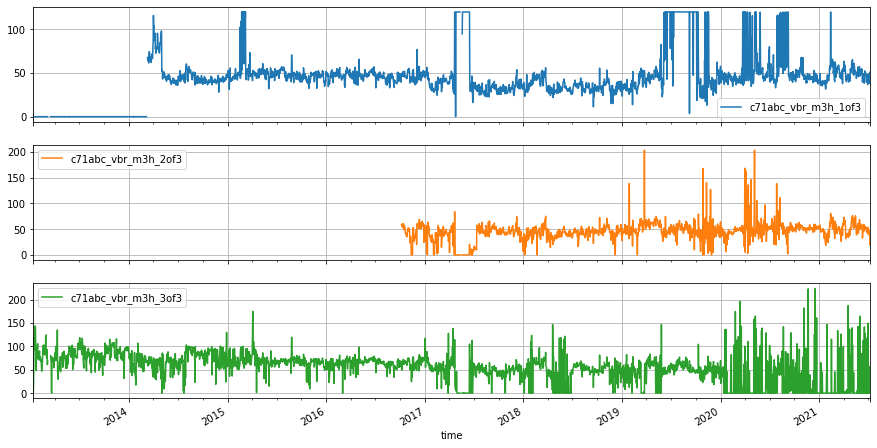

In [47]:
df[['c71abc_vbr_m3h_1of3', 'c71abc_vbr_m3h_2of3','c71abc_vbr_m3h_3of3']].plot(subplots=True, layout=(3, 1), figsize=(15, 8), grid=True, sharex=True)

In [48]:
df['vfr_to_e3_m3h'] = df['vfr_m3h'] - df['vfr_to_fcc_m3h'] - df['vfr_to_storage_m3h']

***C1-A/B (Crude, E7_TPA)***

In [49]:
df['c1ab_e7_tpa_m3h'] = df['c1a_e7_tpa_m3h'] + df['c1b_e7_tpa_m3h']
df['c1ab_crude_m3h'] = df['c1a_crude_m3h'] + df['c1b_crude_m3h']

df['c1ab_crude_tin'] = ((df['c1a_crude_m3h'] * df['c1a_crude_tin']) + (df['c1b_crude_m3h'] * df['c1b_crude_tin'])) / df['c1ab_crude_m3h']
df['c1ab_crude_tout'] = ((df['c1a_crude_m3h'] * df['c1a_crude_tout']) + (df['c1b_crude_m3h'] * df['c1b_crude_tout'])) / df['c1ab_crude_m3h']

#Log-Mean Temperature Difference
df['c1ab_lmtd'] =lmtd(df['c1ab_e7_tpa_tin'], df['c1ab_e7_tpa_tout'], df['c1ab_crude_tin'], df['c1ab_crude_tout'])

#calculate specfic heat capacites
df['c1a_crude_cp'] = crude_cp(df['c1a_crude_tin'],df['c1a_crude_tout'])
df['c1b_crude_cp'] = crude_cp(df['c1b_crude_tin'],df['c1b_crude_tout'])
df['c1ab_crude_cp'] = crude_cp(df['c1ab_crude_tin'],df['c1ab_crude_tout'])

df['c1a_e7_tpa_cp'] = e7_tpa_cp(df['c1ab_e7_tpa_tin'],df['c1a_e7_tpa_tout'])
df['c1b_e7_tpa_cp'] = e7_tpa_cp(df['c1ab_e7_tpa_tin'],df['c1b_e7_tpa_tout'])
df['c1ab_e7_tpa_cp'] = e7_tpa_cp(df['c1ab_e7_tpa_tin'],df['c1ab_e7_tpa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c1ab_crude_gcalh'] = (df['crude_tnh'] * df['c1ab_crude_cp'] * (df['c1ab_crude_tout'] - df['c1ab_crude_tin']))/1000
df['c1ab_e7_tpa_gcalh'] = (df['c1ab_e7_tpa_m3h'] * df['e7_lvgo_sg'] * df['c1ab_e7_tpa_cp'] * (df['c1ab_e7_tpa_tout'] - df['c1ab_e7_tpa_tin']))/1000

#U calculations on tube and shell sides
df['c1ab_ucalc1'] = (df['c1ab_crude_gcalh']*1e6 / df['c1ab_lmtd'] / hex_area['c1ab'])
df['c1ab_ucalc2'] = -(df['c1ab_e7_tpa_gcalh']*1e6 / df['c1ab_lmtd'] / hex_area['c1ab'])

C:\Users\adam_\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


***C2-A/B (Crude, E1_TPA)***

In [50]:
df['c2ab_crude_tin'] = df['c1ab_crude_tout']

#Log-Mean Temperature Difference
df['c2ab_lmtd'] =lmtd(df['c2ab_e1_tpa_tin'], df['c2ab_e1_tpa_tout'], df['c2ab_crude_tin'], df['c2ab_crude_tout'])

#calculate specfic heat capacites
df['c2ab_crude_cp'] = crude_cp(df['c2ab_crude_tin'],df['c2ab_crude_tout'])
df['c2ab_e1_tpa_cp'] = e1_tpa_cp(df['c2ab_e1_tpa_tin'],df['c2ab_e1_tpa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c2ab_crude_gcalh'] = (df['crude_tnh'] * df['c2ab_crude_cp'] * (df['c2ab_crude_tout'] - df['c2ab_crude_tin']))/1000
df['c2ab_e1_tpa_gcalh'] = (df['c2ab_e1_tpa_m3h'] * df['frsrn_sg'] * df['c2ab_e1_tpa_cp'] * (df['c2ab_e1_tpa_tout'] - df['c2ab_e1_tpa_tin']))/1000

#U calculations on tube and shell sides
df['c2ab_ucalc1'] = (df['c2ab_crude_gcalh']*1e6 / df['c2ab_lmtd'] / hex_area['c2ab'])
df['c2ab_ucalc2'] = -(df['c2ab_e1_tpa_gcalh']*1e6 / df['c2ab_lmtd'] / hex_area['c2ab'])

***C3 (Crude, Kero_Prod)***

In [51]:
df['c3_crude_tin'] = df['c2ab_crude_tout']

#Log-Mean Temperature Difference
df['c3_lmtd'] =lmtd(df['c3_kero_prod_tin'], df['c3_kero_prod_tout'], df['c3_crude_tin'], df['c3_crude_tout'])

#calculate specfic heat capacites
df['c3_crude_cp'] = crude_cp(df['c3_crude_tin'],df['c3_crude_tout'])
df['c3_kero_prod_cp'] = kero_cp(df['c3_kero_prod_tin'],df['c3_kero_prod_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c3_crude_gcalh'] = (df['crude_tnh'] * df['c3_crude_cp'] * (df['c3_crude_tout'] - df['c3_crude_tin']))/1000
df['c3_kero_prod_gcalh'] = (df['c3_kero_prod_m3h'] * df['kero_sg'] * df['c3_kero_prod_cp'] * (df['c3_kero_prod_tout'] - df['c3_kero_prod_tin']))/1000

#U calculations on tube and shell sides
df['c3_ucalc1'] = (df['c3_crude_gcalh']*1e6 / df['c3_lmtd'] / hex_area['c3'])
df['c3_ucalc2'] = -(df['c3_kero_prod_gcalh']*1e6 / df['c3_lmtd'] / hex_area['c3'])

***C4-A/B (Crude, Kero_PA)***

In [52]:
df['c4ab_crude_tin'] = df['c3_crude_tout']

#Log-Mean Temperature Difference
df['c4ab_lmtd'] =lmtd(df['c4ab_kpa_tin'], df['c4ab_kpa_tout'], df['c4ab_crude_tin'], df['c4ab_crude_tout'])

#calculate specfic heat capacites
df['c4ab_crude_cp'] = crude_cp(df['c4ab_crude_tin'],df['c4ab_crude_tout'])
df['c4ab_kpa_cp'] = kero_cp(df['c4ab_kpa_tin'],df['c4ab_kpa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c4ab_crude_gcalh'] = (df['crude_tnh'] * df['c4ab_crude_cp'] * (df['c4ab_crude_tout'] - df['c4ab_crude_tin']))/1000
df['c4ab_kpa_gcalh'] = (df['c4ab_kpa_m3h'] * df['kero_sg'] * df['c4ab_kpa_cp'] * (df['c4ab_kpa_tout'] - df['c4ab_kpa_tin']))/1000

#U calculations on tube and shell sides
df['c4ab_ucalc1'] = (df['c4ab_crude_gcalh']*1e6 / df['c4ab_lmtd'] / hex_area['c4ab'])
df['c4ab_ucalc2'] = -(df['c4ab_kpa_gcalh']*1e6 / df['c4ab_lmtd'] / hex_area['c4ab'])

***C5-A/B (Crude, LGO_Prod)***

In [53]:
df['c5ab_lgo_prod_m3h'] = df['lgo_prod_m3/h'] - df['c5ab_lgo_prod_bypass_m3/h']

In [54]:
df['c5ab_crude_tin'] = df['c4ab_crude_tout']

#Log-Mean Temperature Difference
df['c5ab_lmtd'] =lmtd(df['c5ab_lgo_prod_tin'], df['c5ab_lgo_prod_tout'], df['c5ab_crude_tin'], df['c5ab_crude_tout'])

#calculate specfic heat capacites
df['c5ab_crude_cp'] = crude_cp(df['c5ab_crude_tin'],df['c5ab_crude_tout'])
df['c5ab_lgo_prod_cp'] = lgo_cp(df['c5ab_lgo_prod_tin'],df['c5ab_lgo_prod_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c5ab_crude_gcalh'] = (df['crude_tnh'] * df['c5ab_crude_cp'] * (df['c5ab_crude_tout'] - df['c5ab_crude_tin']))/1000
df['c5ab_lgo_prod_gcalh'] = (df['c5ab_lgo_prod_m3h'] * df['lgo_sg'] * df['c5ab_lgo_prod_cp'] * (df['c5ab_lgo_prod_tout'] - df['c5ab_lgo_prod_tin']))/1000

#U calculations on tube and shell sides
df['c5ab_ucalc1'] = (df['c5ab_crude_gcalh']*1e6 / df['c5ab_lmtd'] / hex_area['c5ab'])
df['c5ab_ucalc2'] = -(df['c5ab_lgo_prod_gcalh']*1e6 / df['c5ab_lmtd'] / hex_area['c5ab'])

***C6-A/B (Crude, HVGOPA/Prod)***

In [55]:
df['c6ab_crude_tin'] = df['c5ab_crude_tout']

#Log-Mean Temperature Difference
df['c6ab_lmtd'] =lmtd(df['c6ab_hvgo_tin'], df['c6ab_hvgo_tout'], df['c6ab_crude_tin'], df['c6ab_crude_tout'])

#calculate specfic heat capacites
df['c6ab_crude_cp'] = crude_cp(df['c6ab_crude_tin'],df['c6ab_crude_tout'])
df['c6ab_hvgo_cp'] = hvgo_cp(df['c6ab_hvgo_tin'],df['c6ab_hvgo_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c6ab_crude_gcalh'] = (df['crude_tnh'] * df['c6ab_crude_cp'] * (df['c6ab_crude_tout'] - df['c6ab_crude_tin']))/1000
df['c6ab_hvgo_gcalh'] = (df['c6ab_hvgo_m3h'] * df['hvgo_sg'] * df['c6ab_hvgo_cp'] * (df['c6ab_hvgo_tout'] - df['c6ab_hvgo_tin']))/1000

#U calculations on tube and shell sides
df['c6ab_ucalc1'] = (df['c6ab_crude_gcalh']*1e6 / df['c6ab_lmtd'] / hex_area['c6ab'])
df['c6ab_ucalc2'] = -(df['c6ab_hvgo_gcalh']*1e6 / df['c6ab_lmtd'] / hex_area['c6ab'])

***When running Crude only, the crude that is run through the LSSR pht is routed back up to the Desalter. Account for this additional flowrate ...***

***C7-A/B (Crude, HVGO_PA/Prod)***

In [278]:
#Log-Mean Temperature Difference
df['c7ab_lmtd'] =lmtd(df['c7ab_hgo_prod_tin'], df['c7ab_hgo_prod_tout'], df['c7ab_crude_tin'], df['c7ab_crude_tout'])

#calculate specfic heat capacites
df['c7ab_crude_cp'] = crude_cp(df['c7ab_crude_tin'],df['c7ab_crude_tout'])
df['c7ab_hgo_prod_cp'] = hgo_cp(df['c7ab_hgo_prod_tin'],df['c7ab_hgo_prod_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c7ab_crude_gcalh'] = ((df['crude_tnh'] + (df['lssr_tnh']*(1-df['j70abc_on_off']))) * df['c7ab_crude_cp'] * (df['c7ab_crude_tout'] - df['c7ab_crude_tin']))/1000
df['c7ab_hgo_prod_gcalh'] = (df['c7ab_hgo_prod_m3h'] * df['hgo_sg'] * df['c7ab_hgo_prod_cp'] * (df['c7ab_hgo_prod_tout'] - df['c7ab_hgo_prod_tin']))/1000

#U calculations on tube and shell sides
df['c7ab_ucalc1'] = (df['c7ab_crude_gcalh']*1e6 / df['c7ab_lmtd'] / hex_area['c7ab'])
df['c7ab_ucalc2'] = -(df['c7ab_hgo_prod_gcalh']*1e6 / df['c7ab_lmtd'] / hex_area['c7ab'])

***C8-A/B (Crude, HVGOPA/Prod)***

In [279]:
#will use the hvgo rate as calculated by the pa rate plus the prod rate
df['c8ab_hvgo_m3h'] = df.hvgo_tot_m3h

df['c8ab_crude_tin'] = df['c7ab_crude_tout']

#Log-Mean Temperature Difference
df['c8ab_lmtd'] =lmtd(df['c8ab_hvgo_tin'], df['c8ab_hvgo_tout'], df['c8ab_crude_tin'], df['c8ab_crude_tout'])

#calculate specfic heat capacites
df['c8ab_crude_cp'] = crude_cp(df['c8ab_crude_tin'],df['c8ab_crude_tout'])
df['c8ab_hvgo_cp'] = hvgo_cp(df['c8ab_hvgo_tin'],df['c8ab_hvgo_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c8ab_crude_gcalh'] = ((df['crude_tnh'] + (df['lssr_tnh']*(1-df['j70abc_on_off']))) * df['c8ab_crude_cp'] * (df['c8ab_crude_tout'] - df['c8ab_crude_tin']))/1000
df['c8ab_hvgo_gcalh'] = (df['c8ab_hvgo_m3h'] * df['hvgo_sg'] * df['c8ab_hvgo_cp'] * (df['c8ab_hvgo_tout'] - df['c8ab_hvgo_tin']))/1000

#U calculations on tube and shell sides
df['c8ab_ucalc1'] = (df['c8ab_crude_gcalh']*1e6 / df['c8ab_lmtd'] / hex_area['c8ab'])
df['c8ab_ucalc2'] = -(df['c8ab_hvgo_gcalh']*1e6 / df['c8ab_lmtd'] / hex_area['c8ab'])

***C9-A/B (Crude, LGO_PA)***

In [280]:
df['c9ab_crude_tin'] = df['c8ab_crude_tout']

#Log-Mean Temperature Difference
df['c9ab_lmtd'] =lmtd(df['c9ab_lgo_pa_tin'], df['c9ab_lgo_pa_tout'], df['c9ab_crude_tin'], df['c9ab_crude_tout'])

#calculate specfic heat capacites
df['c9ab_crude_cp'] = crude_cp(df['c9ab_crude_tin'],df['c9ab_crude_tout'])
df['c9ab_lgo_pa_cp'] = lgo_cp(df['c9ab_lgo_pa_tin'],df['c9ab_lgo_pa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c9ab_crude_gcalh'] = ((df['crude_tnh'] + (df['lssr_tnh']*(1-df['j70abc_on_off']))) * df['c9ab_crude_cp'] * (df['c9ab_crude_tout'] - df['c9ab_crude_tin']))/1000
df['c9ab_lgo_pa_gcalh'] = (df['c9ab_lgo_pa_m3h'] * df['lgo_sg'] * df['c9ab_lgo_pa_cp'] * (df['c9ab_lgo_pa_tout'] - df['c9ab_lgo_pa_tin']))/1000

#U calculations on tube and shell sides
df['c9ab_ucalc1'] = (df['c9ab_crude_gcalh']*1e6 / df['c9ab_lmtd'] / hex_area['c9ab'])
df['c9ab_ucalc2'] = -(df['c9ab_lgo_pa_gcalh']*1e6 / df['c9ab_lmtd'] / hex_area['c9ab'])

***C10-A/B (Crude, HVGO_PA/PROD)***

In [59]:
#Calculate Tin from outlet of C12AB and C72AB. 

#Note: HVGO flow is NOT based on HVGO to C72 + C12 (see C8AB calcs above)
#Therefore, to be consistent, the flow to C72 and C12 will be calculated based on the total flow and the flow ratio to each
#exchanger as given in the data sheets.

# IF HVGO flow IS based on flows to C12 + C72, then can use these flows also in the hex calcs

if hvgo_tot_m3h_select == 1 or hvgo_tot_m3h_select == 2:
    
    c12ab_hvgo_frac = 0.2
    c72abcd_hvgo_frac = (1 - c12ab_hvgo_frac)
    
    df['c12ab_hvgo_m3h'] = df.hvgo_tot_m3h * c12ab_hvgo_frac
    df['c72abcd_hvgo_m3h'] = df.hvgo_tot_m3h * c72abcd_hvgo_frac
    
else:
    pass 
    #and the measured flows to c12 and c72 will be used
    
df['c10ab_hvgo_tin'] = ((df['c12ab_hvgo_m3h'] * df['c12ab_hvgo_tout'] + df['c72abcd_hvgo_m3h'] * df['c72abcd_hvgo_tout'])
                        / (df['c12ab_hvgo_m3h'] + df['c72abcd_hvgo_m3h']))

df['c10ab_hvgo_m3h'] = df.hvgo_tot_m3h

In [60]:
#Log-Mean Temperature Difference
df['c10ab_lmtd'] =lmtd(df['c10ab_hvgo_tin'], df['c10ab_hvgo_tout'], df['c10ab_flashed_crude_tin'], df['c10ab_flashed_crude_tout'])

#calculate specfic heat capacites
df['c10ab_flashed_crude_cp'] = flashed_crude_cp(df['c10ab_flashed_crude_tin'],df['c10ab_flashed_crude_tout'])
df['c10ab_hvgo_cp'] = hvgo_cp(df['c10ab_hvgo_tin'],df['c10ab_hvgo_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c10ab_flashed_crude_gcalh'] = (df.flashed_crude_tnh * df['c10ab_flashed_crude_cp'] * (df['c10ab_flashed_crude_tout'] - df['c10ab_flashed_crude_tin']))/1000
df['c10ab_hvgo_gcalh'] = (df['c10ab_hvgo_m3h'] * df.hvgo_sg * df['c10ab_hvgo_cp'] * (df['c10ab_hvgo_tout'] - df['c10ab_hvgo_tin']))/1000

#U calculations on tube and shell sides
df['c10ab_ucalc1'] = (df['c10ab_flashed_crude_gcalh']*1e6 / df['c10ab_lmtd'] / hex_area['c10ab'])
df['c10ab_ucalc2'] = -(df['c10ab_hvgo_gcalh']*1e6 / df['c10ab_lmtd'] / hex_area['c10ab'])

***C11 (Crude, HGO_PA)***

In [61]:
df['c11_flashed_crude_tin'] = df['c10ab_flashed_crude_tout']

#Log-Mean Temperature Difference
df['c11_lmtd'] =lmtd(df['c11_hgo_pa_tin'], df['c11_hgo_pa_tout'], df['c11_flashed_crude_tin'], df['c11_flashed_crude_tout'])

#calculate specfic heat capacites
df['c11_flashed_crude_cp'] = flashed_crude_cp(df['c11_flashed_crude_tin'],df['c11_flashed_crude_tout'])
df['c11_hgo_pa_cp'] = hgo_cp(df['c11_hgo_pa_tin'],df['c11_hgo_pa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c11_flashed_crude_gcalh'] = (df.flashed_crude_tnh * df['c11_flashed_crude_cp'] * (df['c11_flashed_crude_tout'] - df['c11_flashed_crude_tin']))/1000
df['c11_hgo_pa_gcalh'] = (df['c11_hgo_pa_m3h'] * df.hgo_sg * df['c11_hgo_pa_cp'] * (df['c11_hgo_pa_tout'] - df['c11_hgo_pa_tin']))/1000

#U calculations on tube and shell sides
df['c11_ucalc1'] = (df['c11_flashed_crude_gcalh']*1e6 / df['c11_lmtd'] / hex_area['c11'])
df['c11_ucalc2'] = -(df['c11_hgo_pa_gcalh']*1e6 / df['c11_lmtd'] / hex_area['c11'])

***C12-A/B (Crude, HVGO_PA/PROD)***

In [62]:
df['c12ab_flashed_crude_tin'] = df['c11_flashed_crude_tout']

#Log-Mean Temperature Difference
df['c12ab_lmtd'] =lmtd(df['c12ab_hvgo_tin'], df['c12ab_hvgo_tout'], df['c12ab_flashed_crude_tin'], df['c12ab_flashed_crude_tout'])

#calculate specfic heat capacites
df['c12ab_flashed_crude_cp'] = flashed_crude_cp(df['c12ab_flashed_crude_tin'],df['c12ab_flashed_crude_tout'])
df['c12ab_hvgo_cp'] = hvgo_cp(df['c12ab_hvgo_tin'],df['c12ab_hvgo_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c12ab_flashed_crude_gcalh'] = (df.flashed_crude_tnh * df['c12ab_flashed_crude_cp'] * (df['c12ab_flashed_crude_tout'] - df['c12ab_flashed_crude_tin']))/1000
df['c12ab_hvgo_gcalh'] = (df['c12ab_hvgo_m3h'] * df.hvgo_sg * df['c12ab_hvgo_cp'] * (df['c12ab_hvgo_tout'] - df['c12ab_hvgo_tin']))/1000

#U calculations on tube and shell sides
df['c12ab_ucalc1'] = (df['c12ab_flashed_crude_gcalh']*1e6 / df['c12ab_lmtd'] / hex_area['c12ab'])
df['c12ab_ucalc2'] = -(df['c12ab_hvgo_gcalh']*1e6 / df['c12ab_lmtd'] / hex_area['c12ab'])

***C13-A/B (Crude, HGO_PA)***

In [63]:
df['c13ab_flashed_crude_tin'] = df['c12ab_flashed_crude_tout']

#Log-Mean Temperature Difference
df['c13ab_lmtd'] =lmtd(df['c13ab_hgo_pa_tin'], df['c13ab_hgo_pa_tout'], df['c13ab_flashed_crude_tin'], df['c13ab_flashed_crude_tout'])

#calculate specfic heat capacites
df['c13ab_flashed_crude_cp'] = flashed_crude_cp(df['c13ab_flashed_crude_tin'],df['c13ab_flashed_crude_tout'])
df['c13ab_hgo_pa_cp'] = hgo_cp(df['c13ab_hgo_pa_tin'],df['c13ab_hgo_pa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c13ab_flashed_crude_gcalh'] = (df.flashed_crude_tnh * df['c13ab_flashed_crude_cp'] * (df['c13ab_flashed_crude_tout'] - df['c13ab_flashed_crude_tin']))/1000
df['c13ab_hgo_pa_gcalh'] = (df['c13ab_hgo_pa_m3h'] * df.hgo_sg * df['c13ab_hgo_pa_cp'] * (df['c13ab_hgo_pa_tout'] - df['c13ab_hgo_pa_tin']))/1000

#U calculations on tube and shell sides
df['c13ab_ucalc1'] = (df['c13ab_flashed_crude_gcalh']*1e6 / df['c13ab_lmtd'] / hex_area['c13ab'])
df['c13ab_ucalc2'] = -(df['c13ab_hgo_pa_gcalh']*1e6 / df['c13ab_lmtd'] / hex_area['c13ab'])

***C14-A/B/C/D (Crude, AR)***

In [64]:
df['c14abcd_flashed_crude_tin'] = df['c13ab_flashed_crude_tout']

#Log-Mean Temperature Difference
df['c14abcd_lmtd'] =lmtd(df['c14abcd_ar_tin'], df['c14abcd_ar_tout'], df['c14abcd_flashed_crude_tin'], df['c14abcd_flashed_crude_tout'])

#calculate specfic heat capacites
df['c14abcd_flashed_crude_cp'] = flashed_crude_cp(df['c14abcd_flashed_crude_tin'],df['c14abcd_flashed_crude_tout'])
df['c14abcd_ar_cp'] = ar_cp(df['c14abcd_ar_tin'],df['c14abcd_ar_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c14abcd_flashed_crude_gcalh'] = (df.flashed_crude_tnh * df['c14abcd_flashed_crude_cp'] * (df['c14abcd_flashed_crude_tout'] - df['c14abcd_flashed_crude_tin']))/1000
df['c14abcd_ar_gcalh'] = (df['c14abcd_ar_m3h'] * df.ar_sg * df['c14abcd_ar_cp'] * (df['c14abcd_ar_tout'] - df['c14abcd_ar_tin']))/1000

#U calculations on tube and shell sides
df['c14abcd_ucalc1'] = (df['c14abcd_flashed_crude_gcalh']*1e6 / df['c14abcd_lmtd'] / hex_area['c14abcd'])
df['c14abcd_ucalc2'] = -(df['c14abcd_ar_gcalh']*1e6 / df['c14abcd_lmtd'] / hex_area['c14abcd'])

***C15-A/B/C (Crude, Visbroken Residue)***

In [65]:
df['c15abc_flashed_crude_tin'] = df['c14abcd_flashed_crude_tout']

#Log-Mean Temperature Difference
df['c15abc_lmtd'] =lmtd(df['c15abc_vbr_tin'], df['c15abc_vbr_tout'], df['c15abc_flashed_crude_tin'], df['c15abc_flashed_crude_tout'])

#calculate specfic heat capacites
df['c15abc_flashed_crude_cp'] = flashed_crude_cp(df['c15abc_flashed_crude_tin'],df['c15abc_flashed_crude_tout'])
df['c15abc_vbr_cp'] = vr_cp(df['c15abc_vbr_tin'],df['c15abc_vbr_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c15abc_flashed_crude_gcalh'] = (df.flashed_crude_tnh * df['c15abc_flashed_crude_cp'] * (df['c15abc_flashed_crude_tout'] - df['c15abc_flashed_crude_tin']))/1000
df['c15abc_vbr_gcalh'] = (df['c15abc_vbr_m3h'] * df.vbr_sg * df['c15abc_vbr_cp'] * (df['c15abc_vbr_tout'] - df['c15abc_vbr_tin']))/1000

#U calculations on tube and shell sides
df['c15abc_ucalc1'] = (df['c15abc_flashed_crude_gcalh']*1e6 / df['c15abc_lmtd'] / hex_area['c15abc'])
df['c15abc_ucalc2'] = -(df['c15abc_vbr_gcalh']*1e6 / df['c15abc_lmtd'] / hex_area['c15abc'])

<AxesSubplot:xlabel='time'>

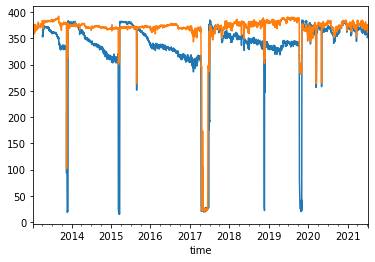

In [66]:
df['c15abc_vbr_tin_alt'].plot()
df['c15abc_vbr_tin'].plot()

***C70-A/B (LSSR, CDU TPA)***

In [67]:
#Log-Mean Temperature Difference
df['c70ab_lmtd'] =lmtd(df['c70ab_e1_tpa_tin'], df['c70ab_e1_tpa_tout'], df['c70ab_lssr_tin'], df['c70ab_lssr_tout'])

#calculate specfic heat capacites
#if Crude through LSSR preheat train, then use Crude cp calc
df['c70ab_lssr_cp'] = lssr_cp(df['c70ab_lssr_tin'],df['c70ab_lssr_tout'])*df['j70abc_on_off']  +  crude_cp(df['c70ab_lssr_tin'],df['c70ab_lssr_tout'])*(1-df['j70abc_on_off'])
df['c70ab_e1_tpa_cp'] = e1_tpa_cp(df['c70ab_e1_tpa_tin'],df['c70ab_e1_tpa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c70ab_lssr_gcalh'] = (df.lssr_tnh * df['c70ab_lssr_cp'] * (df['c70ab_lssr_tout'] - df['c70ab_lssr_tin']))/1000
df['c70ab_e1_tpa_gcalh'] = (df['c70ab_e1_tpa_m3h'] * df.frsrn_sg * df['c70ab_e1_tpa_cp'] * (df['c70ab_e1_tpa_tout'] - df['c70ab_e1_tpa_tin']))/1000

#U calculations on tube and shell sides
df['c70ab_ucalc1'] = (df['c70ab_lssr_gcalh']*1e6 / df['c70ab_lmtd'] / hex_area['c70ab'])
df['c70ab_ucalc2'] = -(df['c70ab_e1_tpa_gcalh']*1e6 / df['c70ab_lmtd'] / hex_area['c70ab'])

C:\Users\adam_\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


***C71-A/B/C (LSSR, VBR)***

In [68]:
df['c71abc_lssr_tin'] = df['c70ab_lssr_tout']

#Log-Mean Temperature Difference
df['c71abc_lmtd'] =lmtd(df['c71abc_vbr_tin'], df['c71abc_vbr_tout'], df['c71abc_lssr_tin'], df['c71abc_lssr_tout'])

#calculate specfic heat capacites
df['c71abc_lssr_cp'] = lssr_cp(df['c71abc_lssr_tin'],df['c71abc_lssr_tout'])*df['j70abc_on_off']  +  crude_cp(df['c70ab_lssr_tin'],df['c70ab_lssr_tout'])*(1-df['j70abc_on_off'])
df['c71abc_vbr_cp'] = vr_cp(df['c71abc_vbr_tin'],df['c71abc_vbr_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c71abc_lssr_gcalh'] = (df.lssr_tnh * df['c71abc_lssr_cp'] * (df['c71abc_lssr_tout'] - df['c71abc_lssr_tin']))/1000
df['c71abc_vbr_gcalh'] = (df['c71abc_vbr_m3h'] * df.vbr_sg * df['c71abc_vbr_cp'] * (df['c71abc_vbr_tout'] - df['c71abc_vbr_tin']))/1000

#U calculations on tube and shell sides
df['c71abc_ucalc1'] = (df['c71abc_lssr_gcalh']*1e6 / df['c71abc_lmtd'] / hex_area['c71abc'])
df['c71abc_ucalc2'] = -(df['c71abc_vbr_gcalh']*1e6 / df['c71abc_lmtd'] / hex_area['c71abc'])

***C72-A/B/C/D (LSSR, HVGO)***

In [69]:
df['c72abcd_lssr_tin'] = df['c71abc_lssr_tout']

#Log-Mean Temperature Difference
df['c72abcd_lmtd'] =lmtd(df['c72abcd_hvgo_tin'], df['c72abcd_hvgo_tout'], df['c72abcd_lssr_tin'], df['c72abcd_lssr_tout'])

#calculate specfic heat capacites
df['c72abcd_lssr_cp'] = lssr_cp(df['c72abcd_lssr_tin'],df['c72abcd_lssr_tout'])*df['j70abc_on_off']  +  crude_cp(df['c70ab_lssr_tin'],df['c70ab_lssr_tout'])*(1-df['j70abc_on_off'])
df['c72abcd_hvgo_cp'] = hvgo_cp(df['c72abcd_hvgo_tin'],df['c72abcd_hvgo_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c72abcd_lssr_gcalh'] = (df.lssr_tnh * df['c72abcd_lssr_cp'] * (df['c72abcd_lssr_tout'] - df['c72abcd_lssr_tin']))/1000
df['c72abcd_hvgo_gcalh'] = (df['c72abcd_hvgo_m3h'] * df.hvgo_sg * df['c72abcd_hvgo_cp'] * (df['c72abcd_hvgo_tout'] - df['c72abcd_hvgo_tin']))/1000

#U calculations on tube and shell sides
df['c72abcd_ucalc1'] = (df['c72abcd_lssr_gcalh']*1e6 / df['c72abcd_lmtd'] / hex_area['c72abcd'])
df['c72abcd_ucalc2'] = -(df['c72abcd_hvgo_gcalh']*1e6 / df['c72abcd_lmtd'] / hex_area['c72abcd'])

***C73-A/B (LSSR, E3-BPA)***

In [70]:
#Use LSSR SG for E3 feed

#Log-Mean Temperature Difference
df['c73ab_lmtd'] =lmtd(df['c73ab_e3_bpa_tin'], df['c73ab_e3_bpa_tout'], df['c73ab_e3_feed_tin'], df['c73ab_e3_feed_tout'])

#calculate specfic heat capacites
df['c73ab_e3_feed_cp'] = lssr_cp(df['c73ab_e3_feed_tin'],df['c73ab_e3_feed_tout'])
df['c73ab_e3_bpa_cp'] = vr_cp(df['c73ab_e3_bpa_tin'],df['c73ab_e3_bpa_tout'])

#calculate duty on both shell and tube sides (Gcal/h)
df['c73ab_e3_feed_gcalh'] = (df.c73ab_e3_feed_m3h * df.lssr_sg * df['c73ab_e3_feed_cp'] * (df['c73ab_e3_feed_tout'] - df['c73ab_e3_feed_tin']))/1000 #assume sg of vfr is similar to lssr
df['c73ab_e3_bpa_gcalh'] = (df['c73ab_e3_bpa_m3h'] * df.vr_sg * df['c73ab_e3_bpa_cp'] * (df['c73ab_e3_bpa_tout'] - df['c73ab_e3_bpa_tin']))/1000

#U calculations on tube and shell sides
df['c73ab_ucalc1'] = (df['c73ab_e3_feed_gcalh']*1e6 / df['c73ab_lmtd'] / hex_area['c73ab'])
df['c73ab_ucalc2'] = -(df['c73ab_e3_bpa_gcalh']*1e6 / df['c73ab_lmtd'] / hex_area['c73ab'])

***DATA QUALITY CHECKS***

In [71]:
hx='c71abc'
cold_stream = 'lssr'
hot_stream = 'vbr'
df[hx+'_dodgy_u'] = np.where((df[hx+'_'+cold_stream+'_tout'] <  df[hx+'_'+cold_stream+'_tin']) |
                             (df[hx+'_'+hot_stream+'_tout'] >  df[hx+'_'+hot_stream+'_tin'])   | 
                             (df[hx+'_'+cold_stream+'_tout'] >  df[hx+'_'+hot_stream+'_tin'])  |
                             (df[hx+'_'+hot_stream+'_tout'] <  df[hx+'_'+cold_stream+'_tin'])        
                             , df[hx+'_ucalc1'], np.nan)

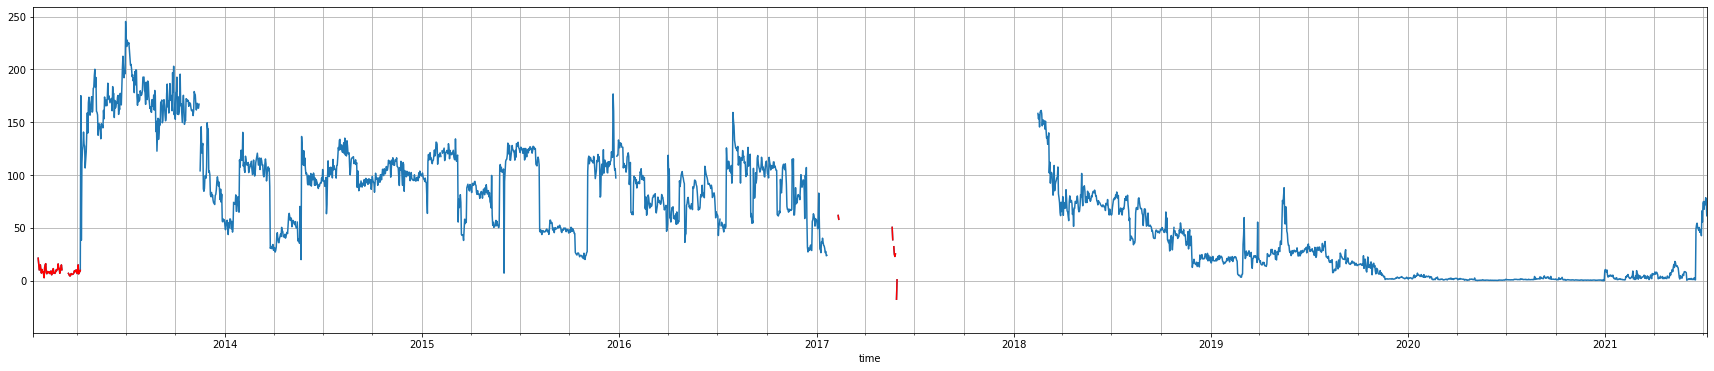

In [72]:
df['c71abc_ucalc1'].plot(figsize=(30,6))
df['c71abc_dodgy_u'].plot(color='red')
#plt.xlim('2013-01-01','2013-04-01')
plt.grid(which='both')

In [74]:
# dates and values of suspicious data - to plot/highlight in a different colour over trends
#separate dataframe of dodgy data for all exchangers ie. index is dates, columns are exchangers, and entries are 1 or 0 depending on dodge or not..?

In [75]:
def plot_hex(hex_list, df=df, start=df.index[0], end=df.index[-1]):
    
    '''Input a list of exchanger names to return a plot of U values and pressure drops, where available'''
    
    fig, ax = plt.subplots(nrows = len(hex_list), figsize=(25,6*len(hex_list)), sharex=False)
    for irow, hx in enumerate(hex_list):
        
        try:
            U_clean = ds_U_dict[hx+'_Uclean']
            y_limit = U_clean*1.2
        except:
            U_clean = np.NaN
            y_limit = 800
        try:
            U_serv = ds_U_dict[hx+'_Userv']
        except:
            U_serv = np.NaN     
        try:
            allow_dp = ds_dp_dict[hx+'_dp']
        except:
            allow_dp = np.NaN      

        fig.text(0.08, 0.5, 'Heat Transfer Coefficient', ha='center', va='center', rotation='vertical', size=15)

        ax[irow].set_title(hx, size=16)
        ax[irow].set_ylabel('U (kcal/m2.C)', size=13)
        #ax[irow].set_yticks(fontsize=11)

        ax[irow].set_ylim([0, y_limit])
        df[hx+'_ucalc1'].fillna(value=0).plot(ax=ax[irow], lw=0.6, color='b')
        df[hx+'_ucalc2'].fillna(value=0).plot(ax=ax[irow], lw=0.7, color='cornflowerblue')


        ax[irow].axhline(y=U_clean, color='g', linestyle='--', lw=1)   #U (clean)
        ax[irow].axhline(y=U_serv, color='purple', linestyle='--', lw=1)    #U (service)

        ax[irow].legend(['U_calc1', 'U_calc2', 'U_clean', 'U_service', 'U_sim'],loc=[1.04,0.3], fontsize=12, shadow=True, fancybox=True)

        ax[irow].set_xlim(pd.Timestamp(start), pd.Timestamp(end))
        
        #Plot presure drop across hex
        ax2 = ax[irow].twinx()
        ax2.set_ylabel('dP (bar)', size=13)
        try:
            df[hx+'_dp'].fillna(value=0).plot(ax=ax2, color='tomato', lw=0.4, linestyle='-')   #plant data pressure drop
            ax2.axhline(y=allow_dp, color='tomato', linestyle='--', lw=1)   #allowable pressure drop (bar)
        except:
            pass
        
        ax2.set_ylim(0, 10)
        ax2.legend(['Pressure_drop', 'Allow. dP'],loc=[1.04,0.10], fontsize=12, shadow=True, fancybox=True)
        

In [161]:
#plot_hex(['c7ab', 'c12ab'])

In [79]:
df['cdu_pa_duty'] = df['c1ab_crude_gcalh'] + df['c4ab_crude_gcalh'] + df['c9ab_crude_gcalh'] + df['c11_flashed_crude_gcalh'] + df['c13ab_flashed_crude_gcalh']
df['hvgo_pa_duty_gcalh'] = df['c12ab_flashed_crude_gcalh'] + df['c72abcd_lssr_gcalh'] + df['c10ab_flashed_crude_gcalh'] + df['c8ab_crude_gcalh'] + df['c6ab_crude_gcalh']

In [81]:
# TOTAL heat to Crude
df['pht_crude_gcalh'] = (df['c1ab_crude_gcalh'] + 
                         df['c2ab_crude_gcalh'] +
                         df['c3_crude_gcalh'] +
                         df['c4ab_crude_gcalh'] +
                         df['c5ab_crude_gcalh'] + 
                         df['c6ab_crude_gcalh'] + 
                         df['c7ab_crude_gcalh'] + 
                         df['c8ab_crude_gcalh'] +
                         df['c9ab_crude_gcalh'] +
                         df['c10ab_flashed_crude_gcalh'] + 
                         df['c11_flashed_crude_gcalh'] +
                         df['c12ab_flashed_crude_gcalh'] +
                         df['c13ab_flashed_crude_gcalh'] +
                         df['c14abcd_flashed_crude_gcalh'] +
                         df['c15abc_flashed_crude_gcalh'] +
                         
                         df['j70abc_on_off'] * (df['c70ab_lssr_gcalh'] + df['c71abc_lssr_gcalh'] + df['c72abcd_hvgo_gcalh']))

In [86]:
cp_min = []
cp_max = []
sg_min = []
sg_max = []
for col in [col for col in df.columns if 'cp' in col]:
    cp_min.append(df[col].min())
    cp_max.append(df[col].max())
    
for col in [col for col in df.columns if 'sg' in col]:
    sg_min.append(df[col].min())
    sg_max.append(df[col].max())
    
#make dataframe of stream cps min and max values
df_cps = pd.DataFrame(zip(cp_min, cp_max), index=[col for col in df.columns if 'cp' in col], columns=['min', 'max'])

#make dataframe of stream SGs min and max values
df_sgs = pd.DataFrame(zip(sg_min, sg_max), index=[col for col in df.columns if 'sg' in col], columns=['min', 'max'])

In [87]:
df_sgs

,min,max
crude_sg,0.8003,0.87399
lssr_sg,0.9000,1.02470
frsrn_sg,0.7000,0.79390
kero_sg,0.7591,0.81760
lgo_sg,0.8000,0.87900
hgo_sg,0.8118,0.89459
e7_lvgo_sg,0.0000,0.88550
e3_lvgo_sg,0.8012,0.95000
hvgo_sg,0.8042,1.00000
vr_sg,0.0000,0.97150


In [88]:
#df_cps

***HEXCHANGER***

In [89]:
from ht import effectiveness_NTU_method

In [90]:
class Stream:
    def __init__(self, massflow, temp, stream_type='crude', units=['kg/s', 'C', 'J/kgC']):
        self.massflow = massflow
        self.temp = temp
        self.stream_type = stream_type
        self.units = units

    def cp(self):
        if self.stream_type == 'crude':
             return crude_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'flashed_crude':
            return flashed_crude_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'lssr':
            return lssr_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'e1_tpa':
            return e1_tpa_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'kero':
            return kero_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'lgo':
            return lgo_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'hgo':
            return hgo_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'ar':
            return ar_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'e7_tpa':
            return e7_tpa_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'hvgo':
            return hvgo_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'vr':
            return vr_cp(self.temp, units='j_kg.c')

        elif self.stream_type == 'vbr':
            return vr_cp(self.temp, units='j_kg.c')
        
        else:
            print('enter valid stream type')
            
    def __str__(self):
        return(f'Massflow(kg/s):{round(self.massflow,2)}, temp(C):{round(self.temp,2)}, stream_type:{self.stream_type}')

In [91]:
def stream_mixer(*streams):
    '''Mix 2 or more Streams together, to return combined Stream object.
       Note: Streams must be of same type eg. both crude. As the specific heat capacity is not taken into account.
    '''
    massflow = 0
    for stream in streams:
        massflow += stream.massflow
        
    mass_temp = 0
    for stream in streams:
        mass_temp += (stream.massflow * stream.temp)
    temp = mass_temp/massflow
    
    if len(set([stream.stream_type for stream in streams])) !=1:
        print("Ensure alls streams are of same 'stream_type'")
    
    stream_type = streams[0].stream_type
    
    return Stream(massflow, temp, stream_type)

In [92]:
def stream_mixer_temp(*streams):
    '''Mix 2 or more Streams together, to return combined temperature
       Note: Assumes streams must be of ~same type eg. both crude, as the specific heat capacity is not taken into account.
    '''
    massflow = 0
    for stream in streams:
        massflow += stream.massflow
        
    mass_temp = 0
    for stream in streams:
        mass_temp += (stream.massflow * stream.temp)
    temp = mass_temp/massflow
    
    return temp

In [93]:
class Hex:
    def __init__(self, name, cold_in, cold_out, hot_in, hot_out, u, area_shell, n_shells):
        self.name = name
        self.cold_in = cold_in
        self.cold_out = cold_out
        self.hot_in = hot_in
        self.hot_out = hot_out
        self.u = u
        self.area_shell = area_shell
        self.n_shells = n_shells
        
    def hot_tout(self):
        hex_calc = effectiveness_NTU_method(mh = self.hot_in.massflow,
                                 mc = self.cold_in.massflow, 
                                 Cph = (self.hot_in.cp() + self.hot_out.cp())/2, 
                                 Cpc = (self.cold_in.cp() + self.cold_out.cp())/2,
                                 subtype = str(self.n_shells)+'S&T', 
                                 Tci = self.cold_in.temp, 
                                 Thi = self.hot_in.temp,
                                 UA = self.u * self.area_shell * self.n_shells)
        return hex_calc['Tho']
    
    def cold_tout(self):
        hex_calc = effectiveness_NTU_method(mh = self.hot_in.massflow,
                                 mc = self.cold_in.massflow, 
                                 Cph = (self.hot_in.cp() + self.hot_out.cp())/2, 
                                 Cpc = (self.cold_in.cp() + self.cold_out.cp())/2,
                                 subtype = str(self.n_shells)+'S&T', 
                                 Tci = self.cold_in.temp, 
                                 Thi = self.hot_in.temp,
                                 UA = self.u * self.area_shell * self.n_shells)
        return hex_calc['Tco']    
    
    def cold_stream_out(self):
        return Stream(self.cold_in.massflow, self.cold_tout(), self.cold_in.stream_type)
    
    def hot_stream_out(self):
        return Stream(self.hot_in.massflow, self.hot_tout(), self.hot_in.stream_type)
    
    def duty_cold(self, units='gcal_h'):
        cold_stream_duty = self.cold_in.massflow * 0.5*(self.cold_in.cp() + self.cold_out.cp()) * (self.cold_tout() - self.cold_in.temp)
        if units=='gcal_h':
            return cold_stream_duty/1163000
        else:
            print('invalid arguments')
    
    def duty_hot(self, units='gcal_h'):
        hot_stream_duty = self.hot_in.massflow * 0.5*(self.hot_in.cp() + self.hot_out.cp()) * (self.hot_tout() - self.hot_in.temp)
        if units=='gcal_h':
            return hot_stream_duty/1163000
        else:
            print('invalid arguments')
            
    def lmtd(self):
        return lmtd(self.hot_in.temp, self.hot_tout(), self.cold_in.temp, self.cold_tout())    
    
    def energy_balance(self):
        return abs(abs(self.duty_cold()) - abs(self.duty_hot()))/1163000
    
    def __str__(self):
        return(f'{self.name}: {self.cold_in.stream_type},{self.hot_in.stream_type} Gcal/h:{round(self.duty_cold(),2)}, Tci:{round(self.cold_in.temp,2)}C, Tco:{round(self.cold_tout(),2)}C, \
        Thi:{round(self.hot_in.temp,2)}C, Tho:{round(self.hot_tout(),2)}C, U(W/m2.K):{round(self.u,2)}, Area_shell(m2):{round(self.area_shell,1)}, n_shells:{self.n_shells}, energy_balance:{round(self.energy_balance(),3)}')
    

In [94]:
#extract mass flows of key streams not already calculated

#CRUDE
# FUTURE: may want to add check that flow to c1a + c1b equals total crude rate (to train 1). Or simply ratio 50:50 to each..
df['c1a_crude_tnh'] = df.c1a_crude_m3h * df.crude_sg
df['c1b_crude_tnh'] = df.c1b_crude_m3h * df.crude_sg
                                       
#LSSR

df['c73ab_e3_feed_tnh'] = df.c73ab_e3_feed_m3h * df.lssr_sg

#VFR
df['vfr_tnh']         = df.vfr_m3h * df.vfr_sg
df['vfr_to_e3_tnh']   = df.vfr_to_e3_m3h * df.vfr_sg
df['vfr_to_fcc_tnh']   = df.vfr_to_fcc_m3h * df.vfr_sg
df['vfr_to_storage_tnh']   = df.vfr_to_storage_m3h * df.vfr_sg

df['e3_feed_tnh'] = df['c73ab_e3_feed_tnh']

#PUMPAROUNDS
df['e1_tpa_tnh']  = df.c2ab_e1_tpa_m3h * df.frsrn_sg
df['c1a_e7_tpa_tnh'] =  df.c1a_e7_tpa_m3h * df.e7_lvgo_sg
df['c1b_e7_tpa_tnh'] = df.c1b_e7_tpa_m3h * df.e7_lvgo_sg
df['c2ab_e1_tpa_tnh'] = df.c2ab_e1_tpa_m3h * df.frsrn_sg
df['c70ab_e1_tpa_tnh'] = df.c70ab_e1_tpa_m3h * df.frsrn_sg

df['kpa_tnh']     = df.c4ab_kpa_m3h * df.kero_sg
df['lgo_pa_tnh']  = df.c9ab_lgo_pa_m3h * df.lgo_sg
df['hgo_pa_tnh']  = df.c11_hgo_pa_m3h * df.hgo_sg
df['e7_tpa_tnh']  = df.c1ab_e7_tpa_m3h * df.e7_lvgo_sg

df['hvgo_pa_tnh'] = df.hvgo_tot_m3h * df.hvgo_sg   #remove this?
df['hvgo_tnh'] = df.hvgo_tot_m3h * df.hvgo_sg


df['c12ab_hvgo_tnh'] = df.c12ab_hvgo_m3h * df.hvgo_sg
df['c72abcd_hvgo_tnh'] = df.c72abcd_hvgo_m3h * df.hvgo_sg
df['e3_bpa_tnh'] = df.c73ab_e3_bpa_m3h * df.vr_sg

#PRODUCTS
df['ar_tnh']         = df.ar_to_e7_m3h * df.ar_sg
df['c14abcd_ar_tnh'] = df.c14abcd_ar_m3h * df.ar_sg

df['c15abc_vbr_tnh'] = df.c15abc_vbr_m3h * df.vbr_sg
df['c71abc_vbr_tnh'] = df.c71abc_vbr_m3h * df.vbr_sg
df['vbr_tnh']        = df.c71abc_vbr_tnh

In [95]:
#SAVE PROCESSED FRAME FOR USE ON OTHER PROGRAMS WHERE REQUIRED
# import pickle

# filename = 'pht_df.pickle'
# outfile = open(filename, 'wb')
# pickle.dump(df, outfile)
# outfile.close()

In [96]:
#NEED TO ACCOUNT FOR HOT TIN WHEN WE WANT THE CALCULATED ONE eg c72abcd Tout calc, instead of the plant measured one.......... 
#order list of exchangers so that the intermediate temperatures can be saved/used by the subsequent ones where necessary

ordered_hex_list = ['c12ab',   #hvgo_pa
                 'c72abcd',
                 'c10ab',
                 'c8ab',
                 'c6ab',
                 'c13ab',   #hgo_pa
                 'c11',
                 'c15abc',    #vbr
                 'c71abc',
                 'c1a',
                 'c1b',
                 'c2ab',
                 'c3',
                 'c4ab',
                 'c5ab',
                 'c7ab',
                 'c9ab',
                 'c14abcd',
                 'c70ab',
                 'c73ab'
                 ]

In [97]:
#Initial calcs based on plant data looks at C1ab as a whole, whereas HEXchanger calcs treat each parallel exchanger individually. For ease, will assume equal Tin and Duty for each exchanger
df['c1a_crude_gcalh'] = df['c1ab_crude_gcalh']/2
df['c1b_crude_gcalh'] = df['c1ab_crude_gcalh']/2

df['c1a_e7_tpa_tin'] = df['c1ab_e7_tpa_tin']
df['c1b_e7_tpa_tin'] = df['c1ab_e7_tpa_tin']

***INITIALIZE THE EXCHANGERS***

In [216]:
#INITIALIZE THE EXCHANGERS
date='2020-01-01'

crude_tnh         = df['crude_tnh'].fillna(method='ffill')[date]
c1a_crude_tnh     = df['c1a_crude_tnh'].fillna(method='ffill')[date]
c1b_crude_tnh     = df['c1b_crude_tnh'].fillna(method='ffill')[date]
flashed_crude_tnh = df['flashed_crude_tnh'].fillna(method='ffill')[date]

lssr_tnh          = df['lssr_tnh'].fillna(method='ffill')[date]
c73ab_e3_feed_tnh = df['c73ab_e3_feed_tnh'].fillna(method='ffill')[date]

#PUMPAROUNDS
c1a_e7_tpa_tnh    = df['c1a_e7_tpa_tnh'].fillna(method='ffill')[date]
c1b_e7_tpa_tnh    = df['c1b_e7_tpa_tnh'].fillna(method='ffill')[date]

e1_tpa_tnh        = df['e1_tpa_tnh'].fillna(method='ffill')[date]
c2ab_e1_tpa_tnh   = df['c2ab_e1_tpa_tnh'].fillna(method='ffill')[date]
c70ab_e1_tpa_tnh  = df['c70ab_e1_tpa_tnh'].fillna(method='ffill')[date]

kpa_tnh           = df['kpa_tnh'].fillna(method='ffill')[date]
lgo_pa_tnh        = df['lgo_pa_tnh'].fillna(method='ffill')[date]
hgo_pa_tnh        = df['hgo_pa_tnh'].fillna(method='ffill')[date]
e7_tpa_tnh        = df['e7_tpa_tnh'].fillna(method='ffill')[date]

hvgo_pa_tnh       = df['hvgo_pa_tnh'].fillna(method='ffill')[date]
hvgo_tnh = hvgo_pa_tnh

c12ab_hvgo_tnh = df['c12ab_hvgo_tnh'].fillna(method='ffill')[date]
c72abcd_hvgo_tnh = df['c72abcd_hvgo_tnh'].fillna(method='ffill')[date]
e3_bpa_tnh         = df['e3_bpa_tnh'].fillna(method='ffill')[date]

#PRODUCTS
kero_prod_tnh     = df['kero_prod_tnh'].fillna(method='ffill')[date]
lgo_prod_tnh      = df['lgo_prod_tnh'].fillna(method='ffill')[date]
hgo_prod_tnh      = df['hgo_prod_tnh'].fillna(method='ffill')[date]
e7_lvgo_prod_tnh  = df['e7_lvgo_prod_tnh'].fillna(method='ffill')[date]
e3_lvgo_prod_tnh  = df['e3_lvgo_prod_tnh'].fillna(method='ffill')[date]
hvgo_prod_tnh     = df['hvgo_prod_tnh'].fillna(method='ffill')[date]
ar_tnh            = df['ar_tnh'].fillna(method='ffill')[date]
c14abcd_ar_tnh    = df['c14abcd_ar_tnh'].fillna(method='ffill')[date]
vfr_to_e3_tnh     = df['vfr_to_e3_tnh'].fillna(method='ffill')[date]
vfr_to_fcc_tnh    = df['vfr_to_fcc_tnh'].fillna(method='ffill')[date]
vr_tnh            = df['vr_tnh'].fillna(method='ffill')[date]
vbr_tnh           = df['vbr_tnh'].fillna(method='ffill')[date]
c71abc_vbr_tnh    = df['c71abc_vbr_tnh'].fillna(method='ffill')[date]

#TEMPERATURES
c1a_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]
c1b_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]

#ADD FORMULA/FUNTION TO CALC FLASHED CRUDE TEMP

c70ab_lssr_tin    = df['c70ab_lssr_tin'].fillna(method='ffill')[date]
c1a_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
c1b_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
c2ab_e1_tpa_tin   = df['c2ab_e1_tpa_tin'].fillna(method='ffill')[date] 
c3_kero_prod_tin  = df['c3_kero_prod_tin'].fillna(method='ffill')[date]  
c4ab_kpa_tin      = df['c4ab_kpa_tin'].fillna(method='ffill')[date]      
c5ab_lgo_prod_tin = df['c5ab_lgo_prod_tin'].fillna(method='ffill')[date]
c7ab_hgo_prod_tin = df['c7ab_hgo_prod_tin'].fillna(method='ffill')[date]
c9ab_lgo_pa_tin   = df['c9ab_lgo_pa_tin'].fillna(method='ffill')[date]
c12ab_hvgo_tin  = df['c12ab_hvgo_tin'].fillna(method='ffill')[date]
c13ab_hgo_pa_tin  = df['c13ab_hgo_pa_tin'].fillna(method='ffill')[date]
c14abcd_ar_tin    = df['c14abcd_ar_tin'].fillna(method='ffill')[date]
c73ab_e3_bpa_tin  = df['c73ab_e3_bpa_tin'].fillna(method='ffill')[date]
c15abc_vbr_tin    = df['c15abc_vbr_tin'].fillna(method='ffill')[date]    
c72abcd_hvgo_tin = df['c72abcd_hvgo_tin'].fillna(method='ffill')[date]

#Set initialisation temperature to allow the program to solve
init_temp = 99

#SET STREAMS WITH INITIAL CONDITIONS

c1a_cold_in  = Stream(c1a_crude_tnh * (1000/3600),   c1a_crude_tin,        stream_type='crude')
c1a_cold_out = Stream(c1a_crude_tnh * (1000/3600),   init_temp,            stream_type='crude')
c1a_hot_in   = Stream(c1a_e7_tpa_tnh * (1000/3600) , c1a_e7_tpa_tin,       stream_type='e7_tpa')
c1a_hot_out  = Stream(c1a_e7_tpa_tnh * (1000/3600) , init_temp,            stream_type='e7_tpa')

c1b_cold_in  = Stream(c1b_crude_tnh * (1000/3600),  c1b_crude_tin,         stream_type='crude')
c1b_cold_out = Stream(c1b_crude_tnh * (1000/3600),  init_temp,             stream_type='crude')
c1b_hot_in   = Stream(c1b_e7_tpa_tnh * (1000/3600), c1b_e7_tpa_tin,        stream_type='e7_tpa')
c1b_hot_out  = Stream(c1b_e7_tpa_tnh * (1000/3600), init_temp,             stream_type='e7_tpa')

c2ab_cold_in  = Stream(crude_tnh * (1000/3600),       init_temp,           stream_type='crude')
c2ab_cold_out = Stream(crude_tnh * (1000/3600),       init_temp,           stream_type='crude')
c2ab_hot_in   = Stream(c2ab_e1_tpa_tnh * (1000/3600), c2ab_e1_tpa_tin,     stream_type='e1_tpa')
c2ab_hot_out  = Stream(c2ab_e1_tpa_tnh * (1000/3600), init_temp,           stream_type='e1_tpa')

c3_cold_in  = Stream(crude_tnh * (1000/3600),     init_temp,               stream_type='crude')
c3_cold_out = Stream(crude_tnh * (1000/3600),     init_temp,               stream_type='crude')
c3_hot_in   = Stream(kero_prod_tnh * (1000/3600), c3_kero_prod_tin,        stream_type='kero')
c3_hot_out  = Stream(kero_prod_tnh * (1000/3600), init_temp,               stream_type='kero')

c4ab_cold_in  = Stream(crude_tnh * (1000/3600), init_temp,                 stream_type='crude')
c4ab_cold_out = Stream(crude_tnh * (1000/3600), init_temp,                 stream_type='crude')
c4ab_hot_in   = Stream(kpa_tnh * (1000/3600),   c4ab_kpa_tin,              stream_type='kero')
c4ab_hot_out  = Stream(kpa_tnh * (1000/3600),   init_temp,                 stream_type='kero')

c5ab_cold_in  = Stream(crude_tnh * (1000/3600), init_temp,                 stream_type='crude')
c5ab_cold_out = Stream(crude_tnh * (1000/3600), init_temp,                 stream_type='crude')
c5ab_hot_in   = Stream(lgo_prod_tnh * (1000/3600), c5ab_lgo_prod_tin,      stream_type='lgo')
c5ab_hot_out  = Stream(lgo_prod_tnh * (1000/3600),  init_temp,             stream_type='lgo')

c6ab_cold_in  = Stream(crude_tnh * (1000/3600),   init_temp,           stream_type='crude')
c6ab_cold_out = Stream(crude_tnh * (1000/3600),   init_temp,           stream_type='crude')
c6ab_hot_in   = Stream(hvgo_pa_tnh * (1000/3600), init_temp,           stream_type='hvgo')
c6ab_hot_out  = Stream(hvgo_pa_tnh * (1000/3600), init_temp,           stream_type='hvgo')

c7ab_cold_in  = Stream(crude_tnh * (1000/3600), init_temp,             stream_type='crude')
c7ab_cold_out = Stream(crude_tnh * (1000/3600), init_temp,             stream_type='crude')
c7ab_hot_in   = Stream(hgo_prod_tnh * (1000/3600), c7ab_hgo_prod_tin,  stream_type='hgo')
c7ab_hot_out  = Stream(hgo_prod_tnh * (1000/3600),  init_temp,         stream_type='hgo')

c8ab_cold_in  = Stream(crude_tnh * (1000/3600),   init_temp,           stream_type='crude')
c8ab_cold_out = Stream(crude_tnh * (1000/3600),   init_temp,           stream_type='crude')
c8ab_hot_in   = Stream(hvgo_pa_tnh * (1000/3600), init_temp,           stream_type='hvgo')
c8ab_hot_out  = Stream(hvgo_pa_tnh * (1000/3600), init_temp,           stream_type='hvgo')

c9ab_cold_in  = Stream(crude_tnh * (1000/3600),  init_temp,            stream_type='crude')
c9ab_cold_out = Stream(crude_tnh * (1000/3600),  init_temp,            stream_type='crude')
c9ab_hot_in   = Stream(lgo_pa_tnh * (1000/3600), c9ab_lgo_pa_tin,      stream_type='lgo')
c9ab_hot_out  = Stream(lgo_pa_tnh * (1000/3600), init_temp,            stream_type='lgo')

#FLASHED CRUDE

c10ab_cold_in  = Stream(flashed_crude_tnh * (1000/3600),   init_temp, stream_type='flashed_crude')
c10ab_cold_out = Stream(flashed_crude_tnh * (1000/3600),   init_temp, stream_type='crude')
c10ab_hot_in   = Stream(hvgo_pa_tnh * (1000/3600),         init_temp, stream_type='hvgo')
c10ab_hot_out  = Stream(hvgo_pa_tnh * (1000/3600),         init_temp, stream_type='hvgo')

c11_cold_in  = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c11_cold_out = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c11_hot_in   = Stream(hgo_pa_tnh * (1000/3600),         init_temp, stream_type='hgo')
c11_hot_out  = Stream(hgo_pa_tnh * (1000/3600),         init_temp, stream_type='hgo')

c12ab_cold_in  = Stream(flashed_crude_tnh * (1000/3600),   init_temp, stream_type='crude')
c12ab_cold_out = Stream(flashed_crude_tnh * (1000/3600),   init_temp, stream_type='crude')
c12ab_hot_in   = Stream(c12ab_hvgo_tnh * (1000/3600),   c12ab_hvgo_tin, stream_type='hvgo')
c12ab_hot_out  = Stream(c12ab_hvgo_tnh * (1000/3600),   init_temp, stream_type='hvgo')

c13ab_cold_in  = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c13ab_cold_out = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c13ab_hot_in   = Stream(hgo_pa_tnh * (1000/3600),         c13ab_hgo_pa_tin, stream_type='hgo')
c13ab_hot_out  = Stream(hgo_pa_tnh * (1000/3600),         init_temp, stream_type='hgo')

#start with all AR going to C14. Use function to tune outlet temp of outlet/bypass to 280C...
c14abcd_cold_in  = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c14abcd_cold_out = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c14abcd_hot_in   = Stream(ar_tnh * (1000/3600),             c14abcd_ar_tin, stream_type='ar')
c14abcd_hot_out  = Stream(ar_tnh * (1000/3600),             init_temp, stream_type='ar')

c15abc_cold_in  = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c15abc_cold_out = Stream(flashed_crude_tnh * (1000/3600),  init_temp, stream_type='crude')
c15abc_hot_in   = Stream(vbr_tnh * (1000/3600),             c15abc_vbr_tin, stream_type='ar')
c15abc_hot_out  = Stream(vbr_tnh * (1000/3600),             init_temp, stream_type='ar')

#LSSR

c70ab_cold_in  = Stream(lssr_tnh * (1000/3600),         c70ab_lssr_tin,         stream_type='lssr')
c70ab_cold_out = Stream(lssr_tnh * (1000/3600),         init_temp,              stream_type='lssr')
c70ab_hot_in   = Stream(c70ab_e1_tpa_tnh * (1000/3600), c2ab_e1_tpa_tin, stream_type='e1_tpa')
c70ab_hot_out  = Stream(c70ab_e1_tpa_tnh * (1000/3600), init_temp,              stream_type='e1_tpa')

c71abc_cold_in  = Stream(lssr_tnh * (1000/3600),        init_temp, stream_type='lssr')
c71abc_cold_out = Stream(lssr_tnh * (1000/3600),        init_temp, stream_type='lssr')
c71abc_hot_in   = Stream(c71abc_vbr_tnh * (1000/3600),  init_temp, stream_type='vbr')
c71abc_hot_out  = Stream(c71abc_vbr_tnh * (1000/3600),  init_temp, stream_type='vbr')

c72abcd_cold_in  = Stream(lssr_tnh * (1000/3600),             init_temp,           stream_type='lssr')
c72abcd_cold_out = Stream(lssr_tnh * (1000/3600),             init_temp,           stream_type='lssr')
c72abcd_hot_in   = Stream(c72abcd_hvgo_tnh * (1000/3600),  c72abcd_hvgo_tin, stream_type='hvgo')
c72abcd_hot_out  = Stream(c72abcd_hvgo_tnh * (1000/3600),  init_temp,           stream_type='hvgo')

vfr_to_e3      = Stream(vfr_to_e3_tnh * (1000/3600), 255, stream_type='lssr')     #enter estimated vfr temp for now. Assume lssr for cp calc

c73ab_cold_in  = Stream(c73ab_e3_feed_tnh * (1000/3600),        init_temp, stream_type='lssr')
c73ab_cold_out = Stream(c73ab_e3_feed_tnh * (1000/3600),        init_temp, stream_type='lssr')
c73ab_hot_in   = Stream(e3_bpa_tnh * (1000/3600),  c73ab_e3_bpa_tin, stream_type='vr')
c73ab_hot_out  = Stream(e3_bpa_tnh * (1000/3600),  init_temp, stream_type='vr')


#Pick out U values at selected date
#convert units from  kcal/hr.m2C to w/m2.C
#Forward fill missing values for now...

c1ab_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
c1a_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
c1b_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163

c2ab_ucalc1 = df['c2ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c3_ucalc1   = df['c3_ucalc1'].fillna(method='ffill')[date]* 1.163
c4ab_ucalc1 = df['c4ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c5ab_ucalc1 = df['c5ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c6ab_ucalc1 = df['c6ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c7ab_ucalc1 = df['c7ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c8ab_ucalc1 = df['c8ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c9ab_ucalc1 = df['c9ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c10ab_ucalc1 = df['c10ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c11_ucalc1 = df['c11_ucalc1'].fillna(method='ffill')[date]* 1.163
c12ab_ucalc1 = df['c12ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c13ab_ucalc1 = df['c13ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c14abcd_ucalc1 = df['c14abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
c15abc_ucalc1 = df['c15abc_ucalc1'].fillna(method='ffill')[date]* 1.163
c70ab_ucalc1 = df['c70ab_ucalc1'].fillna(method='ffill')[date]* 1.163
c71abc_ucalc1 = df['c71abc_ucalc1'].fillna(method='ffill')[date]* 1.163
c72abcd_ucalc1 = df['c72abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
c73ab_ucalc1 = df['c73ab_ucalc1'].fillna(method='ffill')[date]* 1.163

#Create the exchangers 
c1a = Hex(name     ='c1a',
          cold_in    = c1a_cold_in, 
          cold_out   = c1a_cold_out, 
          hot_in     = c1a_hot_in,
          hot_out    = c1a_hot_out, 
          u          = c1ab_ucalc1, 
          area_shell = 269.4, 
          n_shells   = 1
          )

c1b = Hex(name     ='c1b',
          cold_in    = c1b_cold_in, 
          cold_out   = c1b_cold_out, 
          hot_in     = c1b_hot_in,
          hot_out    = c1b_hot_out, 
          u          = c1ab_ucalc1, 
          area_shell = 269.4, 
          n_shells   = 1
          )

c2ab = Hex(name     ='c2ab',
           cold_in    = c2ab_cold_in, 
           cold_out   = c2ab_cold_out, 
           hot_in     = c2ab_hot_in,
           hot_out    = c2ab_hot_out, 
           u          = c2ab_ucalc1, 
           area_shell = 195.8, 
           n_shells   = 2
           )

c3 = Hex(name     ='c3',
          cold_in     = c3_cold_in, 
          cold_out   = c3_cold_out, 
          hot_in     = c3_hot_in,
          hot_out    = c3_hot_out, 
          u          = c3_ucalc1, 
          area_shell = 233.4, 
          n_shells   = 1
          )

c4ab = Hex(name     ='c4ab',
           cold_in    = c4ab_cold_in, 
           cold_out   = c4ab_cold_out, 
           hot_in     = c4ab_hot_in,
           hot_out    = c4ab_hot_out, 
           u          = c4ab_ucalc1, 
           area_shell = 204.4, 
           n_shells   = 2
           )

c5ab = Hex(name     ='c5ab',
           cold_in    = c5ab_cold_in, 
           cold_out   = c5ab_cold_out, 
           hot_in     = c5ab_hot_in,
           hot_out    = c5ab_hot_out, 
           u          = c5ab_ucalc1, 
           area_shell = 247.5, 
           n_shells   = 2
           )

c6ab = Hex(name     ='c6ab',
          cold_in    = c6ab_cold_in, 
           cold_out   = c6ab_cold_out, 
           hot_in     = c6ab_hot_in,
           hot_out    = c6ab_hot_out, 
           u          = c6ab_ucalc1, 
           area_shell = 382.6, 
           n_shells   = 2
           )

c7ab = Hex(name     ='c7ab',
          cold_in    = c7ab_cold_in, 
           cold_out   = c7ab_cold_out, 
           hot_in     = c7ab_hot_in,
           hot_out    = c7ab_hot_out, 
           u          = c7ab_ucalc1, 
           area_shell = 194.2, 
           n_shells   = 2
           )

c8ab = Hex(name     ='c8ab',
          cold_in    = c8ab_cold_in, 
           cold_out   = c8ab_cold_out, 
           hot_in     = c8ab_hot_in,
           hot_out    = c8ab_hot_out, 
           u          = c8ab_ucalc1, 
           area_shell = 399.6, 
           n_shells   = 2
           )

c9ab = Hex(name     ='c9ab',
           cold_in    = c9ab_cold_in, 
           cold_out   = c9ab_cold_out, 
           hot_in     = c9ab_hot_in,
           hot_out    = c9ab_hot_out, 
           u          = c9ab_ucalc1, 
           area_shell = 207.6, 
           n_shells   = 2
          )

c10ab = Hex(name     ='c10ab',
           cold_in   = c10ab_cold_in, 
           cold_out   = c10ab_cold_out, 
           hot_in     = c10ab_hot_in,
           hot_out    = c10ab_hot_out, 
           u          = c10ab_ucalc1, 
           area_shell = 351.1, 
           n_shells   = 2
           )

c11 = Hex(name     ='c11',
           cold_in     = c11_cold_in, 
           cold_out   = c11_cold_out, 
           hot_in     = c11_hot_in,
           hot_out    = c11_hot_out, 
           u          = c11_ucalc1, 
           area_shell = 341.7, 
           n_shells   = 1
           )

c12ab = Hex(name     ='c12ab',
           cold_in   = c12ab_cold_in, 
           cold_out   = c12ab_cold_out, 
           hot_in     = c12ab_hot_in,
           hot_out    = c12ab_hot_out, 
           u          = c12ab_ucalc1, 
           area_shell = 264.2, 
           n_shells   = 2
           )

c13ab = Hex(name     ='c13ab',
          cold_in   = c13ab_cold_in, 
           cold_out   = c13ab_cold_out, 
           hot_in     = c13ab_hot_in,
           hot_out    = c13ab_hot_out, 
           u          = c13ab_ucalc1, 
           area_shell = 178.8, 
           n_shells   = 2
           )

c14abcd = Hex(name     ='c14abcd',
           cold_in = c14abcd_cold_in, 
           cold_out   = c14abcd_cold_out, 
           hot_in     = c14abcd_hot_in,
           hot_out    = c14abcd_hot_out, 
           u          = c14abcd_ucalc1, 
           area_shell = 207.8, 
           n_shells   = 4
           )           

c15abc = Hex(name     ='c15abc',
           cold_in  = c15abc_cold_in, 
           cold_out   = c15abc_cold_out, 
           hot_in     = c15abc_hot_in,
           hot_out    = c15abc_hot_out, 
           u          = c15abc_ucalc1, 
           area_shell = 155.7, 
           n_shells   = 3
           )           

c70ab = Hex(name     ='c70ab',
       cold_in   = c70ab_cold_in, 
           cold_out   = c70ab_cold_out, 
           hot_in     = c70ab_hot_in,
           hot_out    = c70ab_hot_out, 
           u          = c70ab_ucalc1, 
           area_shell = 173.2, 
           n_shells   = 2
           )           

c71abc = Hex(name     ='c71abc',
           cold_in  = c71abc_cold_in, 
           cold_out   = c71abc_cold_out, 
           hot_in     = c71abc_hot_in,
           hot_out    = c71abc_hot_out, 
           u          = c71abc_ucalc1, 
           area_shell = 175.2, 
           n_shells   = 3
           )             

c72abcd = Hex(name     ='c72abcd',
           cold_in = c72abcd_cold_in, 
           cold_out   = c72abcd_cold_out, 
           hot_in     = c72abcd_hot_in,
           hot_out    = c72abcd_hot_out, 
           u          = c72abcd_ucalc1, 
           area_shell = 196.6, 
           n_shells   = 4
           )            

c73ab = Hex(name     ='c73ab',
           cold_in   = c73ab_cold_in, 
           cold_out   = c73ab_cold_out, 
           hot_in     = c73ab_hot_in,
           hot_out    = c73ab_hot_out, 
           u          = c73ab_ucalc1, 
           area_shell = 321.2, 
           n_shells   = 2
           )  

*** U Value Tuning - Use Cold_In, Cold_Out and Hot_In streams to recalculate T_hot_out. Use new Tho for U calc...***

In [177]:
#Initialise an exchanger

hx = 'c9ab'
date = '2019-01-31'

init_temp =99

if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
    cold_stream = 'lssr'
elif hx == 'c73ab':
    cold_stream = 'e3_feed'
elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
    cold_stream = 'flashed_crude'
else:
    cold_stream = 'crude'


globals()[hx+'_cold_in']  = Stream(df[cold_stream+'_tnh'][date]*(1000/3600),             init_temp,           stream_type=cold_stream)
globals()[hx+'_cold_out'] = Stream(df[cold_stream+'_tnh'][date]*(1000/3600),             init_temp,           stream_type=cold_stream)
try: 
    globals()[hx+'_hot_in']   = Stream(df[hx+'_'+hot_stream_dict[hx]+'_tnh'][date]*(1000/3600),  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date], stream_type=hot_stream_cp_dict[hx])
    globals()[hx+'_hot_out']  = Stream(df[hx+'_'+hot_stream_dict[hx]+'_tnh'][date]*(1000/3600),  init_temp,           stream_type=hot_stream_cp_dict[hx])
except:    #hot stream massflow
    globals()[hx+'_hot_in']   = Stream(df[hot_stream_dict[hx]+'_tnh'][date]*(1000/3600),  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date], stream_type=hot_stream_cp_dict[hx])
    globals()[hx+'_hot_out']  = Stream(df[hot_stream_dict[hx]+'_tnh'][date]*(1000/3600),  init_temp,           stream_type=hot_stream_cp_dict[hx])


globals()[hx] = Hex(name     =hx,
               cold_in = globals()[hx+'_cold_in'], 
               cold_out   = globals()[hx+'_cold_out'], 
               hot_in     = globals()[hx+'_hot_in'],
               hot_out    = globals()[hx+'_hot_out'], 
               u          = df[hx+'_ucalc1'][date], 
               area_shell = hex_area[hx], 
               n_shells   =  hex_shells[hx]
               )          
print(df[hx+'_ucalc1'][date])

47.513768185472465


***Recalculate U - Method 1***

By inputting updated Thot_out into ltmd >> U calc

Note that as UA is provided in the Hex_NTUeff calc, the stream temps may change slightly from those inputted...

Note that in this instance, the tuned U values can vary widely to the original values

In [178]:
#date = '2019-01-31'
#hx = 'c72abcd'
for i in range(0,7):

    if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
        cold_stream = 'lssr'
    elif hx == 'c73ab':
        cold_stream = 'e3_feed'
    elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
        cold_stream = 'flashed_crude'
    else:
        cold_stream = 'crude'

    #connect calculated hot_in temps to appropriate exchangers
    if hx=='c6ab':
        c6ab.hot_in.temp = c8ab.hot_out.temp
    elif hx=='c8ab':
        c8ab.hot_in.temp = c10ab.hot_out.temp
    elif hx=='c10ab':
        c10ab.hot_in.temp = stream_mixer_temp(c12ab.hot_out, c72abcd.hot_out)

    globals()[hx+'_cold_in']  = Stream(globals()[hx].cold_in.massflow,     df[hx+'_'+cold_stream+'_tin'][date],              stream_type=globals()[hx].cold_in.stream_type)
    globals()[hx+'_cold_out'] = Stream(globals()[hx].cold_in.massflow,     getattr(Hex, 'cold_tout')(globals()[hx]),         stream_type=globals()[hx].cold_out.stream_type)
    globals()[hx+'_hot_in']  =  Stream(globals()[hx].hot_in.massflow,      globals()[hx].hot_in.temp,                        stream_type=globals()[hx].hot_in.stream_type)
    globals()[hx+'_hot_out']  = Stream(globals()[hx].hot_in.massflow,      getattr(Hex, 'hot_tout')(globals()[hx]),          stream_type=globals()[hx].hot_out.stream_type)

    #recalculate the U value
    globals()[hx+'_ucalc1'] = df[hx+'_'+cold_stream+'_gcalh'][date]*1e6/(hex_area[hx]*getattr(Hex, 'lmtd')(globals()[hx]))*1.163

    #Update the exchanger
    globals()[hx] = Hex     (name     ='hx',
                           cold_in    = globals()[hx+'_cold_in'], 
                           cold_out   = globals()[hx+'_cold_out'], 
                           hot_in     = globals()[hx+'_hot_in'],
                           hot_out    = globals()[hx+'_hot_out'], 
                           u          = globals()[hx+'_ucalc1'], 
                           area_shell = globals()[hx].area_shell, 
                           n_shells   = globals()[hx].n_shells
                             )
    print(f'Ucalc: {globals()[hx].u}')
print('\n')    
print(f"Tci calc: {globals()[hx].cold_in.temp}          Plant: {df[hx+'_'+cold_stream+'_tin'][date]}")
print(f"Tco calc: {globals()[hx].cold_out.temp}   Plant: {df[hx+'_'+cold_stream+'_tout'][date]}\n")
print(f"Thi calc: {globals()[hx].hot_in.temp}          Plant: {df[hx+'_'+hot_stream_dict[hx]+'_tin'][date]}")
print(f"Tho calc: {globals()[hx].hot_out.temp}   Plant: {df[hx+'_'+hot_stream_dict[hx]+'_tout'][date]}\n")

print(f"Duty plant (cold): {df[hx+'_'+cold_stream+'_gcalh'][date]}")
print(f"Duty calc (cold): {globals()[hx].duty_cold()}\n")
print(f"Duty plant (hot): {df[hx+'_'+hot_stream_dict[hx]+'_gcalh'][date]}")
print(f"Duty calc (hot): {globals()[hx].duty_hot()}\n")

Ucalc: 42.25279122366911
Ucalc: 57.17738101373152
Ucalc: 59.699913085069
Ucalc: 60.17166802907182
Ucalc: 60.260165533263326
Ucalc: 60.27676775061036
Ucalc: 60.27988239004392


Tci calc: 142.6992645          Plant: 142.6992645
Tco calc: 155.7893636642431   Plant: 149.2926941

Thi calc: 253.7450562          Plant: 253.7450562
Tho calc: 227.66871637962714   Plant: 237.611145

Duty plant (cold): 1.9654718498567836
Duty calc (cold): 3.924188270417109

Duty plant (hot): -2.447725318358125
Duty calc (hot): -3.924188270417108



***Alternative U Tuning Calc - Method 2***

Unlike the above calc, the eff_ntu_calc doesn't take in a UA value. This fixes the inlet stream temps. If the calculated Thot_out is, for instance, less than Tcold_in then the UA calc will fail. <br>
The Temp out is adjusted. IT could be that the temp is okay, but the mass flow is wrong...be we are working under the assumption that the masslfows are correct.

Note the tuned U values are close to the original values.

In [179]:
#NO UA PROVIDED - COLD TIN, TOUT and HOT TIN remain as measured - HEX EFFECTIVENESS >1!
#hx='c72abcd'
#date= '2019-01-31'


if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
    cold_stream = 'lssr'
elif hx == 'c73ab':
    cold_stream = 'e3_feed'
elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
    cold_stream = 'flashed_crude'
else:
    cold_stream = 'crude'


test = effectiveness_NTU_method(
            mh = globals()[hx].hot_in.massflow, 
            mc = globals()[hx].cold_in.massflow,
            Cph = df[hx+'_'+hot_stream_dict[hx]+'_cp'][date]*1000*4.1868,
            Cpc = df[hx+'_'+cold_stream+'_cp'][date]*1000*4.1868,
            subtype = str(globals()[hx].n_shells)+'S&T',
            Thi =  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date],
            Tho = None,
            Tci = df[hx+'_'+cold_stream+'_tin'][date],
            Tco = df[hx+'_'+cold_stream+'_tout'][date],
            UA = None,)
print(f"U_new:  {test['Q'] / (hex_area[hx] *lmtd(test['Thi'], test['Tho'], test['Tci'], test['Tco']))}")

#update Cph calc with new Tho
for i in range(0,5):
    test = effectiveness_NTU_method(
                mh = globals()[hx].hot_in.massflow, 
                mc = globals()[hx].cold_in.massflow,
                Cph = globals()[hot_stream_cp_dict[hx]+'_cp'](test['Thi'], test['Tho'], units='j_kg.c'),
                Cpc = df[hx+'_'+cold_stream+'_cp'][date]*1000*4.1868,
                subtype = str(globals()[hx].n_shells)+'S&T',
                Thi =  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date],
                Tho = None,
                Tci = df[hx+'_'+cold_stream+'_tin'][date],
                Tco = df[hx+'_'+cold_stream+'_tout'][date],
                UA = None,)
    print(f"U_new:  {test['Q'] / (hex_area[hx] *lmtd(test['Thi'], test['Tho'], test['Tci'], test['Tco']))}")

print('\n')    
print(f"Tci calc: {test['Tci']}          Plant: {df[hx+'_'+cold_stream+'_tin'][date]}")
print(f"Tco calc: {test['Tco']}          Plant: {df[hx+'_'+cold_stream+'_tout'][date]}\n")
print(f"Thi calc: {test['Thi']}          Plant: {df[hx+'_'+hot_stream_dict[hx]+'_tin'][date]}")
print(f"Tho calc: {test['Tho']}   Plant: {df[hx+'_'+hot_stream_dict[hx]+'_tout'][date]}\n")
print(f"Duty plant (cold): {df[hx+'_'+cold_stream+'_gcalh'][date]}")
print(f"Duty calc (cold): {test['Q']/1163000}\n")
print(f"Duty plant (cold): {df[hx+'_'+cold_stream+'_gcalh'][date]}")
print(f"Duty plant (hot): {df[hx+'_'+hot_stream_dict[hx]+'_gcalh'][date]}")


U_new:  54.36762071692135
U_new:  54.36154658963453
U_new:  54.36148784052468
U_new:  54.36148727222624
U_new:  54.36148726672907
U_new:  54.36148726667577


Tci calc: 142.6992645          Plant: 142.6992645
Tco calc: 149.2926941          Plant: 149.2926941

Thi calc: 253.7450562          Plant: 253.7450562
Tho calc: 240.812235174279   Plant: 237.611145

Duty plant (cold): 1.9654718498567836
Duty calc (cold): 1.965471849856784

Duty plant (cold): 1.9654718498567836
Duty plant (hot): -2.447725318358125


In [102]:
#Original U values calculated using LMTD derived from plant measurement data. However, as some of these measurements are likely incorrect (as seen when cold_duty "!= hot_duty" , we'd like to recalculate the U values with consistent
#temperatures. 
#FOR EACH EXCHANGER IN TURN; Using the measured Crude/LSSR Tin and Tout and Hot_tout(we assume these are correct), this recalculates the U value with the calculated Hot Tout.
u_list_dict = {}
for hx in ordered_hex_list:
    
    globals()[hx+'_u_list'] = []
    
    for i in range(0,15):
    
        if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
            cold_stream = 'lssr'
        elif hx == 'c73ab':
            cold_stream = 'e3_feed'
        elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
            cold_stream = 'flashed_crude'
        else:
            cold_stream = 'crude'
        
        #connect calculated hot_in temps to appropriate exchangers
        if hx=='c6ab':
            c6ab.hot_in.temp = c8ab.hot_out.temp
        elif hx=='c8ab':
            c8ab.hot_in.temp = c10ab.hot_out.temp
        elif hx=='c10ab':
            c10ab.hot_in.temp = stream_mixer_temp(c12ab.hot_out, c72abcd.hot_out)

        globals()[hx+'_cold_in']  = Stream(globals()[hx].cold_in.massflow,     df[hx+'_'+cold_stream+'_tin'][date],              stream_type=globals()[hx].cold_in.stream_type)
        globals()[hx+'_cold_out'] = Stream(globals()[hx].cold_in.massflow,     getattr(Hex, 'cold_tout')(globals()[hx]),         stream_type=globals()[hx].cold_out.stream_type)

        globals()[hx+'_hot_in']  = Stream(globals()[hx].hot_in.massflow,       globals()[hx].hot_in.temp,      stream_type=globals()[hx].hot_in.stream_type)
        globals()[hx+'_hot_out']  = Stream(globals()[hx].hot_in.massflow,      getattr(Hex, 'hot_tout')(globals()[hx]),          stream_type=globals()[hx].hot_out.stream_type)

        #recalculate the U value
        globals()[hx+'_ucalc1'] = df[hx+'_'+cold_stream+'_gcalh'][date]*1e6/(hex_area[hx]*getattr(Hex, 'lmtd')(globals()[hx]))*1.163

        #Update the exchanger
        globals()[hx] = Hex     (name     ='hx',
                               cold_in    = globals()[hx+'_cold_in'], 
                               cold_out   = globals()[hx+'_cold_out'], 
                               hot_in     = globals()[hx+'_hot_in'],
                               hot_out    = globals()[hx+'_hot_out'], 
                               u          = globals()[hx+'_ucalc1'], 
                               area_shell = globals()[hx].area_shell, 
                               n_shells   = globals()[hx].n_shells
                                 )
        
        globals()[hx+'_u_list'].append(globals()[hx+'_ucalc1'])
    u_list_dict[hx]=globals()[hx+'_u_list']

<ipython-input-27-799f42d1a2ac>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (dt1 - dt2) / np.log(dt1 / dt2)


***TEST COMPARISON ***

In [103]:
#METHOD 2 - NO UA PROVIDED - COLD TIN, TOUT and HOT TIN remain as measured - HEX EFFECTIVENESS >1!
date= '2019-01-31'

test = effectiveness_NTU_method(
            mh = df['hgo_prod_tnh'][date]/3.6, 
            mc = df['crude_tnh'][date]/3.6,
            Cph = df['c7ab'+'_'+hot_stream_dict['c7ab']+'_cp'][date]*1000*4.1868,
            Cpc = df['c7ab'+'_crude_cp'][date]*1000*4.1868,
            subtype = str(globals()['c7ab'].n_shells)+'S&T',
            Thi =  df['c7ab_hgo_prod_tin'][date],
            Tho = None,
            Tci = df['c7ab_crude_tin'][date],
            Tco = df['c7ab_crude_tout'][date],
            UA = None,)
test

C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:532: RuntimeWarning: invalid value encountered in double_scalars
  F = ((effectiveness*Cr - 1.)/(effectiveness - 1.))**(1./shells)


{'Q': 3584712.5423026877,
 'UA': nan,
 'Cr': 0.06709866798753866,
 'Cmin': 22614.908029630646,
 'Cmax': 337039.5971769605,
 'effectiveness': 1.0009622456786562,
 'NTU': nan,
 'Thi': 282.9584351,
 'Tho': 124.44739726575793,
 'Tci': 124.5997772,
 'Tco': 135.2356567}

In [202]:
#METHOD 1 UA NOW PROVIDED - EXCHANGER NOW SOLVES, BUT CHANGES COLD TIN to BALANCE and SOLVE - HENCE SLIGHTLY SMALLER DUTY
date= '2019-01-31'

test = effectiveness_NTU_method(
            mh = df['hgo_prod_tnh'][date]/3.6, 
            mc = df['crude_tnh'][date]/3.6,
            Cph = df['c7ab'+'_'+hot_stream_dict['c7ab']+'_cp'][date]*1000*4.1868,
            Cpc = df['c7ab'+'_crude_cp'][date]*1000*4.1868,
            subtype = str(globals()['c7ab'].n_shells)+'S&T',
            Thi =  df['c7ab_hgo_prod_tin'][date],
            Tho = None,
            Tci = df['c7ab_crude_tin'][date],
            Tco = df['c7ab_crude_tout'][date],
            UA = c7ab.u * hex_area['c7ab'],)
test

{'Q': 2206988.8680699863,
 'UA': 90116.24464001629,
 'Cr': 0.054483474061014225,
 'Cmin': 16370.924485731714,
 'Cmax': 300475.0480374739,
 'effectiveness': 0.9919766594404539,
 'NTU': 5.504652148298542,
 'Thi': 275.3052673,
 'Tho': 140.49376841406263,
 'Tci': 138.05339289732157,
 'Tco': 145.3983917}

In [203]:
test['Q']/1163000

1.8976688461478817

In [204]:
test['UA']/hex_area['c7ab']

231.9594456628476

In [205]:
c7ab.u

231.95944566284757

***U VALUE CORRECTION***

Will use the 'METHOD 2' U value calc shown above, as this maintains the crude/lssr cold side duty, which we are assuming is correct from the plant data. However, when this calculation does not work - such as when the given flows and temps in the data lead to an effectiveness>1 (eg. shown in 'Test Comparison') - then we will use the original U value calc, and record the data an unreliable (shown by plotting in a different colour for eg).

In [206]:
hex_list = [c1a, c1b, c2ab, c3, c4ab, c5ab, c6ab, c7ab, c8ab, c9ab, c10ab, c11, c12ab, c13ab, c14abcd, c15abc, c70ab, c71abc, c72abcd, c73ab]

In [207]:
for hx in (hex_list):
    print(f'{hx.name}, U:{round(hx.u,)}, Tout: {round(hx.cold_tout(),1)}')

c1a, U:242, Tout: 45.8
c1b, U:242, Tout: 46.0
c2ab, U:245, Tout: 104.9
c3, U:177, Tout: 108.0
c4ab, U:232, Tout: 122.8
c5ab, U:215, Tout: 116.8
c6ab, U:664, Tout: 99.0
c7ab, U:232, Tout: 115.6
c8ab, U:239, Tout: 99.0
c9ab, U:42, Tout: 108.0
c10ab, U:316, Tout: 99.0
c11, U:282, Tout: 99.0
c12ab, U:138, Tout: 116.9
c13ab, U:352, Tout: 140.2
c14abcd, U:120, Tout: 153.5
c15abc, U:13, Tout: 104.6
c70ab, U:176, Tout: 129.3
c71abc, U:3, Tout: 99.0
c72abcd, U:-16, Tout: -6.8
c73ab, U:73, Tout: 144.6


In [217]:
#COMPARE CRUDE/LSSR T_OUT; PLANT vs CALCULATED
# for hx in hex_list:
    
#     if hx.name =='c70ab'or hx.name=='c71abc' or hx.name=='c72abcd':
#         cold_stream = 'lssr'
#     elif hx.name == 'c73ab':
#         cold_stream = 'e3_feed'
#     elif hx.name =='c10ab'or hx.name=='c11' or hx.name=='c12ab' or hx.name=='c13ab' or hx.name=='c14abcd' or hx.name=='c15abc':
#         cold_stream = 'flashed_crude'
#     else:
#         cold_stream = 'crude'
    
#     try:    
#         print(hx.name)
#         print(f'hex: {round(hx.cold_tout(),1)}')
#         print(f"act: {round(df[hx.name+'_'+cold_stream+'_tout'][date],1)}\n")
#     except:
#         print(f"act: {round(df[hx.name+'_'+cold_stream+'_tout'][date],1)}\n")

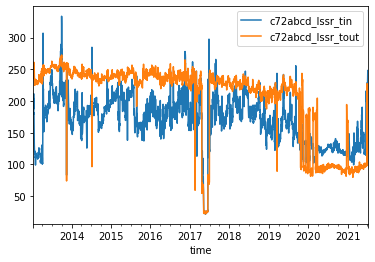

In [218]:
df['c72abcd_lssr_tin'].plot()
df['c72abcd_lssr_tout'].plot()
plt.legend()

To ADD:

- A cooler to mimic Desalter temperature drop (or simply a temp reduction function)

- function which estimates preflashed crude temp (as function of PFD temp and crude types/cdu yields?).


***#TEST VS HYSYS RIGOROUS HEX***

In [220]:
#Data from 'Hysys - Pi Data Link (PHT) rev3'

#MASSFLOWS
crude_tnh         = 522.1
c1a_crude_tnh     = 522.1/2
c1b_crude_tnh     = 522.1/2
flashed_crude_tnh = 497.4

lssr_tnh          = 81.04

c73ab_e3_feed_tnh = 148.3

#PUMPAROUNDS
c1a_e7_tpa_tnh    = 246.4/2
c1b_e7_tpa_tnh    = 246.4/2

e1_tpa_tnh        = 99.57+199.1
c2ab_e1_tpa_tnh   = 99.57
c70ab_e1_tpa_tnh  = 199.1

kpa_tnh           = 239.7
lgo_pa_tnh        = 230.4
hgo_pa_tnh        = 147.9
e7_tpa_tnh        = 246.4

hvgo_pa_tnh       = 285.2
c12ab_hvgo_tnh = 104.1
c72abcd_hvgo_tnh = 285.2-104.1
e3_bpa_tnh         = 42

#PRODUCTS
kero_prod_tnh     = 73.61
lgo_prod_tnh      = 63.84
hgo_prod_tnh      = 27.5
#e7_lvgo_prod_tnh  = df['e7_lvgo_prod_tnh'].fillna(method='ffill')[date]
#e3_lvgo_prod_tnh  = df['e3_lvgo_prod_tnh'].fillna(method='ffill')[date]
#hvgo_prod_tnh     = df['hvgo_prod_tnh'].fillna(method='ffill')[date]
ar_tnh            = 251
#c14abcd_ar_tnh    = df['c14abcd_ar_tnh'].fillna(method='ffill')[date]
vfr_to_e3_tnh     = df['vfr_to_e3_tnh'].fillna(method='ffill')[date]
vfr_to_fcc_tnh    = df['vfr_to_fcc_tnh'].fillna(method='ffill')[date]
#vr_tnh            = df['vr_tnh'].fillna(method='ffill')[date]
vbr_tnh           = 45.43
c71abc_vbr_tnh    = 45.43

#TEMPERATURES
c1a_crude_tin     = 24
c1b_crude_tin     = 24
#ADD FORMULA/FUNTION TO CALC FLASHED CRUDE TEMP

c70ab_lssr_tin    = 56
c1a_e7_tpa_tin    = 109
c1b_e7_tpa_tin    = 109
c2ab_e1_tpa_tin   = 134.3
c3_kero_prod_tin  = 186
c4ab_kpa_tin      = 193
c5ab_lgo_prod_tin = 241
c7ab_hgo_prod_tin = 282
c9ab_lgo_pa_tin   = 251
c12ab_hvgo_tin  = 264
c13ab_hgo_pa_tin  = 292.3
c14abcd_ar_tin    = 323
c73ab_e3_bpa_tin  = 336
c15abc_vbr_tin    = 338   #use the alternative vbr measuremnent
c72abcd_hvgo_tin = 264


#Set initialisation temperature to allow the program to solve
init_temp = 99

#SET STREAMS WITH INITIAL CONDITIONS

c1a_cold_in  = Stream(c1a_crude_tnh / 3.6,   c1a_crude_tin,        stream_type='crude')
c1a_cold_out = Stream(c1a_crude_tnh / 3.6,   init_temp,            stream_type='crude')
c1a_hot_in   = Stream(c1a_e7_tpa_tnh / 3.6 , c1a_e7_tpa_tin,       stream_type='e7_tpa')
c1a_hot_out  = Stream(c1a_e7_tpa_tnh / 3.6 , init_temp,            stream_type='e7_tpa')

c1b_cold_in  = Stream(c1b_crude_tnh / 3.6,  c1b_crude_tin,         stream_type='crude')
c1b_cold_out = Stream(c1b_crude_tnh / 3.6,  init_temp,             stream_type='crude')
c1b_hot_in   = Stream(c1b_e7_tpa_tnh / 3.6, c1b_e7_tpa_tin,        stream_type='e7_tpa')
c1b_hot_out  = Stream(c1b_e7_tpa_tnh / 3.6, init_temp,             stream_type='e7_tpa')

c2ab_cold_in  = Stream(crude_tnh / 3.6,       init_temp,              stream_type='crude')
c2ab_cold_out = Stream(crude_tnh / 3.6,       init_temp,              stream_type='crude')
c2ab_hot_in   = Stream(c2ab_e1_tpa_tnh / 3.6, c2ab_e1_tpa_tin, stream_type='e1_tpa')
c2ab_hot_out  = Stream(c2ab_e1_tpa_tnh / 3.6, init_temp,              stream_type='e1_tpa')

c3_cold_in  = Stream(crude_tnh / 3.6,     init_temp,               stream_type='crude')
c3_cold_out = Stream(crude_tnh / 3.6,     init_temp,               stream_type='crude')
c3_hot_in   = Stream(kero_prod_tnh / 3.6, c3_kero_prod_tin, stream_type='kero')
c3_hot_out  = Stream(kero_prod_tnh / 3.6, init_temp,               stream_type='kero')

c4ab_cold_in  = Stream(crude_tnh / 3.6, init_temp,           stream_type='crude')
c4ab_cold_out = Stream(crude_tnh / 3.6, init_temp,           stream_type='crude')
c4ab_hot_in   = Stream(kpa_tnh / 3.6,   c4ab_kpa_tin, stream_type='kero')
c4ab_hot_out  = Stream(kpa_tnh / 3.6,   init_temp,           stream_type='kero')

c5ab_cold_in  = Stream(crude_tnh / 3.6, init_temp,                   stream_type='crude')
c5ab_cold_out = Stream(crude_tnh / 3.6, init_temp,                   stream_type='crude')
c5ab_hot_in   = Stream(lgo_prod_tnh / 3.6, c5ab_lgo_prod_tin, stream_type='lgo')
c5ab_hot_out  = Stream(lgo_prod_tnh / 3.6,  init_temp,               stream_type='lgo')

c6ab_cold_in  = Stream(crude_tnh / 3.6,   init_temp, stream_type='crude')
c6ab_cold_out = Stream(crude_tnh / 3.6,   init_temp, stream_type='crude')
c6ab_hot_in   = Stream(hvgo_pa_tnh / 3.6, init_temp, stream_type='hvgo')
c6ab_hot_out  = Stream(hvgo_pa_tnh / 3.6, init_temp, stream_type='hvgo')

c7ab_cold_in  = Stream(crude_tnh / 3.6, init_temp,             stream_type='crude')
c7ab_cold_out = Stream(crude_tnh / 3.6, init_temp,             stream_type='crude')
c7ab_hot_in   = Stream(hgo_prod_tnh / 3.6, c7ab_hgo_prod_tin,  stream_type='hgo')
c7ab_hot_out  = Stream(hgo_prod_tnh / 3.6,  init_temp,         stream_type='hgo')

c8ab_cold_in  = Stream(crude_tnh / 3.6,   init_temp, stream_type='crude')
c8ab_cold_out = Stream(crude_tnh / 3.6,   init_temp, stream_type='crude')
c8ab_hot_in   = Stream(hvgo_pa_tnh / 3.6, init_temp, stream_type='hvgo')
c8ab_hot_out  = Stream(hvgo_pa_tnh / 3.6, init_temp, stream_type='hvgo')

c9ab_cold_in  = Stream(crude_tnh / 3.6,  init_temp,              stream_type='crude')
c9ab_cold_out = Stream(crude_tnh / 3.6,  init_temp,              stream_type='crude')
c9ab_hot_in   = Stream(lgo_pa_tnh / 3.6, c9ab_lgo_pa_tin, stream_type='lgo')
c9ab_hot_out  = Stream(lgo_pa_tnh / 3.6, init_temp,              stream_type='lgo')

#FLASHED CRUDE

c10ab_cold_in  = Stream(flashed_crude_tnh / 3.6,   init_temp, stream_type='crude')
c10ab_cold_out = Stream(flashed_crude_tnh / 3.6,   init_temp, stream_type='crude')
c10ab_hot_in   = Stream(hvgo_pa_tnh / 3.6,         init_temp, stream_type='hvgo')
c10ab_hot_out  = Stream(hvgo_pa_tnh / 3.6,         init_temp, stream_type='hvgo')

c11_cold_in  = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c11_cold_out = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c11_hot_in   = Stream(hgo_pa_tnh / 3.6,         init_temp, stream_type='hgo')
c11_hot_out  = Stream(hgo_pa_tnh / 3.6,         init_temp, stream_type='hgo')

c12ab_cold_in  = Stream(flashed_crude_tnh / 3.6,   init_temp, stream_type='crude')
c12ab_cold_out = Stream(flashed_crude_tnh / 3.6,   init_temp, stream_type='crude')
c12ab_hot_in   = Stream(c12ab_hvgo_tnh / 3.6,   c12ab_hvgo_tin, stream_type='hvgo')
c12ab_hot_out  = Stream(c12ab_hvgo_tnh / 3.6,   init_temp, stream_type='hvgo')

c13ab_cold_in  = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c13ab_cold_out = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c13ab_hot_in   = Stream(hgo_pa_tnh / 3.6,         c13ab_hgo_pa_tin, stream_type='hgo')
c13ab_hot_out  = Stream(hgo_pa_tnh / 3.6,         init_temp, stream_type='hgo')

#start with all AR going to C14. Use function to tune outlet temp of outlet/bypass to 280C...
c14abcd_cold_in  = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c14abcd_cold_out = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c14abcd_hot_in   = Stream(ar_tnh / 3.6,             c14abcd_ar_tin, stream_type='ar')
c14abcd_hot_out  = Stream(ar_tnh / 3.6,             init_temp, stream_type='ar')

c15abc_cold_in  = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c15abc_cold_out = Stream(flashed_crude_tnh / 3.6,  init_temp, stream_type='crude')
c15abc_hot_in   = Stream(ar_tnh / 3.6,             c15abc_vbr_tin, stream_type='ar')
c15abc_hot_out  = Stream(ar_tnh / 3.6,             init_temp, stream_type='ar')

#LSSR

c70ab_cold_in  = Stream(lssr_tnh / 3.6,         c70ab_lssr_tin,              stream_type='lssr')
c70ab_cold_out = Stream(lssr_tnh / 3.6,         init_temp,              stream_type='lssr')
c70ab_hot_in   = Stream(c70ab_e1_tpa_tnh / 3.6, c2ab_e1_tpa_tin, stream_type='e1_tpa')
c70ab_hot_out  = Stream(c70ab_e1_tpa_tnh / 3.6, init_temp,              stream_type='e1_tpa')

c71abc_cold_in  = Stream(lssr_tnh / 3.6,        init_temp, stream_type='lssr')
c71abc_cold_out = Stream(lssr_tnh / 3.6,        init_temp, stream_type='lssr')
c71abc_hot_in   = Stream(c71abc_vbr_tnh / 3.6,  init_temp, stream_type='vbr')
c71abc_hot_out  = Stream(c71abc_vbr_tnh / 3.6,  init_temp, stream_type='vbr')

c72abcd_cold_in  = Stream(lssr_tnh / 3.6,             init_temp,           stream_type='lssr')
c72abcd_cold_out = Stream(lssr_tnh / 3.6,             init_temp,           stream_type='lssr')
c72abcd_hot_in   = Stream(c72abcd_hvgo_tnh / 3.6,  c72abcd_hvgo_tin, stream_type='hvgo')
c72abcd_hot_out  = Stream(c72abcd_hvgo_tnh / 3.6,  init_temp,           stream_type='hvgo')

vfr_to_e3      = Stream(vfr_to_e3_tnh / 3.6, 255, stream_type='lssr')     #enter estimated vfr temp for now. Assume lssr for cp calc

c73ab_cold_in  = Stream(c73ab_e3_feed_tnh / 3.6,        init_temp, stream_type='lssr')
c73ab_cold_out = Stream(c73ab_e3_feed_tnh / 3.6,        init_temp, stream_type='lssr')
c73ab_hot_in   = Stream(e3_bpa_tnh / 3.6,  c73ab_e3_bpa_tin, stream_type='vr')
c73ab_hot_out  = Stream(e3_bpa_tnh / 3.6,  init_temp, stream_type='vr')

#Use same U values as Hysys sim
#convert units from  kcal/hr.m2C to w/m2.C

c1ab_ucalc1 = 183.7
c2ab_ucalc1 = 179.7
c3_ucalc1   = 179.7
c4ab_ucalc1 = 282.2
c5ab_ucalc1 = 197
c6ab_ucalc1 = 216.9
c7ab_ucalc1 = 142.9
c8ab_ucalc1 = 222.9
c9ab_ucalc1 = 254.1
c10ab_ucalc1 = 237
c11_ucalc1 = 233.5
c12ab_ucalc1 = 215.6
c13ab_ucalc1 = 255
c14abcd_ucalc1 = 208
c15abc_ucalc1 = 202.4
c70ab_ucalc1 = 145.4
c71abc_ucalc1 = 93.2
c72abcd_ucalc1 = 202.8
c73ab_ucalc1 = 140.4

# tolerance = 0.5

# while (c2ab.energy_balance() > tolerance or c3.energy_balance() > tolerance
#       or c4ab.energy_balance() > tolerance or c5ab.energy_balance() > tolerance): 
count = 0
for iteration in range(0,50):

    #Create/Update the exchangers with updated streams
    c1a = Hex(name     ='c1a',
              cold_in    = c1a_cold_in, 
              cold_out   = c1a_cold_out, 
              hot_in     = c1a_hot_in,
              hot_out    = c1a_hot_out, 
              u          = c1ab_ucalc1, 
              area_shell = 269.4, 
              n_shells   = 1
              )

    c1b = Hex(name     ='c1b',
              cold_in    = c1b_cold_in, 
              cold_out   = c1b_cold_out, 
              hot_in     = c1b_hot_in,
              hot_out    = c1b_hot_out, 
              u          = c1ab_ucalc1, 
              area_shell = 269.4, 
              n_shells   = 1
              )

    c2ab = Hex(name     ='c2ab',
               cold_in    = c2ab_cold_in, 
               cold_out   = c2ab_cold_out, 
               hot_in     = c2ab_hot_in,
               hot_out    = c2ab_hot_out, 
               u          = c2ab_ucalc1, 
               area_shell = 195.8, 
               n_shells   = 2
               )

    c3 = Hex(name     ='c3',
              cold_in     = c3_cold_in, 
              cold_out   = c3_cold_out, 
              hot_in     = c3_hot_in,
              hot_out    = c3_hot_out, 
              u          = c3_ucalc1, 
              area_shell = 233.4, 
              n_shells   = 1
              )

    c4ab = Hex(name     ='c4ab',
               cold_in    = c4ab_cold_in, 
               cold_out   = c4ab_cold_out, 
               hot_in     = c4ab_hot_in,
               hot_out    = c4ab_hot_out, 
               u          = c4ab_ucalc1, 
               area_shell = 204.4, 
               n_shells   = 2
               )

    c5ab = Hex(name     ='c5ab',
               cold_in    = c5ab_cold_in, 
               cold_out   = c5ab_cold_out, 
               hot_in     = c5ab_hot_in,
               hot_out    = c5ab_hot_out, 
               u          = c5ab_ucalc1, 
               area_shell = 247.5, 
               n_shells   = 2
               )

    c6ab = Hex(name     ='c6ab',
              cold_in    = c6ab_cold_in, 
               cold_out   = c6ab_cold_out, 
               hot_in     = c6ab_hot_in,
               hot_out    = c6ab_hot_out, 
               u          = c6ab_ucalc1, 
               area_shell = 382.6, 
               n_shells   = 2
               )

    c7ab = Hex(name     ='c7ab',
              cold_in    = c7ab_cold_in, 
               cold_out   = c7ab_cold_out, 
               hot_in     = c7ab_hot_in,
               hot_out    = c7ab_hot_out, 
               u          = c7ab_ucalc1, 
               area_shell = 194.2, 
               n_shells   = 2
               )

    c8ab = Hex(name     ='c8ab',
              cold_in    = c8ab_cold_in, 
               cold_out   = c8ab_cold_out, 
               hot_in     = c8ab_hot_in,
               hot_out    = c8ab_hot_out, 
               u          = c8ab_ucalc1, 
               area_shell = 399.6, 
               n_shells   = 2
               )

    c9ab = Hex(name     ='c9ab',
               cold_in    = c9ab_cold_in, 
               cold_out   = c9ab_cold_out, 
               hot_in     = c9ab_hot_in,
               hot_out    = c9ab_hot_out, 
               u          = c9ab_ucalc1, 
               area_shell = 207.6, 
               n_shells   = 2
              )

    c10ab = Hex(name     ='c10ab',
               cold_in   = c10ab_cold_in, 
               cold_out   = c10ab_cold_out, 
               hot_in     = c10ab_hot_in,
               hot_out    = c10ab_hot_out, 
               u          = c10ab_ucalc1, 
               area_shell = 351.1, 
               n_shells   = 2
               )

    c11 = Hex(name     ='c11',
               cold_in     = c11_cold_in, 
               cold_out   = c11_cold_out, 
               hot_in     = c11_hot_in,
               hot_out    = c11_hot_out, 
               u          = c11_ucalc1, 
               area_shell = 341.7, 
               n_shells   = 1
               )

    c12ab = Hex(name     ='c12ab',
               cold_in   = c12ab_cold_in, 
               cold_out   = c12ab_cold_out, 
               hot_in     = c12ab_hot_in,
               hot_out    = c12ab_hot_out, 
               u          = c12ab_ucalc1, 
               area_shell = 264.2, 
               n_shells   = 2
               )

    c13ab = Hex(name     ='c13ab',
              cold_in   = c13ab_cold_in, 
               cold_out   = c13ab_cold_out, 
               hot_in     = c13ab_hot_in,
               hot_out    = c13ab_hot_out, 
               u          = c13ab_ucalc1, 
               area_shell = 178.8, 
               n_shells   = 2
               )

    c14abcd = Hex(name     ='c14abcd',
               cold_in = c14abcd_cold_in, 
               cold_out   = c14abcd_cold_out, 
               hot_in     = c14abcd_hot_in,
               hot_out    = c14abcd_hot_out, 
               u          = c14abcd_ucalc1, 
               area_shell = 207.8, 
               n_shells   = 4
               )           

    c15abc = Hex(name     ='c15abc',
               cold_in  = c15abc_cold_in, 
               cold_out   = c15abc_cold_out, 
               hot_in     = c15abc_hot_in,
               hot_out    = c15abc_hot_out, 
               u          = c15abc_ucalc1, 
               area_shell = 155.7, 
               n_shells   = 3
               )           

    c70ab = Hex(name     ='c70ab',
           cold_in   = c70ab_cold_in, 
               cold_out   = c70ab_cold_out, 
               hot_in     = c70ab_hot_in,
               hot_out    = c70ab_hot_out, 
               u          = c70ab_ucalc1, 
               area_shell = 173.2, 
               n_shells   = 2
               )           

    c71abc = Hex(name     ='c71abc',
               cold_in  = c71abc_cold_in, 
               cold_out   = c71abc_cold_out, 
               hot_in     = c71abc_hot_in,
               hot_out    = c71abc_hot_out, 
               u          = c71abc_ucalc1, 
               area_shell = 175.2, 
               n_shells   = 3
               )             

    c72abcd = Hex(name     ='c72abcd',
               cold_in = c72abcd_cold_in, 
               cold_out   = c72abcd_cold_out, 
               hot_in     = c72abcd_hot_in,
               hot_out    = c72abcd_hot_out, 
               u          = c72abcd_ucalc1, 
               area_shell = 196.6, 
               n_shells   = 4
               )            

    c73ab = Hex(name     ='c73ab',
               cold_in   = c73ab_cold_in, 
               cold_out   = c73ab_cold_out, 
               hot_in     = c73ab_hot_in,
               hot_out    = c73ab_hot_out, 
               u          = c73ab_ucalc1, 
               area_shell = 321.2, 
               n_shells   = 2
               )         

    ##Update stream temps with exchanger calcs

    c1a_cold_in  = Stream(c1a_crude_tnh / 3.6,   c1a_crude_tin, stream_type='crude')
    c1a_cold_out = Stream(c1a_crude_tnh / 3.6,   c1a.cold_tout(),            stream_type='crude')
    c1a_hot_in   = Stream(c1a_e7_tpa_tnh / 3.6 , c1a_e7_tpa_tin,stream_type='e7_tpa')
    c1a_hot_out  = Stream(c1a_e7_tpa_tnh / 3.6 , c1a.hot_tout(),            stream_type='e7_tpa')

    c1b_cold_in  = Stream(c1b_crude_tnh / 3.6,  c1b_crude_tin,  stream_type='crude')
    c1b_cold_out = Stream(c1b_crude_tnh / 3.6,  c1b.cold_tout(),             stream_type='crude')
    c1b_hot_in   = Stream(c1b_e7_tpa_tnh / 3.6, c1b_e7_tpa_tin, stream_type='e7_tpa')
    c1b_hot_out  = Stream(c1b_e7_tpa_tnh / 3.6, c1b.hot_tout(),             stream_type='e7_tpa')

    c2ab_cold_in  = stream_mixer(c1a_cold_out, c1b_cold_out)
    #c2ab_cold_in = Stream(crude_tnh / 3.6,       init_temp,         stream_type='crude')
    c2ab_cold_out = Stream(crude_tnh / 3.6,       c2ab.cold_tout(),  stream_type='crude')
    c2ab_hot_in   = Stream(c2ab_e1_tpa_tnh / 3.6, c2ab_e1_tpa_tin,   stream_type='e1_tpa')
    c2ab_hot_out  = Stream(c2ab_e1_tpa_tnh / 3.6, c2ab.hot_tout(),   stream_type='e1_tpa')

    c3_cold_in  = c2ab_cold_out
    c3_cold_out = Stream(crude_tnh / 3.6,     c3.cold_tout(),       stream_type='crude')
    c3_hot_in   = Stream(kero_prod_tnh / 3.6, c3_kero_prod_tin,     stream_type='kero')
    c3_hot_out  = Stream(kero_prod_tnh / 3.6, c3.hot_tout(),        stream_type='kero')

    c4ab_cold_in  = c3_cold_out
    c4ab_cold_out = Stream(crude_tnh / 3.6, c4ab.cold_tout(),       stream_type='crude')
    c4ab_hot_in   = Stream(kpa_tnh / 3.6,   c4ab_kpa_tin,           stream_type='kero')
    c4ab_hot_out  = Stream(kpa_tnh / 3.6,   c4ab.hot_tout(),        stream_type='kero')

    c5ab_cold_in  = c4ab_cold_out
    c5ab_cold_out = Stream(crude_tnh / 3.6,    c5ab.cold_tout(),    stream_type='crude')
    c5ab_hot_in   = Stream(lgo_prod_tnh / 3.6, c5ab_lgo_prod_tin,   stream_type='lgo')
    c5ab_hot_out  = Stream(lgo_prod_tnh / 3.6, c5ab.hot_tout(),     stream_type='lgo')

    c6ab_cold_in  = c5ab_cold_out
    c6ab_cold_out = Stream(crude_tnh / 3.6,   c6ab.cold_tout(), stream_type='crude')
    c6ab_hot_in   = c8ab_hot_out
    c6ab_hot_out  = Stream(hvgo_pa_tnh / 3.6, c6ab.hot_tout(), stream_type='hvgo')

    #DESALTER

    c7ab_cold_in  = Stream(crude_tnh / 3.6,    c6ab.cold_tout()-3, stream_type='crude')   #estimate desalter temp drop for now
    c7ab_cold_out = Stream(crude_tnh / 3.6,    c7ab.cold_tout(),   stream_type='crude')
    c7ab_hot_in   = Stream(hgo_prod_tnh / 3.6, c7ab_hgo_prod_tin,  stream_type='hgo')
    c7ab_hot_out  = Stream(hgo_prod_tnh / 3.6, c7ab.hot_tout(),    stream_type='hgo')

    c8ab_cold_in  = c7ab_cold_out
    c8ab_cold_out = Stream(crude_tnh / 3.6,   c8ab.cold_tout(), stream_type='crude')
    c8ab_hot_in   = c10ab_hot_out
    c8ab_hot_out  = Stream(hvgo_pa_tnh / 3.6, c8ab.hot_tout(),  stream_type='hvgo')

    c9ab_cold_in  = c8ab_cold_out
    c9ab_cold_out = Stream(crude_tnh / 3.6,  c9ab.cold_tout(),   stream_type='crude')
    c9ab_hot_in   = Stream(lgo_pa_tnh / 3.6, c9ab_lgo_pa_tin,    stream_type='lgo')
    c9ab_hot_out  = Stream(lgo_pa_tnh / 3.6, c9ab.hot_tout(),     stream_type='lgo')

    #FLASHED CRUDE

    c10ab_cold_in  = Stream(flashed_crude_tnh / 3.6,   c9ab.cold_tout()-5 , stream_type='crude')  #estimate temp drop over pre-flash drum for now
    c10ab_cold_out = Stream(flashed_crude_tnh / 3.6,   c10ab.cold_tout(),   stream_type='crude')
    c10ab_hot_in   = stream_mixer(c12ab_hot_out, c72abcd_hot_out)
    #c10ab_hot_in   = Stream(hvgo_pa_tnh / 3.6,        init_temp,           stream_type='hvgo')
    c10ab_hot_out  = Stream(hvgo_pa_tnh / 3.6,         c10ab.hot_tout(),    stream_type='hvgo')

    c11_cold_in  = c10ab_cold_out
    c11_cold_out = Stream(flashed_crude_tnh / 3.6, c11.cold_tout(),stream_type='crude')
    c11_hot_in   = c13ab_hot_out
    c11_hot_out  = Stream(hgo_pa_tnh / 3.6,        c11.hot_tout(), stream_type='hgo')

    c12ab_cold_in  = c11_cold_out
    c12ab_cold_out = Stream(flashed_crude_tnh / 3.6,   c12ab.cold_tout(), stream_type='crude')
    c12ab_hot_in   = Stream(c12ab_hvgo_tnh / 3.6,   c12ab_hvgo_tin,    stream_type='hvgo')
    c12ab_hot_out  = Stream(c12ab_hvgo_tnh / 3.6,   c12ab.hot_tout(),  stream_type='hvgo')

    c13ab_cold_in  = c12ab_cold_out
    c13ab_cold_out = Stream(flashed_crude_tnh / 3.6,  c13ab.cold_tout(), stream_type='crude')
    c13ab_hot_in   = Stream(hgo_pa_tnh / 3.6,         c13ab_hgo_pa_tin, stream_type='hgo')
    c13ab_hot_out  = Stream(hgo_pa_tnh / 3.6,         c13ab.hot_tout(), stream_type='hgo')

    #start with all AR going to C14. Add function to tune outlet temp of outlet/bypass to 280C...
    #XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

    #all AR to c14
    c14abcd_ar_tnh = ar_tnh
    c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)/ 3.6, c14abcd.hot_in.temp, stream_type='ar')

    e7_feed_target_temp = 280
    c14abcd_ar_tnh = ar_tnh * (e7_feed_target_temp - c14_bypass.temp) / (c14abcd.hot_tout() - c14abcd.hot_in.temp)

    if c14abcd_ar_tnh > ar_tnh:
        c14abcd_ar_tnh = ar_tnh
    elif c14abcd_ar_tnh < 0:
        c14abcd_ar_tnh = 0
    else:
        pass

    c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)/ 3.6, c14_bypass.temp, stream_type='ar')
    e7_feed = stream_mixer(c14abcd_hot_out, c14_bypass)

    c14abcd_cold_in  = c13ab_cold_out
    c14abcd_cold_out = Stream(flashed_crude_tnh / 3.6,  c14abcd.cold_tout(), stream_type='crude')
    c14abcd_hot_in   = Stream(c14abcd_ar_tnh / 3.6,             c14abcd_ar_tin,      stream_type='ar')
    c14abcd_hot_out  = Stream(c14abcd_ar_tnh / 3.6,             c14abcd.hot_tout(),  stream_type='ar')

    c15abc_cold_in  = c14abcd_cold_out
    c15abc_cold_out = Stream(flashed_crude_tnh / 3.6,  c15abc.cold_tout(), stream_type='crude')
    c15abc_hot_in   = Stream(vbr_tnh / 3.6,             c15abc_vbr_tin,     stream_type='vbr')
    c15abc_hot_out  = Stream(vbr_tnh / 3.6,             c15abc.hot_tout(),  stream_type='vbr')

    #LSSR

    c70ab_cold_in  = Stream(lssr_tnh / 3.6,         c70ab_lssr_tin,     stream_type='lssr')
    c70ab_cold_out = Stream(lssr_tnh / 3.6,         c70ab.cold_tout(),  stream_type='lssr')
    c70ab_hot_in   = Stream(c70ab_e1_tpa_tnh / 3.6, c2ab_e1_tpa_tin,    stream_type='e1_tpa')
    c70ab_hot_out  = Stream(c70ab_e1_tpa_tnh / 3.6, c70ab.hot_tout(),   stream_type='e1_tpa')

    c71abc_cold_in  = c70ab_cold_out
    c71abc_cold_out = Stream(lssr_tnh / 3.6,        c71abc.cold_tout(), stream_type='lssr')
    c71abc_hot_in   = Stream(c71abc_vbr_tnh / 3.6,  c15abc.hot_tout(),  stream_type='vbr')
    c71abc_hot_out  = Stream(c71abc_vbr_tnh / 3.6,  c71abc.hot_tout(),  stream_type='vbr')

    c72abcd_cold_in  = c71abc_cold_out
    c72abcd_cold_out = Stream(lssr_tnh / 3.6,            c72abcd.cold_tout(), stream_type='lssr')
    c72abcd_hot_in   = Stream(c72abcd_hvgo_tnh / 3.6, c72abcd_hvgo_tin,    stream_type='hvgo')
    c72abcd_hot_out  = Stream(c72abcd_hvgo_tnh / 3.6, c72abcd.hot_tout(),  stream_type='hvgo')

    c73ab_cold_in  = stream_mixer(vfr_to_e3, c72abcd_cold_out)  #assumes vfr and lssr are similar for the sake of cp calc
    c73ab_cold_out = Stream(c73ab_e3_feed_tnh / 3.6,  c73ab.cold_tout(), stream_type='lssr')
    c73ab_hot_in   = Stream(e3_bpa_tnh / 3.6,         c73ab_e3_bpa_tin, stream_type='vr')
    c73ab_hot_out  = Stream(e3_bpa_tnh / 3.6,         c73ab.hot_tout(), stream_type='vr')
    
    


In [221]:
#Hysys Desalter Temp - 130C
c6ab.cold_tout()

128.10183449965223

In [222]:
#Hysys PFD Temp - 172C
c9ab.cold_tout()

171.32589851482842

In [230]:
#HYSYS flashed crude = 588m3/h
flashed_crude_m3h(625, 171.3)

566.4

In [231]:
#HYSYS flashed crude SG = 0.8457
flashed_crude_sg(0.8362, 171.3)

0.844051918

In [225]:
#Hysys PHT - 249C
c15abc.cold_tout()

247.50926182207962

***DATA RECONCILLIATION***

For Each Heat Exchanger Assume: <br>

- Inlet stream flows and temps = True <br>
- Crude flow = True <br>
- Crude Tin/Tout = True <br>
- Q_crude = True <br>
- Hot_tin = True. Where Hot_tin relies on temperature from another exchanger, calculate this stream first and use <br>
 <br>
LMTD calculated using measured values <br>
Calc U = Q / A*LMTD <br><br>

Calculate hex network 

If Q_hot != Q_old then hot_flow and/or hot_tout could be incorrect: <br>
    - Assume hot_flow = True <br>
    - Calc hot_tout independently and update LMTD calc <br>
    - Recalculate U value <br>
    - Repeat until U value stabilises <br>

In [128]:
def plot_ucalcs(hx, cold=True, hot=True):
    
    fig, ax = plt.subplots(figsize=(30,6))
    plt.xlim(date_indx[0], date_indx[-1])
    if cold:
        ax.plot(df[hx.lower()+'_ucalc1']*1.163)
        ax.plot(date_indx, globals()[hx.lower()+'_u_new_list'])
        plt.legend(['ucalc1', 'ucal_new'])
        plt.grid()
    if hot:
        ax.plot(df[hx.lower()+'_ucalc2']*1.163)
        plt.legend(['ucalc1', 'ucal_new', 'ucalc2'])
    
    plt.title(hx.upper()+' U Values', size=16)
    

***USING ORIGINAL CALCULATED U VALUES***

In [260]:
# desalter_temp_calc_list = []
# pfd_temp_calc_list = []
# c1ab_duty_calc_list = []
# c2ab_duty_calc_list = []
# c3_duty_calc_list = []
# c4ab_duty_calc_list = []
# c5ab_duty_calc_list = []
# c6ab_duty_calc_list = []
# c7ab_duty_calc_list = []
# c8ab_duty_calc_list = []
# c9ab_duty_calc_list = []
# c10ab_duty_calc_list = []
# c11_duty_calc_list = []
# c12ab_duty_calc_list = []
# c13ab_duty_calc_list = []
# c14abcd_duty_calc_list = []
# c15abc_duty_calc_list = []
# c70ab_duty_calc_list = []
# c71abc_duty_calc_list = []
# c72abcd_duty_calc_list = []
# c73ab_duty_calc_list = []

# #crude temps
# c1ab_crude_tout_list = []
# c2ab_crude_tout_list = []
# c3_crude_tout_list = []
# c4ab_crude_tout_list = []
# c5ab_crude_tout_list = []
# c6ab_crude_tout_list = []
# c7ab_crude_tout_list = []
# c8ab_crude_tout_list = []
# c9ab_crude_tout_list = []
# c10ab_flashed_crude_tout_list = []
# c11_flashed_crude_tout_list = []
# c12ab_flashed_crude_tout_list = []
# c13ab_flashed_crude_tout_list = []
# c14abcd_flashed_crude_tout_list = []
# c15abc_flashed_crude_tout_list = []
# c70ab_crude_tout_list = []
# c71abc_crude_tout_list = []
# c72abcd_crude_tout_list = []
# c73ab_crude_tout_list = []

# #hvgo_pa temps

# c12ab_hvgo_tout_list = []
# c72abcd_hvgo_tout_list = []
# c10ab_hvgo_tout_list = []
# c8ab_hvgo_tout_list = []
# c6ab_hvgo_tout_list = []

# e7_feed_temp_list = []

# #NEW U VALUES
# c1ab_u_new_list= []
# c1a_u_new_list= []
# c1b_u_new_list= []
# c2ab_u_new_list= []
# c3_u_new_list= []
# c4ab_u_new_list= []
# c5ab_u_new_list= []
# c6ab_u_new_list= []
# c7ab_u_new_list= []
# c8ab_u_new_list= []
# c9ab_u_new_list= []
# c10ab_u_new_list= []
# c11_u_new_list= []
# c12ab_u_new_list= []
# c13ab_u_new_list= []
# c14abcd_u_new_list= []
# c15abc_u_new_list= []
# c70ab_u_new_list= []
# c71abc_u_new_list= []
# c72abcd_u_new_list= []
# c73ab_u_new_list= []

# pht_error = []
# pht_squared_error = []

# date_indx = []


# for date in df.index:
    
# #for date in df[(df.index.year==2019)].index:
# #for date in ['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01']:
# #for date in ['2019-01-31']:

# #select which data to use ie. from which date. Default will be latest measurements

# # latest_date = df.index[-1]

# # while True:
# #     date = input("Enter date (yyyy-mm-dd). Leave blank to use latest : ")
    
# #     if date == "":
# #         date = latest_date
# #         print(date)
# #         break 
# #     elif date not in df.index:
# #         print("Invalid date")       
# #     else:
# #         break

# #Extract the massflows and temperatures of inlet streams at the selected date

#     try:
#         #MASSFLOWS
#         crude_tnh         = df['crude_tnh'].fillna(method='ffill')[date]
#         c1a_crude_tnh     = df['c1a_crude_tnh'].fillna(method='ffill')[date]
#         c1b_crude_tnh     = df['c1b_crude_tnh'].fillna(method='ffill')[date]
#         flashed_crude_tnh = df['flashed_crude_tnh'].fillna(method='ffill')[date]

#         lssr_tnh          = df['lssr_tnh'].fillna(method='ffill')[date]
#         c73ab_e3_feed_tnh = df['c73ab_e3_feed_tnh'].fillna(method='ffill')[date]

#         #PUMPAROUNDS
#         c1a_e7_tpa_tnh    = df['c1a_e7_tpa_tnh'].fillna(method='ffill')[date]
#         c1b_e7_tpa_tnh    = df['c1b_e7_tpa_tnh'].fillna(method='ffill')[date]

#         e1_tpa_tnh        = df['e1_tpa_tnh'].fillna(method='ffill')[date]
#         c2ab_e1_tpa_tnh   = df['c2ab_e1_tpa_tnh'].fillna(method='ffill')[date]
#         c70ab_e1_tpa_tnh  = df['c70ab_e1_tpa_tnh'].fillna(method='ffill')[date]

#         kpa_tnh           = df['kpa_tnh'].fillna(method='ffill')[date]
#         lgo_pa_tnh        = df['lgo_pa_tnh'].fillna(method='ffill')[date]
#         hgo_pa_tnh        = df['hgo_pa_tnh'].fillna(method='ffill')[date]
#         e7_tpa_tnh        = df['e7_tpa_tnh'].fillna(method='ffill')[date]

#         hvgo_pa_tnh       = df['hvgo_pa_tnh'].fillna(method='ffill')[date]
#         hvgo_tnh = hvgo_pa_tnh

#         c12ab_hvgo_tnh = df['c12ab_hvgo_tnh'].fillna(method='ffill')[date]
#         c72abcd_hvgo_tnh = df['c72abcd_hvgo_tnh'].fillna(method='ffill')[date]
#         e3_bpa_tnh         = df['e3_bpa_tnh'].fillna(method='ffill')[date]

#         #PRODUCTS
#         kero_prod_tnh     = df['kero_prod_tnh'].fillna(method='ffill')[date]
#         lgo_prod_tnh      = df['lgo_prod_tnh'].fillna(method='ffill')[date]
#         hgo_prod_tnh      = df['hgo_prod_tnh'].fillna(method='ffill')[date]
#         e7_lvgo_prod_tnh  = df['e7_lvgo_prod_tnh'].fillna(method='ffill')[date]
#         e3_lvgo_prod_tnh  = df['e3_lvgo_prod_tnh'].fillna(method='ffill')[date]
#         hvgo_prod_tnh     = df['hvgo_prod_tnh'].fillna(method='ffill')[date]
#         ar_tnh            = df['ar_tnh'].fillna(method='ffill')[date]
#         c14abcd_ar_tnh    = df['c14abcd_ar_tnh'].fillna(method='ffill')[date]
#         vfr_to_e3_tnh     = df['vfr_to_e3_tnh'].fillna(method='ffill')[date]
#         vfr_to_fcc_tnh    = df['vfr_to_fcc_tnh'].fillna(method='ffill')[date]
#         vr_tnh            = df['vr_tnh'].fillna(method='ffill')[date]
#         vbr_tnh           = df['vbr_tnh'].fillna(method='ffill')[date]
#         c71abc_vbr_tnh    = df['c71abc_vbr_tnh'].fillna(method='ffill')[date]

#         #TEMPERATURES
#         c1a_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]
#         c1b_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]

#         #ADD FORMULA/FUNTION TO CALC FLASHED CRUDE TEMP

#         c70ab_lssr_tin    = df['c70ab_lssr_tin'].fillna(method='ffill')[date]
#         c1a_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
#         c1b_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
#         c2ab_e1_tpa_tin   = df['c2ab_e1_tpa_tin'].fillna(method='ffill')[date] 
#         c3_kero_prod_tin  = df['c3_kero_prod_tin'].fillna(method='ffill')[date]  
#         c4ab_kpa_tin      = df['c4ab_kpa_tin'].fillna(method='ffill')[date]      
#         c5ab_lgo_prod_tin = df['c5ab_lgo_prod_tin'].fillna(method='ffill')[date]
#         c7ab_hgo_prod_tin = df['c7ab_hgo_prod_tin'].fillna(method='ffill')[date]
#         c9ab_lgo_pa_tin   = df['c9ab_lgo_pa_tin'].fillna(method='ffill')[date]
#         c12ab_hvgo_tin  = df['c12ab_hvgo_tin'].fillna(method='ffill')[date]
#         c13ab_hgo_pa_tin  = df['c13ab_hgo_pa_tin'].fillna(method='ffill')[date]
#         c14abcd_ar_tin    = df['c14abcd_ar_tin'].fillna(method='ffill')[date]
#         c73ab_e3_bpa_tin  = df['c73ab_e3_bpa_tin'].fillna(method='ffill')[date]
#         c15abc_vbr_tin    = df['c15abc_vbr_tin_alt'].fillna(method='ffill')[date]    #use the alternative vbr measuremnent
#         c72abcd_hvgo_tin = df['c72abcd_hvgo_tin'].fillna(method='ffill')[date]


#         #Pick out U values at selected date
#         #convert units from  kcal/hr.m2C to w/m2.C
#         #Forward fill missing values for now...

#         c1ab_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
#         c1a_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
#         c1b_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163

#         c2ab_ucalc1 = df['c2ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c3_ucalc1   = df['c3_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c4ab_ucalc1 = df['c4ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c5ab_ucalc1 = df['c5ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c6ab_ucalc1 = df['c6ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c7ab_ucalc1 = df['c7ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c8ab_ucalc1 = df['c8ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c9ab_ucalc1 = df['c9ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c10ab_ucalc1 = df['c10ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c11_ucalc1 = df['c11_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c12ab_ucalc1 = df['c12ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c13ab_ucalc1 = df['c13ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c14abcd_ucalc1 = df['c14abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c15abc_ucalc1 = df['c15abc_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c70ab_ucalc1 = df['c70ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c71abc_ucalc1 = df['c71abc_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c72abcd_ucalc1 = df['c72abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c73ab_ucalc1 = df['c73ab_ucalc1'].fillna(method='ffill')[date]* 1.163

#         #Set initialisation temperature to allow the program to solve
#         init_temp = 99


#         #Create the exchangers and streams
#         c1a = Hex(name       ='c1a',
#                   cold_in    = Stream(c1a_crude_tnh/3.6,   c1a_crude_tin,        stream_type='crude'), 
#                   cold_out   = Stream(c1a_crude_tnh/3.6,   init_temp,            stream_type='crude'), 
#                   hot_in     = Stream(c1a_e7_tpa_tnh/3.6 , c1a_e7_tpa_tin,       stream_type='e7_tpa'),
#                   hot_out    = Stream(c1a_e7_tpa_tnh/3.6 , init_temp,            stream_type='e7_tpa'), 
#                   u          = c1ab_ucalc1, 
#                   area_shell = 269.4, 
#                   n_shells   = 1
#                   )

#         c1b = Hex(name       ='c1b',
#                   cold_in    = Stream(c1b_crude_tnh/3.6,  c1b_crude_tin,         stream_type='crude'), 
#                   cold_out   = Stream(c1b_crude_tnh/3.6,  init_temp,             stream_type='crude'), 
#                   hot_in     = Stream(c1b_e7_tpa_tnh/3.6, c1b_e7_tpa_tin,        stream_type='e7_tpa'),
#                   hot_out    = Stream(c1b_e7_tpa_tnh/3.6, init_temp,             stream_type='e7_tpa'), 
#                   u          = c1ab_ucalc1, 
#                   area_shell = 269.4, 
#                   n_shells   = 1
#                   )

#         c2ab = Hex(name       ='c2ab',
#                    cold_in    = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
#                    hot_in     = Stream(c2ab_e1_tpa_tnh/3.6, c2ab_e1_tpa_tin,     stream_type='e1_tpa'),
#                    hot_out    = Stream(c2ab_e1_tpa_tnh/3.6, init_temp,           stream_type='e1_tpa'), 
#                    u          = c2ab_ucalc1, 
#                    area_shell = 195.8, 
#                    n_shells   = 2
#                    )

#         c3 = Hex(name        ='c3',
#                   cold_in    = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
#                   cold_out   = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
#                   hot_in     = Stream(kero_prod_tnh/3.6, c3_kero_prod_tin,        stream_type='kero'),
#                   hot_out    = Stream(kero_prod_tnh/3.6, init_temp,               stream_type='kero'), 
#                   u          = c3_ucalc1, 
#                   area_shell = 233.4, 
#                   n_shells   = 1
#                   )

#         c4ab = Hex(name       ='c4ab',
#                    cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    hot_in     = Stream(kpa_tnh/3.6,   c4ab_kpa_tin,              stream_type='kero'),
#                    hot_out    = Stream(kpa_tnh/3.6,   init_temp,                 stream_type='kero'), 
#                    u          = c4ab_ucalc1, 
#                    area_shell = 204.4, 
#                    n_shells   = 2
#                    )

#         c5ab = Hex(name     ='c5ab',
#                    cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    hot_in     = Stream(lgo_prod_tnh/3.6, c5ab_lgo_prod_tin,      stream_type='lgo'),
#                    hot_out    = Stream(lgo_prod_tnh/3.6,  init_temp,             stream_type='lgo'), 
#                    u          = c5ab_ucalc1, 
#                    area_shell = 247.5, 
#                    n_shells   = 2
#                    )

#         c6ab = Hex(name     ='c6ab',
#                   cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
#                    hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
#                    u          = c6ab_ucalc1, 
#                    area_shell = 382.6, 
#                    n_shells   = 2
#                    )

#         c7ab = Hex(name     ='c7ab',
#                   cold_in    = Stream(crude_tnh/3.6, init_temp,             stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6, init_temp,             stream_type='crude'), 
#                    hot_in     = Stream(hgo_prod_tnh/3.6, c7ab_hgo_prod_tin,  stream_type='hgo'),
#                    hot_out    = Stream(hgo_prod_tnh/3.6,  init_temp,         stream_type='hgo'), 
#                    u          = c7ab_ucalc1, 
#                    area_shell = 194.2, 
#                    n_shells   = 2
#                    )

#         c8ab = Hex(name     ='c8ab',
#                   cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
#                    hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
#                    u          = c8ab_ucalc1, 
#                    area_shell = 399.6, 
#                    n_shells   = 2
#                    )

#         c9ab = Hex(name     ='c9ab',
#                    cold_in    = Stream(crude_tnh/3.6,  init_temp,            stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,  init_temp,            stream_type='crude'), 
#                    hot_in     = Stream(lgo_pa_tnh/3.6, c9ab_lgo_pa_tin,      stream_type='lgo'),
#                    hot_out    = Stream(lgo_pa_tnh/3.6, init_temp,            stream_type='lgo'), 
#                    u          = c9ab_ucalc1, 
#                    area_shell = 207.6, 
#                    n_shells   = 2
#                   )

#         c10ab = Hex(name      ='c10ab',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'),
#                    hot_out    = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'), 
#                    u          = c10ab_ucalc1, 
#                    area_shell = 351.1, 
#                    n_shells   = 2
#                    )

#         c11 = Hex(name        ='c11',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'),
#                    hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
#                    u          = c11_ucalc1, 
#                    area_shell = 341.7, 
#                    n_shells   = 1
#                    )

#         c12ab = Hex(name      ='c12ab',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(c12ab_hvgo_tnh/3.6,      c12ab_hvgo_tin, stream_type='hvgo'),
#                    hot_out    = Stream(c12ab_hvgo_tnh/3.6,      init_temp, stream_type='hvgo'), 
#                    u          = c12ab_ucalc1, 
#                    area_shell = 264.2, 
#                    n_shells   = 2
#                    )

#         c13ab = Hex(name      ='c13ab',
#                   cold_in     = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(hgo_pa_tnh/3.6,         c13ab_hgo_pa_tin, stream_type='hgo'),
#                    hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
#                    u          = c13ab_ucalc1, 
#                    area_shell = 178.8, 
#                    n_shells   = 2
#                    )

#         c14abcd = Hex(name    ='c14abcd',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(ar_tnh/3.6,             c14abcd_ar_tin, stream_type='ar'),
#                    hot_out    = Stream(ar_tnh/3.6,             init_temp, stream_type='ar'), 
#                    u          = c14abcd_ucalc1, 
#                    area_shell = 207.8, 
#                    n_shells   = 4
#                    )           

#         c15abc = Hex(name     ='c15abc',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(vbr_tnh/3.6,             c15abc_vbr_tin, stream_type='ar'),
#                    hot_out    = Stream(vbr_tnh/3.6,             init_temp, stream_type='ar'), 
#                    u          = c15abc_ucalc1, 
#                    area_shell = 155.7, 
#                    n_shells   = 3
#                    )           

#         c70ab = Hex(name      ='c70ab',
#                    cold_in    = Stream(lssr_tnh/3.6,          c70ab_lssr_tin,         stream_type='lssr'), 
#                    cold_out   = Stream(lssr_tnh/3.6,          init_temp,              stream_type='lssr'), 
#                    hot_in     = Stream(c70ab_e1_tpa_tnh/3.6,  c2ab_e1_tpa_tin,        stream_type='e1_tpa'),
#                    hot_out    = Stream(c70ab_e1_tpa_tnh/3.6,  init_temp,              stream_type='e1_tpa'), 
#                    u          = c70ab_ucalc1, 
#                    area_shell = 173.2, 
#                    n_shells   = 2
#                    )           

#         c71abc = Hex(name     ='c71abc',
#                    cold_in    = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    cold_out   = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    hot_in     = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'),
#                    hot_out    = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'), 
#                    u          = c71abc_ucalc1, 
#                    area_shell = 175.2, 
#                    n_shells   = 3
#                    )             

#         c72abcd = Hex(name    ='c72abcd',
#                    cold_in    = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
#                    cold_out   = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
#                    hot_in     = Stream(c72abcd_hvgo_tnh/3.6,  c72abcd_hvgo_tin, stream_type='hvgo'),
#                    hot_out    = Stream(c72abcd_hvgo_tnh/3.6,  init_temp,           stream_type='hvgo'), 
#                    u          = c72abcd_ucalc1, 
#                    area_shell = 196.6, 
#                    n_shells   = 4
#                    )            

#         vfr_to_e3      = Stream(vfr_to_e3_tnh/3.6, 255, stream_type='lssr')     #enter estimated vfr temp for now. Assume lssr for cp calc

#         c73ab = Hex(name      ='c73ab',
#                    cold_in    = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    cold_out   = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    hot_in     = Stream(e3_bpa_tnh/3.6,  c73ab_e3_bpa_tin, stream_type='vr'),
#                    hot_out    = Stream(e3_bpa_tnh/3.6,  init_temp, stream_type='vr'), 
#                    u          = c73ab_ucalc1, 
#                    area_shell = 321.2, 
#                    n_shells   = 2
#                    )  
       

#         #update exchangers/streams
#         for i in range(0,50):

#             c1a = Hex(name     ='c1a',
#                       cold_in    = c1a.cold_in, 
#                       cold_out   = c1a.cold_stream_out(), 
#                       hot_in     = c1a.hot_in,
#                       hot_out    = c1a.hot_stream_out(), 
#                       u          = c1ab_ucalc1, 
#                       area_shell = 269.4, 
#                       n_shells   = 1
#                       )

#             c1b = Hex(name     ='c1b',
#                       cold_in    = c1b.cold_in, 
#                       cold_out   = c1b.cold_stream_out(), 
#                       hot_in     = c1b.hot_in,
#                       hot_out    = c1b.hot_stream_out(), 
#                       u          = c1ab_ucalc1, 
#                       area_shell = 269.4, 
#                       n_shells   = 1
#                       )

#             c2ab = Hex(name     ='c2ab',
#                        cold_in    = stream_mixer(c1a.cold_stream_out(), c1b.cold_stream_out()), 
#                        cold_out   = c2ab.cold_stream_out(), 
#                        hot_in     = c2ab.hot_in,
#                        hot_out    = c2ab.hot_stream_out(), 
#                        u          = c2ab_ucalc1, 
#                        area_shell = 195.8, 
#                        n_shells   = 2
#                        )

#             c3 = Hex(name     ='c3',
#                       cold_in    = c2ab.cold_stream_out(), 
#                       cold_out   = c3.cold_stream_out(), 
#                       hot_in     = c3.hot_in,
#                       hot_out    = c3.hot_stream_out(), 
#                       u          = c3_ucalc1, 
#                       area_shell = 233.4, 
#                       n_shells   = 1
#                       )

#             c4ab = Hex(name     ='c4ab',
#                        cold_in    = c3.cold_stream_out(), 
#                        cold_out   = c4ab.cold_stream_out(), 
#                        hot_in     = c4ab.hot_in,
#                        hot_out    = c4ab.hot_stream_out(), 
#                        u          = c4ab_ucalc1, 
#                        area_shell = 204.4, 
#                        n_shells   = 2
#                        )

#             c5ab = Hex(name     ='c5ab',
#                        cold_in    = c4ab.cold_stream_out(), 
#                        cold_out   = c5ab.cold_stream_out(), 
#                        hot_in     = c5ab.hot_in,
#                        hot_out    = c5ab.hot_stream_out(), 
#                        u          = c5ab_ucalc1, 
#                        area_shell = 247.5, 
#                        n_shells   = 2
#                        )

#             c6ab = Hex(name     ='c6ab',
#                        cold_in    = c5ab.cold_stream_out(), 
#                        cold_out   = c6ab.cold_stream_out(), 
#                        hot_in     = c8ab.hot_stream_out(),
#                        hot_out    = c6ab.hot_stream_out(), 
#                        u          = c6ab_ucalc1, 
#                        area_shell = 382.6, 
#                        n_shells   = 2
#                        )

#             c7ab = Hex(name     ='c7ab',
#                        cold_in    = Stream(crude_tnh/3.6,    c6ab.cold_tout()-5, stream_type='crude'),   #estimate desalter temp drop for now 
#                        cold_out   = c7ab.cold_stream_out(), 
#                        hot_in     = c7ab.hot_in,
#                        hot_out    = c7ab.hot_stream_out(), 
#                        u          = c7ab_ucalc1, 
#                        area_shell = 194.2, 
#                        n_shells   = 2
#                        )

#             c8ab = Hex(name     ='c8ab',
#                        cold_in    = c7ab.cold_stream_out(), 
#                        cold_out   = c8ab.cold_stream_out(), 
#                        hot_in     = c10ab.hot_stream_out(),
#                        hot_out    = c8ab.hot_stream_out(), 
#                        u          = c8ab_ucalc1, 
#                        area_shell = 399.6, 
#                        n_shells   = 2
#                        )

#             c9ab = Hex(name     ='c9ab',
#                        cold_in    = c8ab.cold_stream_out(), 
#                        cold_out   = c9ab.cold_stream_out(), 
#                        hot_in     = c9ab.hot_in,
#                        hot_out    = c9ab.hot_stream_out(), 
#                        u          = c9ab_ucalc1, 
#                        area_shell = 207.6, 
#                        n_shells   = 2
#                       )

#             c10ab = Hex(name     ='c10ab',
#                        cold_in   = Stream(flashed_crude_tnh/3.6,   c9ab.cold_tout()-6 , stream_type='crude'),  #estimate temp drop over pre-flash drum for now
#                        cold_out   = c10ab.cold_stream_out(), 
#                        hot_in     = stream_mixer(c12ab.hot_stream_out(), c72abcd.hot_stream_out()),
#                        hot_out    = c10ab.hot_stream_out(), 
#                        u          = c10ab_ucalc1, 
#                        area_shell = 351.1, 
#                        n_shells   = 2
#                        )

#             c11 = Hex(name     ='c11',
#                        cold_in     = c10ab.cold_stream_out(), 
#                        cold_out   = c11.cold_stream_out(), 
#                        hot_in     = c13ab.hot_stream_out(),
#                        hot_out    = c11.hot_stream_out(), 
#                        u          = c11_ucalc1, 
#                        area_shell = 341.7, 
#                        n_shells   = 1
#                        )

#             c12ab = Hex(name     ='c12ab',
#                        cold_in   = c11.cold_stream_out(), 
#                        cold_out   = c12ab.cold_stream_out(), 
#                        hot_in     = c12ab.hot_in,
#                        hot_out    = c12ab.hot_stream_out(), 
#                        u          = c12ab_ucalc1, 
#                        area_shell = 264.2, 
#                        n_shells   = 2
#                        )

#             c13ab = Hex(name     ='c13ab',
#                        cold_in   = c12ab.cold_stream_out(), 
#                        cold_out   = c13ab.cold_stream_out(), 
#                        hot_in     = c13ab.hot_in,
#                        hot_out    = c13ab.hot_stream_out(), 
#                        u          = c13ab_ucalc1, 
#                        area_shell = 178.8, 
#                        n_shells   = 2
#                        )

#             #Calc AR to c14 to match target VF feed temp
#             c14abcd_ar_tnh = ar_tnh
#             c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14abcd.hot_in.temp, stream_type='ar')

#             e7_feed_target_temp = 280
#             c14abcd_ar_tnh = ar_tnh * (e7_feed_target_temp - c14_bypass.temp) / (c14abcd.hot_tout() - c14abcd.hot_in.temp)

#             if c14abcd_ar_tnh > ar_tnh:
#                 c14abcd_ar_tnh = ar_tnh
#             elif c14abcd_ar_tnh < 0:
#                 c14abcd_ar_tnh = 0
#             else:
#                 pass

#             c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14_bypass.temp, stream_type='ar')

#             c14abcd = Hex(name    ='c14abcd',
#                        cold_in    = c13ab.cold_stream_out(), 
#                        cold_out   = c14abcd.cold_stream_out(), 
#                        hot_in     = Stream(c14abcd_ar_tnh/3.6, c14abcd_ar_tin, stream_type='ar'),
#                        hot_out    = c14abcd.hot_stream_out(), 
#                        u          = c14abcd_ucalc1, 
#                        area_shell = 207.8, 
#                        n_shells   = 4
#                        )           

#             e7_feed = stream_mixer(c14abcd.hot_stream_out(), c14_bypass)

#             c15abc = Hex(name     ='c15abc',
#                        cold_in    = c14abcd.cold_stream_out(), 
#                        cold_out   = c15abc.cold_stream_out(), 
#                        hot_in     = c15abc.hot_in,
#                        hot_out    = c15abc.hot_stream_out(), 
#                        u          = c15abc_ucalc1, 
#                        area_shell = 155.7, 
#                        n_shells   = 3
#                        )           

#             c70ab = Hex(name     ='c70ab',
#                        cold_in   = c70ab.cold_in, 
#                        cold_out   = c70ab.cold_stream_out(), 
#                        hot_in     = c70ab.hot_in,
#                        hot_out    = c70ab.hot_stream_out(), 
#                        u          = c70ab_ucalc1, 
#                        area_shell = 173.2, 
#                        n_shells   = 2
#                        )           

#             c71abc = Hex(name     ='c71abc',
#                        cold_in    = c70ab.cold_stream_out(), 
#                        cold_out   = c71abc.cold_stream_out(), 
#                        hot_in     = Stream(c71abc_vbr_tnh/3.6,  c15abc.hot_tout(),  stream_type='vbr'),
#                        hot_out    = c71abc.hot_stream_out(), 
#                        u          = c71abc_ucalc1, 
#                        area_shell = 175.2, 
#                        n_shells   = 3
#                        )             

#             c72abcd = Hex(name    ='c72abcd',
#                        cold_in    = c71abc.cold_stream_out(), 
#                        cold_out   = c72abcd.cold_stream_out(), 
#                        hot_in     = c72abcd.hot_in,
#                        hot_out    = c72abcd.hot_stream_out(), 
#                        u          = c72abcd_ucalc1, 
#                        area_shell = 196.6, 
#                        n_shells   = 4
#                        )            

#             c73ab = Hex(name      ='c73ab',
#                        cold_in    = stream_mixer(vfr_to_e3, c72abcd.cold_stream_out()),  #assumes vfr and lssr are similar for the sake of cp calc
#                        cold_out   = c73ab.cold_stream_out(), 
#                        hot_in     = c73ab.hot_in,
#                        hot_out    = c73ab.hot_stream_out(), 
#                        u          = c73ab_ucalc1, 
#                        area_shell = 321.2, 
#                        n_shells   = 2
#                        )         


#         #HEX DUTIES

#         desalter_temp_calc_list.append(c6ab.cold_tout())
#         pfd_temp_calc_list.append(c9ab.cold_tout())
#         c1ab_duty_calc_list.append(c1a.duty_cold() + c1b.duty_cold())
#         c2ab_duty_calc_list.append(c2ab.duty_cold())
#         c3_duty_calc_list.append(c3.duty_cold())
#         c4ab_duty_calc_list.append(c4ab.duty_cold())
#         c5ab_duty_calc_list.append(c5ab.duty_cold())
#         c6ab_duty_calc_list.append(c6ab.duty_cold())
#         c7ab_duty_calc_list.append(c7ab.duty_cold())
#         c8ab_duty_calc_list.append(c8ab.duty_cold())
#         c9ab_duty_calc_list.append(c9ab.duty_cold())
#         c10ab_duty_calc_list.append(c10ab.duty_cold())
#         c11_duty_calc_list.append(c11.duty_cold())
#         c12ab_duty_calc_list.append(c12ab.duty_cold())
#         c13ab_duty_calc_list.append(c13ab.duty_cold())
#         c14abcd_duty_calc_list.append(c14abcd.duty_cold())
#         c15abc_duty_calc_list.append(c15abc.duty_cold())
#         c70ab_duty_calc_list.append(c70ab.duty_cold())
#         c71abc_duty_calc_list.append(c71abc.duty_cold())
#         c72abcd_duty_calc_list.append(c72abcd.duty_cold())
#         c73ab_duty_calc_list.append(c73ab.duty_cold())

#         #STREAM TEMPERATURES
#         c1ab_crude_tout_list.append(0.5* (c1a.cold_tout() + c1b.cold_tout()))
#         c2ab_crude_tout_list.append(c2ab.cold_tout())
#         c3_crude_tout_list.append(c3.cold_tout())
#         c4ab_crude_tout_list.append(c4ab.cold_tout())
#         c5ab_crude_tout_list.append(c5ab.cold_tout())
#         c6ab_crude_tout_list.append(c6ab.cold_tout())
#         c7ab_crude_tout_list.append(c7ab.cold_tout())
#         c8ab_crude_tout_list.append(c8ab.cold_tout())
#         c9ab_crude_tout_list.append(c9ab.cold_tout())
#         c10ab_flashed_crude_tout_list.append(c10ab.cold_tout())
#         c11_flashed_crude_tout_list.append(c11.cold_tout())
#         c12ab_flashed_crude_tout_list.append(c12ab.cold_tout())
#         c13ab_flashed_crude_tout_list.append(c13ab.cold_tout())
#         c14abcd_flashed_crude_tout_list.append(c14abcd.cold_tout())
#         c15abc_flashed_crude_tout_list.append(c15abc.cold_tout())
#         c70ab_crude_tout_list.append(c70ab.cold_tout())
#         c71abc_crude_tout_list.append(c71abc.cold_tout())
#         c72abcd_crude_tout_list.append(c72abcd.cold_tout())
#         c73ab_crude_tout_list.append(c73ab.cold_tout())

#         c12ab_hvgo_tout_list.append(c12ab.hot_tout())
#         c72abcd_hvgo_tout_list.append(c72abcd.hot_tout())
#         c10ab_hvgo_tout_list.append(c10ab.hot_tout())
#         c8ab_hvgo_tout_list.append(c8ab.hot_tout())
#         c6ab_hvgo_tout_list.append(c6ab.hot_tout())

#         e7_feed_temp_list.append(e7_feed.temp)

#         pht_error.append(abs(c15abc.cold_stream_out().temp - df['c15abc_flashed_crude_tout'][date]))
#         pht_squared_error.append((c15abc.cold_tout() - df['c15abc_flashed_crude_tout'][date])**2)

#         date_indx.append(date)

#     except:
#         print(date)

In [245]:
# ROOT MEAN SQUARED ERROR - Crude Preheat
#MEAN ABSOLUTE ERROR
mae_list = [x for x in pht_error if str(x) !='nan']
print(f'MAE = {sum(mae_list)/len(mae_list)}')


mse_list = [x for x in pht_error if str(x) !='nan']
print(f'RMSE = {(sum(mse_list)/len(mse_list))**0.5}')

MAE = 8.593324428418542
RMSE = 2.931437263258169


***U VALUE TUNING METHOD 1  ***

In [261]:
# desalter_temp_calc_list = []
# pfd_temp_calc_list = []
# c1ab_duty_calc_list = []
# c2ab_duty_calc_list = []
# c3_duty_calc_list = []
# c4ab_duty_calc_list = []
# c5ab_duty_calc_list = []
# c6ab_duty_calc_list = []
# c7ab_duty_calc_list = []
# c8ab_duty_calc_list = []
# c9ab_duty_calc_list = []
# c10ab_duty_calc_list = []
# c11_duty_calc_list = []
# c12ab_duty_calc_list = []
# c13ab_duty_calc_list = []
# c14abcd_duty_calc_list = []
# c15abc_duty_calc_list = []
# c70ab_duty_calc_list = []
# c71abc_duty_calc_list = []
# c72abcd_duty_calc_list = []
# c73ab_duty_calc_list = []

# #crude temps
# c1ab_crude_tout_list = []
# c2ab_crude_tout_list = []
# c3_crude_tout_list = []
# c4ab_crude_tout_list = []
# c5ab_crude_tout_list = []
# c6ab_crude_tout_list = []
# c7ab_crude_tout_list = []
# c8ab_crude_tout_list = []
# c9ab_crude_tout_list = []
# c10ab_flashed_crude_tout_list = []
# c11_flashed_crude_tout_list = []
# c12ab_flashed_crude_tout_list = []
# c13ab_flashed_crude_tout_list = []
# c14abcd_flashed_crude_tout_list = []
# c15abc_flashed_crude_tout_list = []
# c70ab_crude_tout_list = []
# c71abc_crude_tout_list = []
# c72abcd_crude_tout_list = []
# c73ab_crude_tout_list = []

# #hvgo_pa temps

# c12ab_hvgo_tout_list = []
# c72abcd_hvgo_tout_list = []
# c10ab_hvgo_tout_list = []
# c8ab_hvgo_tout_list = []
# c6ab_hvgo_tout_list = []

# e7_feed_temp_list = []

# #NEW U VALUES
# c1ab_u_new_list= []
# c1a_u_new_list= []
# c1b_u_new_list= []
# c2ab_u_new_list= []
# c3_u_new_list= []
# c4ab_u_new_list= []
# c5ab_u_new_list= []
# c6ab_u_new_list= []
# c7ab_u_new_list= []
# c8ab_u_new_list= []
# c9ab_u_new_list= []
# c10ab_u_new_list= []
# c11_u_new_list= []
# c12ab_u_new_list= []
# c13ab_u_new_list= []
# c14abcd_u_new_list= []
# c15abc_u_new_list= []
# c70ab_u_new_list= []
# c71abc_u_new_list= []
# c72abcd_u_new_list= []
# c73ab_u_new_list= []

# pht_error = []
# pht_squared_error = []

# date_indx = []


# for date in df.index:
    
# #for date in df[(df.index.year==2019)].index:
# #for date in ['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01']:
# #for date in ['2019-01-31']:

# #select which data to use ie. from which date. Default will be latest measurements

# # latest_date = df.index[-1]

# # while True:
# #     date = input("Enter date (yyyy-mm-dd). Leave blank to use latest : ")
    
# #     if date == "":
# #         date = latest_date
# #         print(date)
# #         break 
# #     elif date not in df.index:
# #         print("Invalid date")       
# #     else:
# #         break

# #Extract the massflows and temperatures of inlet streams at the selected date

#     try:
#         #MASSFLOWS
#         crude_tnh         = df['crude_tnh'].fillna(method='ffill')[date]
#         c1a_crude_tnh     = df['c1a_crude_tnh'].fillna(method='ffill')[date]
#         c1b_crude_tnh     = df['c1b_crude_tnh'].fillna(method='ffill')[date]
#         flashed_crude_tnh = df['flashed_crude_tnh'].fillna(method='ffill')[date]

#         lssr_tnh          = df['lssr_tnh'].fillna(method='ffill')[date]
#         c73ab_e3_feed_tnh = df['c73ab_e3_feed_tnh'].fillna(method='ffill')[date]

#         #PUMPAROUNDS
#         c1a_e7_tpa_tnh    = df['c1a_e7_tpa_tnh'].fillna(method='ffill')[date]
#         c1b_e7_tpa_tnh    = df['c1b_e7_tpa_tnh'].fillna(method='ffill')[date]

#         e1_tpa_tnh        = df['e1_tpa_tnh'].fillna(method='ffill')[date]
#         c2ab_e1_tpa_tnh   = df['c2ab_e1_tpa_tnh'].fillna(method='ffill')[date]
#         c70ab_e1_tpa_tnh  = df['c70ab_e1_tpa_tnh'].fillna(method='ffill')[date]

#         kpa_tnh           = df['kpa_tnh'].fillna(method='ffill')[date]
#         lgo_pa_tnh        = df['lgo_pa_tnh'].fillna(method='ffill')[date]
#         hgo_pa_tnh        = df['hgo_pa_tnh'].fillna(method='ffill')[date]
#         e7_tpa_tnh        = df['e7_tpa_tnh'].fillna(method='ffill')[date]

#         hvgo_pa_tnh       = df['hvgo_pa_tnh'].fillna(method='ffill')[date]
#         hvgo_tnh = hvgo_pa_tnh

#         c12ab_hvgo_tnh = df['c12ab_hvgo_tnh'].fillna(method='ffill')[date]
#         c72abcd_hvgo_tnh = df['c72abcd_hvgo_tnh'].fillna(method='ffill')[date]
#         e3_bpa_tnh         = df['e3_bpa_tnh'].fillna(method='ffill')[date]

#         #PRODUCTS
#         kero_prod_tnh     = df['kero_prod_tnh'].fillna(method='ffill')[date]
#         lgo_prod_tnh      = df['lgo_prod_tnh'].fillna(method='ffill')[date]
#         hgo_prod_tnh      = df['hgo_prod_tnh'].fillna(method='ffill')[date]
#         e7_lvgo_prod_tnh  = df['e7_lvgo_prod_tnh'].fillna(method='ffill')[date]
#         e3_lvgo_prod_tnh  = df['e3_lvgo_prod_tnh'].fillna(method='ffill')[date]
#         hvgo_prod_tnh     = df['hvgo_prod_tnh'].fillna(method='ffill')[date]
#         ar_tnh            = df['ar_tnh'].fillna(method='ffill')[date]
#         c14abcd_ar_tnh    = df['c14abcd_ar_tnh'].fillna(method='ffill')[date]
#         vfr_to_e3_tnh     = df['vfr_to_e3_tnh'].fillna(method='ffill')[date]
#         vfr_to_fcc_tnh    = df['vfr_to_fcc_tnh'].fillna(method='ffill')[date]
#         vr_tnh            = df['vr_tnh'].fillna(method='ffill')[date]
#         vbr_tnh           = df['vbr_tnh'].fillna(method='ffill')[date]
#         c71abc_vbr_tnh    = df['c71abc_vbr_tnh'].fillna(method='ffill')[date]

#         #TEMPERATURES
#         c1a_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]
#         c1b_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]

#         #ADD FORMULA/FUNTION TO CALC FLASHED CRUDE TEMP

#         c70ab_lssr_tin    = df['c70ab_lssr_tin'].fillna(method='ffill')[date]
#         c1a_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
#         c1b_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
#         c2ab_e1_tpa_tin   = df['c2ab_e1_tpa_tin'].fillna(method='ffill')[date] 
#         c3_kero_prod_tin  = df['c3_kero_prod_tin'].fillna(method='ffill')[date]  
#         c4ab_kpa_tin      = df['c4ab_kpa_tin'].fillna(method='ffill')[date]      
#         c5ab_lgo_prod_tin = df['c5ab_lgo_prod_tin'].fillna(method='ffill')[date]
#         c7ab_hgo_prod_tin = df['c7ab_hgo_prod_tin'].fillna(method='ffill')[date]
#         c9ab_lgo_pa_tin   = df['c9ab_lgo_pa_tin'].fillna(method='ffill')[date]
#         c12ab_hvgo_tin  = df['c12ab_hvgo_tin'].fillna(method='ffill')[date]
#         c13ab_hgo_pa_tin  = df['c13ab_hgo_pa_tin'].fillna(method='ffill')[date]
#         c14abcd_ar_tin    = df['c14abcd_ar_tin'].fillna(method='ffill')[date]
#         c73ab_e3_bpa_tin  = df['c73ab_e3_bpa_tin'].fillna(method='ffill')[date]
#         c15abc_vbr_tin    = df['c15abc_vbr_tin_alt'].fillna(method='ffill')[date]    #use the alternative vbr measuremnent
#         c72abcd_hvgo_tin = df['c72abcd_hvgo_tin'].fillna(method='ffill')[date]


#         #Pick out U values at selected date
#         #convert units from  kcal/hr.m2C to w/m2.C
#         #Forward fill missing values for now...

#         c1ab_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
#         c1a_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
#         c1b_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163

#         c2ab_ucalc1 = df['c2ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c3_ucalc1   = df['c3_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c4ab_ucalc1 = df['c4ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c5ab_ucalc1 = df['c5ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c6ab_ucalc1 = df['c6ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c7ab_ucalc1 = df['c7ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c8ab_ucalc1 = df['c8ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c9ab_ucalc1 = df['c9ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c10ab_ucalc1 = df['c10ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c11_ucalc1 = df['c11_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c12ab_ucalc1 = df['c12ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c13ab_ucalc1 = df['c13ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c14abcd_ucalc1 = df['c14abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c15abc_ucalc1 = df['c15abc_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c70ab_ucalc1 = df['c70ab_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c71abc_ucalc1 = df['c71abc_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c72abcd_ucalc1 = df['c72abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
#         c73ab_ucalc1 = df['c73ab_ucalc1'].fillna(method='ffill')[date]* 1.163

#         #Set initialisation temperature to allow the program to solve
#         init_temp = 99


#         #Create the exchangers and streams
#         c1a = Hex(name       ='c1a',
#                   cold_in    = Stream(c1a_crude_tnh/3.6,   c1a_crude_tin,        stream_type='crude'), 
#                   cold_out   = Stream(c1a_crude_tnh/3.6,   init_temp,            stream_type='crude'), 
#                   hot_in     = Stream(c1a_e7_tpa_tnh/3.6 , c1a_e7_tpa_tin,       stream_type='e7_tpa'),
#                   hot_out    = Stream(c1a_e7_tpa_tnh/3.6 , init_temp,            stream_type='e7_tpa'), 
#                   u          = c1ab_ucalc1, 
#                   area_shell = 269.4, 
#                   n_shells   = 1
#                   )

#         c1b = Hex(name       ='c1b',
#                   cold_in    = Stream(c1b_crude_tnh/3.6,  c1b_crude_tin,         stream_type='crude'), 
#                   cold_out   = Stream(c1b_crude_tnh/3.6,  init_temp,             stream_type='crude'), 
#                   hot_in     = Stream(c1b_e7_tpa_tnh/3.6, c1b_e7_tpa_tin,        stream_type='e7_tpa'),
#                   hot_out    = Stream(c1b_e7_tpa_tnh/3.6, init_temp,             stream_type='e7_tpa'), 
#                   u          = c1ab_ucalc1, 
#                   area_shell = 269.4, 
#                   n_shells   = 1
#                   )

#         c2ab = Hex(name       ='c2ab',
#                    cold_in    = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
#                    hot_in     = Stream(c2ab_e1_tpa_tnh/3.6, c2ab_e1_tpa_tin,     stream_type='e1_tpa'),
#                    hot_out    = Stream(c2ab_e1_tpa_tnh/3.6, init_temp,           stream_type='e1_tpa'), 
#                    u          = c2ab_ucalc1, 
#                    area_shell = 195.8, 
#                    n_shells   = 2
#                    )

#         c3 = Hex(name        ='c3',
#                   cold_in    = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
#                   cold_out   = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
#                   hot_in     = Stream(kero_prod_tnh/3.6, c3_kero_prod_tin,        stream_type='kero'),
#                   hot_out    = Stream(kero_prod_tnh/3.6, init_temp,               stream_type='kero'), 
#                   u          = c3_ucalc1, 
#                   area_shell = 233.4, 
#                   n_shells   = 1
#                   )

#         c4ab = Hex(name       ='c4ab',
#                    cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    hot_in     = Stream(kpa_tnh/3.6,   c4ab_kpa_tin,              stream_type='kero'),
#                    hot_out    = Stream(kpa_tnh/3.6,   init_temp,                 stream_type='kero'), 
#                    u          = c4ab_ucalc1, 
#                    area_shell = 204.4, 
#                    n_shells   = 2
#                    )

#         c5ab = Hex(name     ='c5ab',
#                    cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
#                    hot_in     = Stream(lgo_prod_tnh/3.6, c5ab_lgo_prod_tin,      stream_type='lgo'),
#                    hot_out    = Stream(lgo_prod_tnh/3.6,  init_temp,             stream_type='lgo'), 
#                    u          = c5ab_ucalc1, 
#                    area_shell = 247.5, 
#                    n_shells   = 2
#                    )

#         c6ab = Hex(name     ='c6ab',
#                   cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
#                    hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
#                    u          = c6ab_ucalc1, 
#                    area_shell = 382.6, 
#                    n_shells   = 2
#                    )

#         c7ab = Hex(name     ='c7ab',
#                   cold_in    = Stream(crude_tnh/3.6, init_temp,             stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6, init_temp,             stream_type='crude'), 
#                    hot_in     = Stream(hgo_prod_tnh/3.6, c7ab_hgo_prod_tin,  stream_type='hgo'),
#                    hot_out    = Stream(hgo_prod_tnh/3.6,  init_temp,         stream_type='hgo'), 
#                    u          = c7ab_ucalc1, 
#                    area_shell = 194.2, 
#                    n_shells   = 2
#                    )

#         c8ab = Hex(name     ='c8ab',
#                   cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
#                    hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
#                    hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
#                    u          = c8ab_ucalc1, 
#                    area_shell = 399.6, 
#                    n_shells   = 2
#                    )

#         c9ab = Hex(name     ='c9ab',
#                    cold_in    = Stream(crude_tnh/3.6,  init_temp,            stream_type='crude'), 
#                    cold_out   = Stream(crude_tnh/3.6,  init_temp,            stream_type='crude'), 
#                    hot_in     = Stream(lgo_pa_tnh/3.6, c9ab_lgo_pa_tin,      stream_type='lgo'),
#                    hot_out    = Stream(lgo_pa_tnh/3.6, init_temp,            stream_type='lgo'), 
#                    u          = c9ab_ucalc1, 
#                    area_shell = 207.6, 
#                    n_shells   = 2
#                   )

#         c10ab = Hex(name      ='c10ab',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'),
#                    hot_out    = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'), 
#                    u          = c10ab_ucalc1, 
#                    area_shell = 351.1, 
#                    n_shells   = 2
#                    )

#         c11 = Hex(name        ='c11',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'),
#                    hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
#                    u          = c11_ucalc1, 
#                    area_shell = 341.7, 
#                    n_shells   = 1
#                    )

#         c12ab = Hex(name      ='c12ab',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(c12ab_hvgo_tnh/3.6,      c12ab_hvgo_tin, stream_type='hvgo'),
#                    hot_out    = Stream(c12ab_hvgo_tnh/3.6,      init_temp, stream_type='hvgo'), 
#                    u          = c12ab_ucalc1, 
#                    area_shell = 264.2, 
#                    n_shells   = 2
#                    )

#         c13ab = Hex(name      ='c13ab',
#                   cold_in     = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(hgo_pa_tnh/3.6,         c13ab_hgo_pa_tin, stream_type='hgo'),
#                    hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
#                    u          = c13ab_ucalc1, 
#                    area_shell = 178.8, 
#                    n_shells   = 2
#                    )

#         c14abcd = Hex(name    ='c14abcd',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(ar_tnh/3.6,             c14abcd_ar_tin, stream_type='ar'),
#                    hot_out    = Stream(ar_tnh/3.6,             init_temp, stream_type='ar'), 
#                    u          = c14abcd_ucalc1, 
#                    area_shell = 207.8, 
#                    n_shells   = 4
#                    )           

#         c15abc = Hex(name     ='c15abc',
#                    cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
#                    hot_in     = Stream(vbr_tnh/3.6,             c15abc_vbr_tin, stream_type='ar'),
#                    hot_out    = Stream(vbr_tnh/3.6,             init_temp, stream_type='ar'), 
#                    u          = c15abc_ucalc1, 
#                    area_shell = 155.7, 
#                    n_shells   = 3
#                    )           

#         c70ab = Hex(name      ='c70ab',
#                    cold_in    = Stream(lssr_tnh/3.6,          c70ab_lssr_tin,         stream_type='lssr'), 
#                    cold_out   = Stream(lssr_tnh/3.6,          init_temp,              stream_type='lssr'), 
#                    hot_in     = Stream(c70ab_e1_tpa_tnh/3.6,  c2ab_e1_tpa_tin,        stream_type='e1_tpa'),
#                    hot_out    = Stream(c70ab_e1_tpa_tnh/3.6,  init_temp,              stream_type='e1_tpa'), 
#                    u          = c70ab_ucalc1, 
#                    area_shell = 173.2, 
#                    n_shells   = 2
#                    )           

#         c71abc = Hex(name     ='c71abc',
#                    cold_in    = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    cold_out   = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    hot_in     = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'),
#                    hot_out    = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'), 
#                    u          = c71abc_ucalc1, 
#                    area_shell = 175.2, 
#                    n_shells   = 3
#                    )             

#         c72abcd = Hex(name    ='c72abcd',
#                    cold_in    = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
#                    cold_out   = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
#                    hot_in     = Stream(c72abcd_hvgo_tnh/3.6,  c72abcd_hvgo_tin, stream_type='hvgo'),
#                    hot_out    = Stream(c72abcd_hvgo_tnh/3.6,  init_temp,           stream_type='hvgo'), 
#                    u          = c72abcd_ucalc1, 
#                    area_shell = 196.6, 
#                    n_shells   = 4
#                    )            

#         vfr_to_e3      = Stream(vfr_to_e3_tnh/3.6, 255, stream_type='lssr')     #enter estimated vfr temp for now. Assume lssr for cp calc

#         c73ab = Hex(name      ='c73ab',
#                    cold_in    = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    cold_out   = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
#                    hot_in     = Stream(e3_bpa_tnh/3.6,  c73ab_e3_bpa_tin, stream_type='vr'),
#                    hot_out    = Stream(e3_bpa_tnh/3.6,  init_temp, stream_type='vr'), 
#                    u          = c73ab_ucalc1, 
#                    area_shell = 321.2, 
#                    n_shells   = 2
#                    )  
       
                              

#         #Original U values calculated using LMTD derived from plant measurement data. However, as some of these measurements are likely incorrect (as seen when cold_duty "!= hot_duty" , we'd like to recalculate the U values with consistent
#         #temperatures. 
#         #FOR EACH EXCHANGER IN TURN; Using the measured Crude/LSSR Tin and Tout (we assume these are correct), this recalculates the U value with the calculated Hot Tin/Tout.

#         u_list_dict = {}
#         for hx in ordered_hex_list:

#             globals()[hx+'_u_list'] = []

#             for i in range(0,20):

#                 if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
#                     cold_stream = 'lssr'
#                 elif hx == 'c73ab':
#                     cold_stream = 'e3_feed'
#                 elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
#                     cold_stream = 'flashed_crude'
#                 else:
#                     cold_stream = 'crude'

#                 #connect calculated hot_in temps to appropriate exchangers
#                 if hx=='c6ab':
#                     c6ab.hot_in.temp = c8ab.hot_out.temp
#                 elif hx=='c8ab':
#                     c8ab.hot_in.temp = c10ab.hot_out.temp
#                 elif hx=='c10ab':
#                     c10ab.hot_in.temp = stream_mixer_temp(c12ab.hot_out, c72abcd.hot_out)
#                 elif hx=='c11':
#                     c11.hot_in.temp = c13ab.hot_out.temp
#                 else:
#                     pass #and hot in temp from inlet stream plant data 

#                 #update streams with calculated hot_tout. And hot_tin where applicable
#                 globals()[hx+'_cold_in']  = Stream(globals()[hx].cold_in.massflow,     df[hx+'_'+cold_stream+'_tin'][date],              stream_type=globals()[hx].cold_in.stream_type)
#                 globals()[hx+'_cold_out'] = Stream(globals()[hx].cold_in.massflow,     getattr(Hex, 'cold_tout')(globals()[hx]),         stream_type=globals()[hx].cold_out.stream_type)

#                 globals()[hx+'_hot_in']  = Stream(globals()[hx].hot_in.massflow,       globals()[hx].hot_in.temp,      stream_type=globals()[hx].hot_in.stream_type)
#                 globals()[hx+'_hot_out']  = Stream(globals()[hx].hot_in.massflow,      getattr(Hex, 'hot_tout')(globals()[hx]),          stream_type=globals()[hx].hot_out.stream_type)

#                 #recalculate the U value
#                 globals()[hx+'_ucalc_new'] = 1.163*df[hx+'_'+cold_stream+'_gcalh'][date]*1e6/(hex_area[hx]*getattr(Hex, 'lmtd')(globals()[hx]))

#                 #Update the exchanger
#                 globals()[hx] = Hex     (name     ='hx',
#                                        cold_in    = globals()[hx+'_cold_in'], 
#                                        cold_out   = globals()[hx+'_cold_out'], 
#                                        hot_in     = globals()[hx+'_hot_in'],
#                                        hot_out    = globals()[hx+'_hot_out'], 
#                                        u          = globals()[hx+'_ucalc1'], 
#                                        area_shell = globals()[hx].area_shell, 
#                                        n_shells   = globals()[hx].n_shells
#                                          )

#                 globals()[hx+'_u_list'].append(globals()[hx+'_ucalc_new'])
#             u_list_dict[hx]=globals()[hx+'_u_list']


#         #Retrieve the most tuned U value ie. end of list of U calc iterations
#         c1ab_ucalc_new = u_list_dict['c1a'][-1]
#         c2ab_ucalc_new = u_list_dict['c2ab'][-1]
#         c3_ucalc_new   = u_list_dict['c3'][-1]
#         c4ab_ucalc_new = u_list_dict['c4ab'][-1]
#         c5ab_ucalc_new = u_list_dict['c5ab'][-1]
#         c6ab_ucalc_new = u_list_dict['c6ab'][-1]
#         c7ab_ucalc_new = u_list_dict['c7ab'][-1]
#         c8ab_ucalc_new = u_list_dict['c8ab'][-1]
#         c9ab_ucalc_new = u_list_dict['c9ab'][-1]
#         c10ab_ucalc_new = u_list_dict['c10ab'][-1]
#         c11_ucalc_new = u_list_dict['c11'][-1]
#         c12ab_ucalc_new = u_list_dict['c12ab'][-1]
#         c13ab_ucalc_new = u_list_dict['c13ab'][-1]
#         c14abcd_ucalc_new = u_list_dict['c14abcd'][-1]
#         c15abc_ucalc_new = u_list_dict['c15abc'][-1]
#         c70ab_ucalc_new = u_list_dict['c70ab'][-1]
#         c71abc_ucalc_new = u_list_dict['c71abc'][-1]
#         c72abcd_ucalc_new = u_list_dict['c72abcd'][-1]
#         c73ab_ucalc_new = u_list_dict['c73ab'][-1]

#         #update exchangers/streams
#         for i in range(0,50):

#             c1a = Hex(name     ='c1a',
#                       cold_in    = c1a.cold_in, 
#                       cold_out   = c1a.cold_stream_out(), 
#                       hot_in     = c1a.hot_in,
#                       hot_out    = c1a.hot_stream_out(), 
#                       u          = c1ab_ucalc_new, 
#                       area_shell = 269.4, 
#                       n_shells   = 1
#                       )

#             c1b = Hex(name     ='c1b',
#                       cold_in    = c1b.cold_in, 
#                       cold_out   = c1b.cold_stream_out(), 
#                       hot_in     = c1b.hot_in,
#                       hot_out    = c1b.hot_stream_out(), 
#                       u          = c1ab_ucalc_new, 
#                       area_shell = 269.4, 
#                       n_shells   = 1
#                       )

#             c2ab = Hex(name     ='c2ab',
#                        cold_in    = stream_mixer(c1a.cold_stream_out(), c1b.cold_stream_out()), 
#                        cold_out   = c2ab.cold_stream_out(), 
#                        hot_in     = c2ab.hot_in,
#                        hot_out    = c2ab.hot_stream_out(), 
#                        u          = c2ab_ucalc_new, 
#                        area_shell = 195.8, 
#                        n_shells   = 2
#                        )

#             c3 = Hex(name     ='c3',
#                       cold_in    = c2ab.cold_stream_out(), 
#                       cold_out   = c3.cold_stream_out(), 
#                       hot_in     = c3.hot_in,
#                       hot_out    = c3.hot_stream_out(), 
#                       u          = c3_ucalc_new, 
#                       area_shell = 233.4, 
#                       n_shells   = 1
#                       )

#             c4ab = Hex(name     ='c4ab',
#                        cold_in    = c3.cold_stream_out(), 
#                        cold_out   = c4ab.cold_stream_out(), 
#                        hot_in     = c4ab.hot_in,
#                        hot_out    = c4ab.hot_stream_out(), 
#                        u          = c4ab_ucalc_new, 
#                        area_shell = 204.4, 
#                        n_shells   = 2
#                        )

#             c5ab = Hex(name     ='c5ab',
#                        cold_in    = c4ab.cold_stream_out(), 
#                        cold_out   = c5ab.cold_stream_out(), 
#                        hot_in     = c5ab.hot_in,
#                        hot_out    = c5ab.hot_stream_out(), 
#                        u          = c5ab_ucalc_new, 
#                        area_shell = 247.5, 
#                        n_shells   = 2
#                        )

#             c6ab = Hex(name     ='c6ab',
#                        cold_in    = c5ab.cold_stream_out(), 
#                        cold_out   = c6ab.cold_stream_out(), 
#                        hot_in     = c8ab.hot_stream_out(),
#                        hot_out    = c6ab.hot_stream_out(), 
#                        u          = c6ab_ucalc_new, 
#                        area_shell = 382.6, 
#                        n_shells   = 2
#                        )

#             c7ab = Hex(name     ='c7ab',
#                        cold_in    = Stream(crude_tnh/3.6,    c6ab.cold_tout()-5, stream_type='crude'),   #estimate desalter temp drop for now 
#                        cold_out   = c7ab.cold_stream_out(), 
#                        hot_in     = c7ab.hot_in,
#                        hot_out    = c7ab.hot_stream_out(), 
#                        u          = c7ab_ucalc_new, 
#                        area_shell = 194.2, 
#                        n_shells   = 2
#                        )

#             c8ab = Hex(name     ='c8ab',
#                        cold_in    = c7ab.cold_stream_out(), 
#                        cold_out   = c8ab.cold_stream_out(), 
#                        hot_in     = c10ab.hot_stream_out(),
#                        hot_out    = c8ab.hot_stream_out(), 
#                        u          = c8ab_ucalc_new, 
#                        area_shell = 399.6, 
#                        n_shells   = 2
#                        )

#             c9ab = Hex(name     ='c9ab',
#                        cold_in    = c8ab.cold_stream_out(), 
#                        cold_out   = c9ab.cold_stream_out(), 
#                        hot_in     = c9ab.hot_in,
#                        hot_out    = c9ab.hot_stream_out(), 
#                        u          = c9ab_ucalc_new, 
#                        area_shell = 207.6, 
#                        n_shells   = 2
#                       )

#             c10ab = Hex(name     ='c10ab',
#                        cold_in   = Stream(flashed_crude_tnh/3.6,   c9ab.cold_tout()-6 , stream_type='crude'),  #estimate temp drop over pre-flash drum for now
#                        cold_out   = c10ab.cold_stream_out(), 
#                        hot_in     = stream_mixer(c12ab.hot_stream_out(), c72abcd.hot_stream_out()),
#                        hot_out    = c10ab.hot_stream_out(), 
#                        u          = c10ab_ucalc_new, 
#                        area_shell = 351.1, 
#                        n_shells   = 2
#                        )

#             c11 = Hex(name     ='c11',
#                        cold_in     = c10ab.cold_stream_out(), 
#                        cold_out   = c11.cold_stream_out(), 
#                        hot_in     = c13ab.hot_stream_out(),
#                        hot_out    = c11.hot_stream_out(), 
#                        u          = c11_ucalc_new, 
#                        area_shell = 341.7, 
#                        n_shells   = 1
#                        )

#             c12ab = Hex(name     ='c12ab',
#                        cold_in   = c11.cold_stream_out(), 
#                        cold_out   = c12ab.cold_stream_out(), 
#                        hot_in     = c12ab.hot_in,
#                        hot_out    = c12ab.hot_stream_out(), 
#                        u          = c12ab_ucalc_new, 
#                        area_shell = 264.2, 
#                        n_shells   = 2
#                        )

#             c13ab = Hex(name     ='c13ab',
#                        cold_in   = c12ab.cold_stream_out(), 
#                        cold_out   = c13ab.cold_stream_out(), 
#                        hot_in     = c13ab.hot_in,
#                        hot_out    = c13ab.hot_stream_out(), 
#                        u          = c13ab_ucalc_new, 
#                        area_shell = 178.8, 
#                        n_shells   = 2
#                        )

#             #Calc AR to c14 to match target VF feed temp
#             c14abcd_ar_tnh = ar_tnh
#             c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14abcd.hot_in.temp, stream_type='ar')

#             e7_feed_target_temp = 280
#             c14abcd_ar_tnh = ar_tnh * (e7_feed_target_temp - c14_bypass.temp) / (c14abcd.hot_tout() - c14abcd.hot_in.temp)

#             if c14abcd_ar_tnh > ar_tnh:
#                 c14abcd_ar_tnh = ar_tnh
#             elif c14abcd_ar_tnh < 0:
#                 c14abcd_ar_tnh = 0
#             else:
#                 pass

#             c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14_bypass.temp, stream_type='ar')

#             c14abcd = Hex(name    ='c14abcd',
#                        cold_in    = c13ab.cold_stream_out(), 
#                        cold_out   = c14abcd.cold_stream_out(), 
#                        hot_in     = Stream(c14abcd_ar_tnh/3.6, c14abcd_ar_tin, stream_type='ar'),
#                        hot_out    = c14abcd.hot_stream_out(), 
#                        u          = c14abcd_ucalc_new, 
#                        area_shell = 207.8, 
#                        n_shells   = 4
#                        )           

#             e7_feed = stream_mixer(c14abcd.hot_stream_out(), c14_bypass)

#             c15abc = Hex(name     ='c15abc',
#                        cold_in    = c14abcd.cold_stream_out(), 
#                        cold_out   = c15abc.cold_stream_out(), 
#                        hot_in     = c15abc.hot_in,
#                        hot_out    = c15abc.hot_stream_out(), 
#                        u          = c15abc_ucalc_new, 
#                        area_shell = 155.7, 
#                        n_shells   = 3
#                        )           

#             c70ab = Hex(name     ='c70ab',
#                        cold_in   = c70ab.cold_in, 
#                        cold_out   = c70ab.cold_stream_out(), 
#                        hot_in     = c70ab.hot_in,
#                        hot_out    = c70ab.hot_stream_out(), 
#                        u          = c70ab_ucalc_new, 
#                        area_shell = 173.2, 
#                        n_shells   = 2
#                        )           

#             c71abc = Hex(name     ='c71abc',
#                        cold_in    = c70ab.cold_stream_out(), 
#                        cold_out   = c71abc.cold_stream_out(), 
#                        hot_in     = Stream(c71abc_vbr_tnh/3.6,  c15abc.hot_tout(),  stream_type='vbr'),
#                        hot_out    = c71abc.hot_stream_out(), 
#                        u          = c71abc_ucalc_new, 
#                        area_shell = 175.2, 
#                        n_shells   = 3
#                        )             

#             c72abcd = Hex(name    ='c72abcd',
#                        cold_in    = c71abc.cold_stream_out(), 
#                        cold_out   = c72abcd.cold_stream_out(), 
#                        hot_in     = c72abcd.hot_in,
#                        hot_out    = c72abcd.hot_stream_out(), 
#                        u          = c72abcd_ucalc_new, 
#                        area_shell = 196.6, 
#                        n_shells   = 4
#                        )            

#             c73ab = Hex(name      ='c73ab',
#                        cold_in    = stream_mixer(vfr_to_e3, c72abcd.cold_stream_out()),  #assumes vfr and lssr are similar for the sake of cp calc
#                        cold_out   = c73ab.cold_stream_out(), 
#                        hot_in     = c73ab.hot_in,
#                        hot_out    = c73ab.hot_stream_out(), 
#                        u          = c73ab_ucalc_new, 
#                        area_shell = 321.2, 
#                        n_shells   = 2
#                        )         


#         #HEX DUTIES

#         desalter_temp_calc_list.append(c6ab.cold_tout())
#         pfd_temp_calc_list.append(c9ab.cold_tout())
#         c1ab_duty_calc_list.append(c1a.duty_cold() + c1b.duty_cold())
#         c2ab_duty_calc_list.append(c2ab.duty_cold())
#         c3_duty_calc_list.append(c3.duty_cold())
#         c4ab_duty_calc_list.append(c4ab.duty_cold())
#         c5ab_duty_calc_list.append(c5ab.duty_cold())
#         c6ab_duty_calc_list.append(c6ab.duty_cold())
#         c7ab_duty_calc_list.append(c7ab.duty_cold())
#         c8ab_duty_calc_list.append(c8ab.duty_cold())
#         c9ab_duty_calc_list.append(c9ab.duty_cold())
#         c10ab_duty_calc_list.append(c10ab.duty_cold())
#         c11_duty_calc_list.append(c11.duty_cold())
#         c12ab_duty_calc_list.append(c12ab.duty_cold())
#         c13ab_duty_calc_list.append(c13ab.duty_cold())
#         c14abcd_duty_calc_list.append(c14abcd.duty_cold())
#         c15abc_duty_calc_list.append(c15abc.duty_cold())
#         c70ab_duty_calc_list.append(c70ab.duty_cold())
#         c71abc_duty_calc_list.append(c71abc.duty_cold())
#         c72abcd_duty_calc_list.append(c72abcd.duty_cold())
#         c73ab_duty_calc_list.append(c73ab.duty_cold())

#         #STREAM TEMPERATURES
#         c1ab_crude_tout_list.append(0.5* (c1a.cold_tout() + c1b.cold_tout()))
#         c2ab_crude_tout_list.append(c2ab.cold_tout())
#         c3_crude_tout_list.append(c3.cold_tout())
#         c4ab_crude_tout_list.append(c4ab.cold_tout())
#         c5ab_crude_tout_list.append(c5ab.cold_tout())
#         c6ab_crude_tout_list.append(c6ab.cold_tout())
#         c7ab_crude_tout_list.append(c7ab.cold_tout())
#         c8ab_crude_tout_list.append(c8ab.cold_tout())
#         c9ab_crude_tout_list.append(c9ab.cold_tout())
#         c10ab_flashed_crude_tout_list.append(c10ab.cold_tout())
#         c11_flashed_crude_tout_list.append(c11.cold_tout())
#         c12ab_flashed_crude_tout_list.append(c12ab.cold_tout())
#         c13ab_flashed_crude_tout_list.append(c13ab.cold_tout())
#         c14abcd_flashed_crude_tout_list.append(c14abcd.cold_tout())
#         c15abc_flashed_crude_tout_list.append(c15abc.cold_tout())
#         c70ab_crude_tout_list.append(c70ab.cold_tout())
#         c71abc_crude_tout_list.append(c71abc.cold_tout())
#         c72abcd_crude_tout_list.append(c72abcd.cold_tout())
#         c73ab_crude_tout_list.append(c73ab.cold_tout())

#         c12ab_hvgo_tout_list.append(c12ab.hot_tout())
#         c72abcd_hvgo_tout_list.append(c72abcd.hot_tout())
#         c10ab_hvgo_tout_list.append(c10ab.hot_tout())
#         c8ab_hvgo_tout_list.append(c8ab.hot_tout())
#         c6ab_hvgo_tout_list.append(c6ab.hot_tout())

#         e7_feed_temp_list.append(e7_feed.temp)

#         #NEW U VALUES
#         c1ab_u_new_list.append(c1ab_ucalc_new)
#         c1a_u_new_list.append(c1a_ucalc_new)
#         c1b_u_new_list.append(c1a_ucalc_new)

#         c2ab_u_new_list.append(c2ab_ucalc_new)
#         c3_u_new_list.append(c3_ucalc_new)
#         c4ab_u_new_list.append(c4ab_ucalc_new)
#         c5ab_u_new_list.append(c5ab_ucalc_new)
#         c6ab_u_new_list.append(c6ab_ucalc_new)
#         c7ab_u_new_list.append(c7ab_ucalc_new)
#         c8ab_u_new_list.append(c8ab_ucalc_new)
#         c9ab_u_new_list.append(c9ab_ucalc_new)
#         c10ab_u_new_list.append(c10ab_ucalc_new)
#         c11_u_new_list.append(c11_ucalc_new)
#         c12ab_u_new_list.append(c12ab_ucalc_new)
#         c13ab_u_new_list.append(c13ab_ucalc_new)
#         c14abcd_u_new_list.append(c14abcd_ucalc_new)
#         c15abc_u_new_list.append(c15abc_ucalc_new)
#         c70ab_u_new_list.append(c70ab_ucalc_new)
#         c71abc_u_new_list.append(c71abc_ucalc_new)
#         c72abcd_u_new_list.append(c72abcd_ucalc_new)
#         c73ab_u_new_list.append(c73ab_ucalc_new)

#         pht_error.append(abs(c15abc.cold_stream_out().temp - df['c15abc_flashed_crude_tout'][date]))
#         pht_squared_error.append((c15abc.cold_tout() - df['c15abc_flashed_crude_tout'][date])**2)

#         date_indx.append(date)

#     except:
#         print(date)


In [250]:
# ROOT MEAN SQUARED ERROR - Crude Preheat
#MEAN ABSOLUTE ERROR
mae_list = [x for x in pht_error if str(x) !='nan']
print(f'MAE = {sum(mae_list)/len(mae_list)}')


mse_list = [x for x in pht_error if str(x) !='nan']
print(f'RMSE = {(sum(mse_list)/len(mse_list))**0.5}')

MAE = 10.660212185480903
RMSE = 3.264998037592198


***U VALUE TUNING METHOD 2 (PREFERRED - Similar/Better results to Method 1 but runs much faster)***

In [251]:
desalter_temp_calc_list = []
pfd_temp_calc_list = []
c1ab_duty_calc_list = []
c2ab_duty_calc_list = []
c3_duty_calc_list = []
c4ab_duty_calc_list = []
c5ab_duty_calc_list = []
c6ab_duty_calc_list = []
c7ab_duty_calc_list = []
c8ab_duty_calc_list = []
c9ab_duty_calc_list = []
c10ab_duty_calc_list = []
c11_duty_calc_list = []
c12ab_duty_calc_list = []
c13ab_duty_calc_list = []
c14abcd_duty_calc_list = []
c15abc_duty_calc_list = []
c70ab_duty_calc_list = []
c71abc_duty_calc_list = []
c72abcd_duty_calc_list = []
c73ab_duty_calc_list = []

#crude temps
c1ab_crude_tout_list = []
c2ab_crude_tout_list = []
c3_crude_tout_list = []
c4ab_crude_tout_list = []
c5ab_crude_tout_list = []
c6ab_crude_tout_list = []
c7ab_crude_tout_list = []
c8ab_crude_tout_list = []
c9ab_crude_tout_list = []
c10ab_flashed_crude_tout_list = []
c11_flashed_crude_tout_list = []
c12ab_flashed_crude_tout_list = []
c13ab_flashed_crude_tout_list = []
c14abcd_flashed_crude_tout_list = []
c15abc_flashed_crude_tout_list = []
c70ab_crude_tout_list = []
c71abc_crude_tout_list = []
c72abcd_crude_tout_list = []
c73ab_crude_tout_list = []

#hvgo_pa temps

c12ab_hvgo_tout_list = []
c72abcd_hvgo_tout_list = []
c10ab_hvgo_tout_list = []
c8ab_hvgo_tout_list = []
c6ab_hvgo_tout_list = []

e7_feed_temp_list = []

#NEW U VALUES
c1ab_u_new_list= []
c1a_u_new_list= []
c1b_u_new_list= []
c2ab_u_new_list= []
c3_u_new_list= []
c4ab_u_new_list= []
c5ab_u_new_list= []
c6ab_u_new_list= []
c7ab_u_new_list= []
c8ab_u_new_list= []
c9ab_u_new_list= []
c10ab_u_new_list= []
c11_u_new_list= []
c12ab_u_new_list= []
c13ab_u_new_list= []
c14abcd_u_new_list= []
c15abc_u_new_list= []
c70ab_u_new_list= []
c71abc_u_new_list= []
c72abcd_u_new_list= []
c73ab_u_new_list= []

pht_error = []
pht_squared_error = []

date_indx = []


for date in df.index:
    
#for date in df[(df.index.year==2019)].index:
#for date in ['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01']:
#for date in ['2019-01-31']:

#select which data to use ie. from which date. Default will be latest measurements

# latest_date = df.index[-1]

# while True:
#     date = input("Enter date (yyyy-mm-dd). Leave blank to use latest : ")
    
#     if date == "":
#         date = latest_date
#         print(date)
#         break 
#     elif date not in df.index:
#         print("Invalid date")       
#     else:
#         break

#Extract the massflows and temperatures of inlet streams at the selected date

    try:
        #MASSFLOWS
        crude_tnh         = df['crude_tnh'].fillna(method='ffill')[date]
        c1a_crude_tnh     = df['c1a_crude_tnh'].fillna(method='ffill')[date]
        c1b_crude_tnh     = df['c1b_crude_tnh'].fillna(method='ffill')[date]
        flashed_crude_tnh = df['flashed_crude_tnh'].fillna(method='ffill')[date]

        lssr_tnh          = df['lssr_tnh'].fillna(method='ffill')[date]
        c73ab_e3_feed_tnh = df['c73ab_e3_feed_tnh'].fillna(method='ffill')[date]

        #PUMPAROUNDS
        c1a_e7_tpa_tnh    = df['c1a_e7_tpa_tnh'].fillna(method='ffill')[date]
        c1b_e7_tpa_tnh    = df['c1b_e7_tpa_tnh'].fillna(method='ffill')[date]

        e1_tpa_tnh        = df['e1_tpa_tnh'].fillna(method='ffill')[date]
        c2ab_e1_tpa_tnh   = df['c2ab_e1_tpa_tnh'].fillna(method='ffill')[date]
        c70ab_e1_tpa_tnh  = df['c70ab_e1_tpa_tnh'].fillna(method='ffill')[date]

        kpa_tnh           = df['kpa_tnh'].fillna(method='ffill')[date]
        lgo_pa_tnh        = df['lgo_pa_tnh'].fillna(method='ffill')[date]
        hgo_pa_tnh        = df['hgo_pa_tnh'].fillna(method='ffill')[date]
        e7_tpa_tnh        = df['e7_tpa_tnh'].fillna(method='ffill')[date]

        hvgo_pa_tnh       = df['hvgo_pa_tnh'].fillna(method='ffill')[date]
        hvgo_tnh = hvgo_pa_tnh

        c12ab_hvgo_tnh = df['c12ab_hvgo_tnh'].fillna(method='ffill')[date]
        c72abcd_hvgo_tnh = df['c72abcd_hvgo_tnh'].fillna(method='ffill')[date]
        e3_bpa_tnh         = df['e3_bpa_tnh'].fillna(method='ffill')[date]

        #PRODUCTS
        kero_prod_tnh     = df['kero_prod_tnh'].fillna(method='ffill')[date]
        lgo_prod_tnh      = df['lgo_prod_tnh'].fillna(method='ffill')[date]
        hgo_prod_tnh      = df['hgo_prod_tnh'].fillna(method='ffill')[date]
        e7_lvgo_prod_tnh  = df['e7_lvgo_prod_tnh'].fillna(method='ffill')[date]
        e3_lvgo_prod_tnh  = df['e3_lvgo_prod_tnh'].fillna(method='ffill')[date]
        hvgo_prod_tnh     = df['hvgo_prod_tnh'].fillna(method='ffill')[date]
        ar_tnh            = df['ar_tnh'].fillna(method='ffill')[date]
        c14abcd_ar_tnh    = df['c14abcd_ar_tnh'].fillna(method='ffill')[date]
        vfr_to_e3_tnh     = df['vfr_to_e3_tnh'].fillna(method='ffill')[date]
        vfr_to_fcc_tnh    = df['vfr_to_fcc_tnh'].fillna(method='ffill')[date]
        vr_tnh            = df['vr_tnh'].fillna(method='ffill')[date]
        vbr_tnh           = df['vbr_tnh'].fillna(method='ffill')[date]
        c71abc_vbr_tnh    = df['c71abc_vbr_tnh'].fillna(method='ffill')[date]

        #TEMPERATURES
        c1a_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]
        c1b_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]

        #ADD FORMULA/FUNTION TO CALC FLASHED CRUDE TEMP

        c70ab_lssr_tin    = df['c70ab_lssr_tin'].fillna(method='ffill')[date]
        c1a_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
        c1b_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
        c2ab_e1_tpa_tin   = df['c2ab_e1_tpa_tin'].fillna(method='ffill')[date] 
        c3_kero_prod_tin  = df['c3_kero_prod_tin'].fillna(method='ffill')[date]  
        c4ab_kpa_tin      = df['c4ab_kpa_tin'].fillna(method='ffill')[date]      
        c5ab_lgo_prod_tin = df['c5ab_lgo_prod_tin'].fillna(method='ffill')[date]
        c7ab_hgo_prod_tin = df['c7ab_hgo_prod_tin'].fillna(method='ffill')[date]
        c9ab_lgo_pa_tin   = df['c9ab_lgo_pa_tin'].fillna(method='ffill')[date]
        c12ab_hvgo_tin  = df['c12ab_hvgo_tin'].fillna(method='ffill')[date]
        c13ab_hgo_pa_tin  = df['c13ab_hgo_pa_tin'].fillna(method='ffill')[date]
        c14abcd_ar_tin    = df['c14abcd_ar_tin'].fillna(method='ffill')[date]
        c73ab_e3_bpa_tin  = df['c73ab_e3_bpa_tin'].fillna(method='ffill')[date]
        c15abc_vbr_tin    = df['c15abc_vbr_tin_alt'].fillna(method='ffill')[date]    #use the alternative vbr measuremnent
        c72abcd_hvgo_tin = df['c72abcd_hvgo_tin'].fillna(method='ffill')[date]


        #Pick out U values at selected date
        #convert units from  kcal/hr.m2C to w/m2.C
        #Forward fill missing values for now...

        c1ab_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
        c1a_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
        c1b_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163

        c2ab_ucalc1 = df['c2ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c3_ucalc1   = df['c3_ucalc1'].fillna(method='ffill')[date]* 1.163
        c4ab_ucalc1 = df['c4ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c5ab_ucalc1 = df['c5ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c6ab_ucalc1 = df['c6ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c7ab_ucalc1 = df['c7ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c8ab_ucalc1 = df['c8ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c9ab_ucalc1 = df['c9ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c10ab_ucalc1 = df['c10ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c11_ucalc1 = df['c11_ucalc1'].fillna(method='ffill')[date]* 1.163
        c12ab_ucalc1 = df['c12ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c13ab_ucalc1 = df['c13ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c14abcd_ucalc1 = df['c14abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
        c15abc_ucalc1 = df['c15abc_ucalc1'].fillna(method='ffill')[date]* 1.163
        c70ab_ucalc1 = df['c70ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c71abc_ucalc1 = df['c71abc_ucalc1'].fillna(method='ffill')[date]* 1.163
        c72abcd_ucalc1 = df['c72abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
        c73ab_ucalc1 = df['c73ab_ucalc1'].fillna(method='ffill')[date]* 1.163

        #Set initialisation temperature to allow the program to solve
        init_temp = 99


        #Create the exchangers and streams
        c1a = Hex(name       ='c1a',
                  cold_in    = Stream(c1a_crude_tnh/3.6,   c1a_crude_tin,        stream_type='crude'), 
                  cold_out   = Stream(c1a_crude_tnh/3.6,   init_temp,            stream_type='crude'), 
                  hot_in     = Stream(c1a_e7_tpa_tnh/3.6 , c1a_e7_tpa_tin,       stream_type='e7_tpa'),
                  hot_out    = Stream(c1a_e7_tpa_tnh/3.6 , init_temp,            stream_type='e7_tpa'), 
                  u          = c1ab_ucalc1, 
                  area_shell = 269.4, 
                  n_shells   = 1
                  )

        c1b = Hex(name       ='c1b',
                  cold_in    = Stream(c1b_crude_tnh/3.6,  c1b_crude_tin,         stream_type='crude'), 
                  cold_out   = Stream(c1b_crude_tnh/3.6,  init_temp,             stream_type='crude'), 
                  hot_in     = Stream(c1b_e7_tpa_tnh/3.6, c1b_e7_tpa_tin,        stream_type='e7_tpa'),
                  hot_out    = Stream(c1b_e7_tpa_tnh/3.6, init_temp,             stream_type='e7_tpa'), 
                  u          = c1ab_ucalc1, 
                  area_shell = 269.4, 
                  n_shells   = 1
                  )

        c2ab = Hex(name       ='c2ab',
                   cold_in    = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
                   hot_in     = Stream(c2ab_e1_tpa_tnh/3.6, c2ab_e1_tpa_tin,     stream_type='e1_tpa'),
                   hot_out    = Stream(c2ab_e1_tpa_tnh/3.6, init_temp,           stream_type='e1_tpa'), 
                   u          = c2ab_ucalc1, 
                   area_shell = 195.8, 
                   n_shells   = 2
                   )

        c3 = Hex(name        ='c3',
                  cold_in    = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
                  cold_out   = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
                  hot_in     = Stream(kero_prod_tnh/3.6, c3_kero_prod_tin,        stream_type='kero'),
                  hot_out    = Stream(kero_prod_tnh/3.6, init_temp,               stream_type='kero'), 
                  u          = c3_ucalc1, 
                  area_shell = 233.4, 
                  n_shells   = 1
                  )

        c4ab = Hex(name       ='c4ab',
                   cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   hot_in     = Stream(kpa_tnh/3.6,   c4ab_kpa_tin,              stream_type='kero'),
                   hot_out    = Stream(kpa_tnh/3.6,   init_temp,                 stream_type='kero'), 
                   u          = c4ab_ucalc1, 
                   area_shell = 204.4, 
                   n_shells   = 2
                   )

        c5ab = Hex(name     ='c5ab',
                   cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   hot_in     = Stream(lgo_prod_tnh/3.6, c5ab_lgo_prod_tin,      stream_type='lgo'),
                   hot_out    = Stream(lgo_prod_tnh/3.6,  init_temp,             stream_type='lgo'), 
                   u          = c5ab_ucalc1, 
                   area_shell = 247.5, 
                   n_shells   = 2
                   )

        c6ab = Hex(name     ='c6ab',
                  cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
                   hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
                   hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
                   u          = c6ab_ucalc1, 
                   area_shell = 382.6, 
                   n_shells   = 2
                   )

        c7ab = Hex(name     ='c7ab',
                  cold_in    = Stream(crude_tnh/3.6, init_temp,             stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6, init_temp,             stream_type='crude'), 
                   hot_in     = Stream(hgo_prod_tnh/3.6, c7ab_hgo_prod_tin,  stream_type='hgo'),
                   hot_out    = Stream(hgo_prod_tnh/3.6,  init_temp,         stream_type='hgo'), 
                   u          = c7ab_ucalc1, 
                   area_shell = 194.2, 
                   n_shells   = 2
                   )

        c8ab = Hex(name     ='c8ab',
                  cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
                   hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
                   hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
                   u          = c8ab_ucalc1, 
                   area_shell = 399.6, 
                   n_shells   = 2
                   )

        c9ab = Hex(name     ='c9ab',
                   cold_in    = Stream(crude_tnh/3.6,  init_temp,            stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6,  init_temp,            stream_type='crude'), 
                   hot_in     = Stream(lgo_pa_tnh/3.6, c9ab_lgo_pa_tin,      stream_type='lgo'),
                   hot_out    = Stream(lgo_pa_tnh/3.6, init_temp,            stream_type='lgo'), 
                   u          = c9ab_ucalc1, 
                   area_shell = 207.6, 
                   n_shells   = 2
                  )

        c10ab = Hex(name      ='c10ab',
                   cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'),
                   hot_out    = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'), 
                   u          = c10ab_ucalc1, 
                   area_shell = 351.1, 
                   n_shells   = 2
                   )

        c11 = Hex(name        ='c11',
                   cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'),
                   hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
                   u          = c11_ucalc1, 
                   area_shell = 341.7, 
                   n_shells   = 1
                   )

        c12ab = Hex(name      ='c12ab',
                   cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(c12ab_hvgo_tnh/3.6,      c12ab_hvgo_tin, stream_type='hvgo'),
                   hot_out    = Stream(c12ab_hvgo_tnh/3.6,      init_temp, stream_type='hvgo'), 
                   u          = c12ab_ucalc1, 
                   area_shell = 264.2, 
                   n_shells   = 2
                   )

        c13ab = Hex(name      ='c13ab',
                  cold_in     = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(hgo_pa_tnh/3.6,         c13ab_hgo_pa_tin, stream_type='hgo'),
                   hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
                   u          = c13ab_ucalc1, 
                   area_shell = 178.8, 
                   n_shells   = 2
                   )

        c14abcd = Hex(name    ='c14abcd',
                   cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(ar_tnh/3.6,             c14abcd_ar_tin, stream_type='ar'),
                   hot_out    = Stream(ar_tnh/3.6,             init_temp, stream_type='ar'), 
                   u          = c14abcd_ucalc1, 
                   area_shell = 207.8, 
                   n_shells   = 4
                   )           

        c15abc = Hex(name     ='c15abc',
                   cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(vbr_tnh/3.6,             c15abc_vbr_tin, stream_type='ar'),
                   hot_out    = Stream(vbr_tnh/3.6,             init_temp, stream_type='ar'), 
                   u          = c15abc_ucalc1, 
                   area_shell = 155.7, 
                   n_shells   = 3
                   )           

        c70ab = Hex(name      ='c70ab',
                   cold_in    = Stream(lssr_tnh/3.6,          c70ab_lssr_tin,         stream_type='lssr'), 
                   cold_out   = Stream(lssr_tnh/3.6,          init_temp,              stream_type='lssr'), 
                   hot_in     = Stream(c70ab_e1_tpa_tnh/3.6,  c2ab_e1_tpa_tin,        stream_type='e1_tpa'),
                   hot_out    = Stream(c70ab_e1_tpa_tnh/3.6,  init_temp,              stream_type='e1_tpa'), 
                   u          = c70ab_ucalc1, 
                   area_shell = 173.2, 
                   n_shells   = 2
                   )           

        c71abc = Hex(name     ='c71abc',
                   cold_in    = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
                   cold_out   = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
                   hot_in     = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'),
                   hot_out    = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'), 
                   u          = c71abc_ucalc1, 
                   area_shell = 175.2, 
                   n_shells   = 3
                   )             

        c72abcd = Hex(name    ='c72abcd',
                   cold_in    = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
                   cold_out   = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
                   hot_in     = Stream(c72abcd_hvgo_tnh/3.6,  c72abcd_hvgo_tin, stream_type='hvgo'),
                   hot_out    = Stream(c72abcd_hvgo_tnh/3.6,  init_temp,           stream_type='hvgo'), 
                   u          = c72abcd_ucalc1, 
                   area_shell = 196.6, 
                   n_shells   = 4
                   )            

        vfr_to_e3      = Stream(vfr_to_e3_tnh/3.6, 255, stream_type='lssr')     #enter estimated vfr temp for now. Assume lssr for cp calc

        c73ab = Hex(name      ='c73ab',
                   cold_in    = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
                   cold_out   = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
                   hot_in     = Stream(e3_bpa_tnh/3.6,  c73ab_e3_bpa_tin, stream_type='vr'),
                   hot_out    = Stream(e3_bpa_tnh/3.6,  init_temp, stream_type='vr'), 
                   u          = c73ab_ucalc1, 
                   area_shell = 321.2, 
                   n_shells   = 2
                   )  

        u_tuned_dict = {}

        for hx in ordered_hex_list:
            try:
                if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
                    cold_stream = 'lssr'
                elif hx == 'c73ab':
                    cold_stream = 'e3_feed'
                elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
                    cold_stream = 'flashed_crude'
                else:
                    cold_stream = 'crude'

                #connect calculated hot_in temps to appropriate exchangers
                if hx=='c6ab':
                    c6ab.hot_in.temp = c8ab.hot_out.temp
                elif hx=='c8ab':
                    c8ab.hot_in.temp = c10ab.hot_out.temp
                elif hx=='c10ab':
                    c10ab.hot_in.temp = stream_mixer_temp(c12ab.hot_out, c72abcd.hot_out)
                elif hx=='c11':
                    c11.hot_in.temp = c13ab.hot_out.temp
                else:
                    pass #and hot in temp from inlet stream plant data 

                hex_calc = effectiveness_NTU_method(
                            mh = globals()[hx].hot_in.massflow, 
                            mc = globals()[hx].cold_in.massflow,
                            Cph = df[hx+'_'+hot_stream_dict[hx]+'_cp'][date]*1000*4.1868,
                            Cpc = df[hx+'_'+cold_stream+'_cp'][date]*1000*4.1868,
                            subtype = str(globals()[hx].n_shells)+'S&T',
                            Thi =  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date],
                            Tho = None,
                            Tci = df[hx+'_'+cold_stream+'_tin'][date],
                            Tco = df[hx+'_'+cold_stream+'_tout'][date],
                            UA = None,)
                #print(f"{hx} U_initial:  {hex_calc['Q'] / (hex_area[hx] *lmtd(hex_calc['Thi'], hex_calc['Tho'], hex_calc['Tci'], hex_calc['Tco']))}")

                #update Cph calc with new Tho
                for i in range(0,4):
                    hex_calc = effectiveness_NTU_method(
                                mh = globals()[hx].hot_in.massflow, 
                                mc = globals()[hx].cold_in.massflow,
                                Cph = globals()[hot_stream_cp_dict[hx]+'_cp'](hex_calc['Thi'], hex_calc['Tho'], units='j_kg.c'),
                                Cpc = df[hx+'_'+cold_stream+'_cp'][date]*1000*4.1868,
                                subtype = str(globals()[hx].n_shells)+'S&T',
                                Thi =  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date],
                                Tho = None,
                                Tci = df[hx+'_'+cold_stream+'_tin'][date],
                                Tco = df[hx+'_'+cold_stream+'_tout'][date],
                                UA = None,)
                    #print(f"{hx} U_new:  {hex_calc['Q'] / (hex_area[hx] *lmtd(hex_calc['Thi'], hex_calc['Tho'], hex_calc['Tci'], hex_calc['Tco']))}")       

                u_tuned = hex_calc['Q']/(hex_area[str(hx)] * lmtd(hex_calc['Thi'], hex_calc['Tho'] , hex_calc['Tci'], hex_calc['Tco']))
                if np.isnan(u_tuned):
                    #revert to original ucalc1 if calc fails
                    u_tuned_dict[hx] = globals()[hx+'_ucalc1']
                    #print(date, hx, globals()[hx+'_ucalc1'])
                else:
                    u_tuned_dict[hx]=u_tuned

                #update hot_out temps so they can be used in subsequent exchangers where required eg c6/8/10
                globals()[hx].hot_out.temp = tho
                
            except:
                u_tuned_dict[hx] = globals()[hx+'_ucalc1']
                #print(hx, globals()[hx+'_ucalc1'])
                
        c1ab_ucalc_new = u_tuned_dict['c1a']
        c2ab_ucalc_new = u_tuned_dict['c2ab']
        c3_ucalc_new   = u_tuned_dict['c3']
        c4ab_ucalc_new = u_tuned_dict['c4ab']
        c5ab_ucalc_new = u_tuned_dict['c5ab']
        c6ab_ucalc_new = u_tuned_dict['c6ab']
        c7ab_ucalc_new = u_tuned_dict['c7ab']
        c8ab_ucalc_new = u_tuned_dict['c8ab']
        c9ab_ucalc_new = u_tuned_dict['c9ab']
        c10ab_ucalc_new = u_tuned_dict['c10ab']
        c11_ucalc_new = u_tuned_dict['c11']
        c12ab_ucalc_new = u_tuned_dict['c12ab']
        c13ab_ucalc_new = u_tuned_dict['c13ab']
        c14abcd_ucalc_new = u_tuned_dict['c14abcd']
        c15abc_ucalc_new = u_tuned_dict['c15abc']
        c70ab_ucalc_new = u_tuned_dict['c70ab']
        c71abc_ucalc_new = u_tuned_dict['c71abc']
        c72abcd_ucalc_new = u_tuned_dict['c72abcd']
        c73ab_ucalc_new = u_tuned_dict['c73ab']


        #update exchangers/streams
        for i in range(0,50):

            c1a = Hex(name     ='c1a',
                      cold_in    = c1a.cold_in, 
                      cold_out   = c1a.cold_stream_out(), 
                      hot_in     = c1a.hot_in,
                      hot_out    = c1a.hot_stream_out(), 
                      u          = c1ab_ucalc_new, 
                      area_shell = 269.4, 
                      n_shells   = 1
                      )

            c1b = Hex(name     ='c1b',
                      cold_in    = c1b.cold_in, 
                      cold_out   = c1b.cold_stream_out(), 
                      hot_in     = c1b.hot_in,
                      hot_out    = c1b.hot_stream_out(), 
                      u          = c1ab_ucalc_new, 
                      area_shell = 269.4, 
                      n_shells   = 1
                      )

            c2ab = Hex(name     ='c2ab',
                       cold_in    = stream_mixer(c1a.cold_stream_out(), c1b.cold_stream_out()), 
                       cold_out   = c2ab.cold_stream_out(), 
                       hot_in     = c2ab.hot_in,
                       hot_out    = c2ab.hot_stream_out(), 
                       u          = c2ab_ucalc_new, 
                       area_shell = 195.8, 
                       n_shells   = 2
                       )

            c3 = Hex(name     ='c3',
                      cold_in    = c2ab.cold_stream_out(), 
                      cold_out   = c3.cold_stream_out(), 
                      hot_in     = c3.hot_in,
                      hot_out    = c3.hot_stream_out(), 
                      u          = c3_ucalc_new, 
                      area_shell = 233.4, 
                      n_shells   = 1
                      )

            c4ab = Hex(name     ='c4ab',
                       cold_in    = c3.cold_stream_out(), 
                       cold_out   = c4ab.cold_stream_out(), 
                       hot_in     = c4ab.hot_in,
                       hot_out    = c4ab.hot_stream_out(), 
                       u          = c4ab_ucalc_new, 
                       area_shell = 204.4, 
                       n_shells   = 2
                       )

            c5ab = Hex(name     ='c5ab',
                       cold_in    = c4ab.cold_stream_out(), 
                       cold_out   = c5ab.cold_stream_out(), 
                       hot_in     = c5ab.hot_in,
                       hot_out    = c5ab.hot_stream_out(), 
                       u          = c5ab_ucalc_new, 
                       area_shell = 247.5, 
                       n_shells   = 2
                       )

            c6ab = Hex(name     ='c6ab',
                       cold_in    = c5ab.cold_stream_out(), 
                       cold_out   = c6ab.cold_stream_out(), 
                       hot_in     = c8ab.hot_stream_out(),
                       hot_out    = c6ab.hot_stream_out(), 
                       u          = c6ab_ucalc_new, 
                       area_shell = 382.6, 
                       n_shells   = 2
                       )

            c7ab = Hex(name     ='c7ab',
                       cold_in    = Stream(crude_tnh/3.6,    c6ab.cold_tout()-5, stream_type='crude'),   #estimate desalter temp drop for now 
                       cold_out   = c7ab.cold_stream_out(), 
                       hot_in     = c7ab.hot_in,
                       hot_out    = c7ab.hot_stream_out(), 
                       u          = c7ab_ucalc_new, 
                       area_shell = 194.2, 
                       n_shells   = 2
                       )

            c8ab = Hex(name     ='c8ab',
                       cold_in    = c7ab.cold_stream_out(), 
                       cold_out   = c8ab.cold_stream_out(), 
                       hot_in     = c10ab.hot_stream_out(),
                       hot_out    = c8ab.hot_stream_out(), 
                       u          = c8ab_ucalc_new, 
                       area_shell = 399.6, 
                       n_shells   = 2
                       )

            c9ab = Hex(name     ='c9ab',
                       cold_in    = c8ab.cold_stream_out(), 
                       cold_out   = c9ab.cold_stream_out(), 
                       hot_in     = c9ab.hot_in,
                       hot_out    = c9ab.hot_stream_out(), 
                       u          = c9ab_ucalc_new, 
                       area_shell = 207.6, 
                       n_shells   = 2
                      )

            c10ab = Hex(name     ='c10ab',
                       cold_in   = Stream(flashed_crude_tnh/3.6,   c9ab.cold_tout()-6 , stream_type='crude'),  #estimate temp drop over pre-flash drum for now
                       cold_out   = c10ab.cold_stream_out(), 
                       hot_in     = stream_mixer(c12ab.hot_stream_out(), c72abcd.hot_stream_out()),
                       hot_out    = c10ab.hot_stream_out(), 
                       u          = c10ab_ucalc_new, 
                       area_shell = 351.1, 
                       n_shells   = 2
                       )

            c11 = Hex(name     ='c11',
                       cold_in     = c10ab.cold_stream_out(), 
                       cold_out   = c11.cold_stream_out(), 
                       hot_in     = c13ab.hot_stream_out(),
                       hot_out    = c11.hot_stream_out(), 
                       u          = c11_ucalc_new, 
                       area_shell = 341.7, 
                       n_shells   = 1
                       )

            c12ab = Hex(name     ='c12ab',
                       cold_in   = c11.cold_stream_out(), 
                       cold_out   = c12ab.cold_stream_out(), 
                       hot_in     = c12ab.hot_in,
                       hot_out    = c12ab.hot_stream_out(), 
                       u          = c12ab_ucalc_new, 
                       area_shell = 264.2, 
                       n_shells   = 2
                       )

            c13ab = Hex(name     ='c13ab',
                       cold_in   = c12ab.cold_stream_out(), 
                       cold_out   = c13ab.cold_stream_out(), 
                       hot_in     = c13ab.hot_in,
                       hot_out    = c13ab.hot_stream_out(), 
                       u          = c13ab_ucalc_new, 
                       area_shell = 178.8, 
                       n_shells   = 2
                       )

            #Calc AR to c14 to match target VF feed temp
            c14abcd_ar_tnh = ar_tnh
            c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14abcd.hot_in.temp, stream_type='ar')

            e7_feed_target_temp = 280
            c14abcd_ar_tnh = ar_tnh * (e7_feed_target_temp - c14_bypass.temp) / (c14abcd.hot_tout() - c14abcd.hot_in.temp)

            if c14abcd_ar_tnh > ar_tnh:
                c14abcd_ar_tnh = ar_tnh
            elif c14abcd_ar_tnh < 0:
                c14abcd_ar_tnh = 0
            else:
                pass

            c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14_bypass.temp, stream_type='ar')

            c14abcd = Hex(name    ='c14abcd',
                       cold_in    = c13ab.cold_stream_out(), 
                       cold_out   = c14abcd.cold_stream_out(), 
                       hot_in     = Stream(c14abcd_ar_tnh/3.6, c14abcd_ar_tin, stream_type='ar'),
                       hot_out    = c14abcd.hot_stream_out(), 
                       u          = c14abcd_ucalc_new, 
                       area_shell = 207.8, 
                       n_shells   = 4
                       )           

            e7_feed = stream_mixer(c14abcd.hot_stream_out(), c14_bypass)

            c15abc = Hex(name     ='c15abc',
                       cold_in    = c14abcd.cold_stream_out(), 
                       cold_out   = c15abc.cold_stream_out(), 
                       hot_in     = c15abc.hot_in,
                       hot_out    = c15abc.hot_stream_out(), 
                       u          = c15abc_ucalc_new, 
                       area_shell = 155.7, 
                       n_shells   = 3
                       )           

            c70ab = Hex(name     ='c70ab',
                       cold_in   = c70ab.cold_in, 
                       cold_out   = c70ab.cold_stream_out(), 
                       hot_in     = c70ab.hot_in,
                       hot_out    = c70ab.hot_stream_out(), 
                       u          = c70ab_ucalc_new, 
                       area_shell = 173.2, 
                       n_shells   = 2
                       )           

            c71abc = Hex(name     ='c71abc',
                       cold_in    = c70ab.cold_stream_out(), 
                       cold_out   = c71abc.cold_stream_out(), 
                       hot_in     = Stream(c71abc_vbr_tnh/3.6,  c15abc.hot_tout(),  stream_type='vbr'),
                       hot_out    = c71abc.hot_stream_out(), 
                       u          = c71abc_ucalc_new, 
                       area_shell = 175.2, 
                       n_shells   = 3
                       )             

            c72abcd = Hex(name    ='c72abcd',
                       cold_in    = c71abc.cold_stream_out(), 
                       cold_out   = c72abcd.cold_stream_out(), 
                       hot_in     = c72abcd.hot_in,
                       hot_out    = c72abcd.hot_stream_out(), 
                       u          = c72abcd_ucalc_new, 
                       area_shell = 196.6, 
                       n_shells   = 4
                       )            

            c73ab = Hex(name      ='c73ab',
                       cold_in    = stream_mixer(vfr_to_e3, c72abcd.cold_stream_out()),  #assumes vfr and lssr are similar for the sake of cp calc
                       cold_out   = c73ab.cold_stream_out(), 
                       hot_in     = c73ab.hot_in,
                       hot_out    = c73ab.hot_stream_out(), 
                       u          = c73ab_ucalc_new, 
                       area_shell = 321.2, 
                       n_shells   = 2
                       )         


        #HEX DUTIES

        desalter_temp_calc_list.append(c6ab.cold_tout())
        pfd_temp_calc_list.append(c9ab.cold_tout())
        c1ab_duty_calc_list.append(c1a.duty_cold() + c1b.duty_cold())
        c2ab_duty_calc_list.append(c2ab.duty_cold())
        c3_duty_calc_list.append(c3.duty_cold())
        c4ab_duty_calc_list.append(c4ab.duty_cold())
        c5ab_duty_calc_list.append(c5ab.duty_cold())
        c6ab_duty_calc_list.append(c6ab.duty_cold())
        c7ab_duty_calc_list.append(c7ab.duty_cold())
        c8ab_duty_calc_list.append(c8ab.duty_cold())
        c9ab_duty_calc_list.append(c9ab.duty_cold())
        c10ab_duty_calc_list.append(c10ab.duty_cold())
        c11_duty_calc_list.append(c11.duty_cold())
        c12ab_duty_calc_list.append(c12ab.duty_cold())
        c13ab_duty_calc_list.append(c13ab.duty_cold())
        c14abcd_duty_calc_list.append(c14abcd.duty_cold())
        c15abc_duty_calc_list.append(c15abc.duty_cold())
        c70ab_duty_calc_list.append(c70ab.duty_cold())
        c71abc_duty_calc_list.append(c71abc.duty_cold())
        c72abcd_duty_calc_list.append(c72abcd.duty_cold())
        c73ab_duty_calc_list.append(c73ab.duty_cold())

        #STREAM TEMPERATURES
        c1ab_crude_tout_list.append(0.5* (c1a.cold_tout() + c1b.cold_tout()))
        c2ab_crude_tout_list.append(c2ab.cold_tout())
        c3_crude_tout_list.append(c3.cold_tout())
        c4ab_crude_tout_list.append(c4ab.cold_tout())
        c5ab_crude_tout_list.append(c5ab.cold_tout())
        c6ab_crude_tout_list.append(c6ab.cold_tout())
        c7ab_crude_tout_list.append(c7ab.cold_tout())
        c8ab_crude_tout_list.append(c8ab.cold_tout())
        c9ab_crude_tout_list.append(c9ab.cold_tout())
        c10ab_flashed_crude_tout_list.append(c10ab.cold_tout())
        c11_flashed_crude_tout_list.append(c11.cold_tout())
        c12ab_flashed_crude_tout_list.append(c12ab.cold_tout())
        c13ab_flashed_crude_tout_list.append(c13ab.cold_tout())
        c14abcd_flashed_crude_tout_list.append(c14abcd.cold_tout())
        c15abc_flashed_crude_tout_list.append(c15abc.cold_tout())
        c70ab_crude_tout_list.append(c70ab.cold_tout())
        c71abc_crude_tout_list.append(c71abc.cold_tout())
        c72abcd_crude_tout_list.append(c72abcd.cold_tout())
        c73ab_crude_tout_list.append(c73ab.cold_tout())

        c12ab_hvgo_tout_list.append(c12ab.hot_tout())
        c72abcd_hvgo_tout_list.append(c72abcd.hot_tout())
        c10ab_hvgo_tout_list.append(c10ab.hot_tout())
        c8ab_hvgo_tout_list.append(c8ab.hot_tout())
        c6ab_hvgo_tout_list.append(c6ab.hot_tout())

        e7_feed_temp_list.append(e7_feed.temp)

        #NEW U VALUES
        c1ab_u_new_list.append(c1ab_ucalc_new)
        c1a_u_new_list.append(c1a_ucalc_new)
        c1b_u_new_list.append(c1a_ucalc_new)

        c2ab_u_new_list.append(c2ab_ucalc_new)
        c3_u_new_list.append(c3_ucalc_new)
        c4ab_u_new_list.append(c4ab_ucalc_new)
        c5ab_u_new_list.append(c5ab_ucalc_new)
        c6ab_u_new_list.append(c6ab_ucalc_new)
        c7ab_u_new_list.append(c7ab_ucalc_new)
        c8ab_u_new_list.append(c8ab_ucalc_new)
        c9ab_u_new_list.append(c9ab_ucalc_new)
        c10ab_u_new_list.append(c10ab_ucalc_new)
        c11_u_new_list.append(c11_ucalc_new)
        c12ab_u_new_list.append(c12ab_ucalc_new)
        c13ab_u_new_list.append(c13ab_ucalc_new)
        c14abcd_u_new_list.append(c14abcd_ucalc_new)
        c15abc_u_new_list.append(c15abc_ucalc_new)
        c70ab_u_new_list.append(c70ab_ucalc_new)
        c71abc_u_new_list.append(c71abc_ucalc_new)
        c72abcd_u_new_list.append(c72abcd_ucalc_new)
        c73ab_u_new_list.append(c73ab_ucalc_new)

        pht_error.append(abs(c15abc.cold_stream_out().temp - df['c15abc_flashed_crude_tout'][date]))
        pht_squared_error.append((c15abc.cold_tout() - df['c15abc_flashed_crude_tout'][date])**2)

        date_indx.append(date)

    except:
        print(date)


C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:532: RuntimeWarning: invalid value encountered in double_scalars
  F = ((effectiveness*Cr - 1.)/(effectiveness - 1.))**(1./shells)
<ipython-input-27-799f42d1a2ac>:7: RuntimeWarning: invalid value encountered in log
  return (dt1 - dt2) / np.log(dt1 / dt2)
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:1053: RuntimeWarning: divide by zero encountered in double_scalars
  Tho = Thi - Q/(mh*Cph)
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:1062: RuntimeWarning: divide by zero encountered in double_scalars
  effectiveness = Q/Cmin/(Thi-Tci)
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:626: RuntimeWarning: invalid value encountered in double_scalars
  Ch = mh*Cph
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:678: RuntimeWarning: invalid value encountered in double_scalars
  Ch = mh*Cph
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:725: RuntimeWarning: invalid value encountered in double_scalars
  Ch = mh*Cph
C

2014-07-08 00:00:00
2014-07-09 00:00:00
2017-01-21 00:00:00
2017-01-22 00:00:00
2017-01-23 00:00:00
2017-02-07 00:00:00


C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:534: RuntimeWarning: divide by zero encountered in double_scalars
  E = (2./e1 - (1. + Cr))/(1. + Cr**2)**0.5
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:536: RuntimeWarning: invalid value encountered in double_scalars
  if (E - 1.)/(E + 1.) <= 0:
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:543: RuntimeWarning: invalid value encountered in double_scalars
  NTU = -(1. + Cr*Cr)**-0.5*log((E - 1.)/(E + 1.))
<ipython-input-27-799f42d1a2ac>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (dt1 - dt2) / np.log(dt1 / dt2)
<ipython-input-92-b4ea892a4343>:12: RuntimeWarning: invalid value encountered in double_scalars
  temp = mass_temp/massflow
C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:1062: RuntimeWarning: invalid value encountered in double_scalars
  effectiveness = Q/Cmin/(Thi-Tci)


2017-04-22 00:00:00
2017-04-23 00:00:00


C:\Users\adam_\anaconda3\lib\site-packages\ht\hx.py:533: RuntimeWarning: invalid value encountered in double_scalars
  e1 = (F - 1.)/(F - Cr)


2017-05-25 00:00:00
2017-07-06 00:00:00
2017-08-18 00:00:00
2017-08-24 00:00:00
2017-09-26 00:00:00
2020-07-03 00:00:00
2021-05-15 00:00:00
2021-06-18 00:00:00
2021-06-19 00:00:00


In [252]:
# ROOT MEAN SQUARED ERROR - Crude Preheat
#MEAN ABSOLUTE ERROR
mae_list = [x for x in pht_error if str(x) !='nan']
print(f'MAE = {sum(mae_list)/len(mae_list)}')


mse_list = [x for x in pht_error if str(x) !='nan']
print(f'RMSE = {(sum(mse_list)/len(mse_list))**0.5}')

MAE = 6.866799386906772
RMSE = 2.6204578582581273


<AxesSubplot:title={'center':'C15abc Tout'}, xlabel='time'>

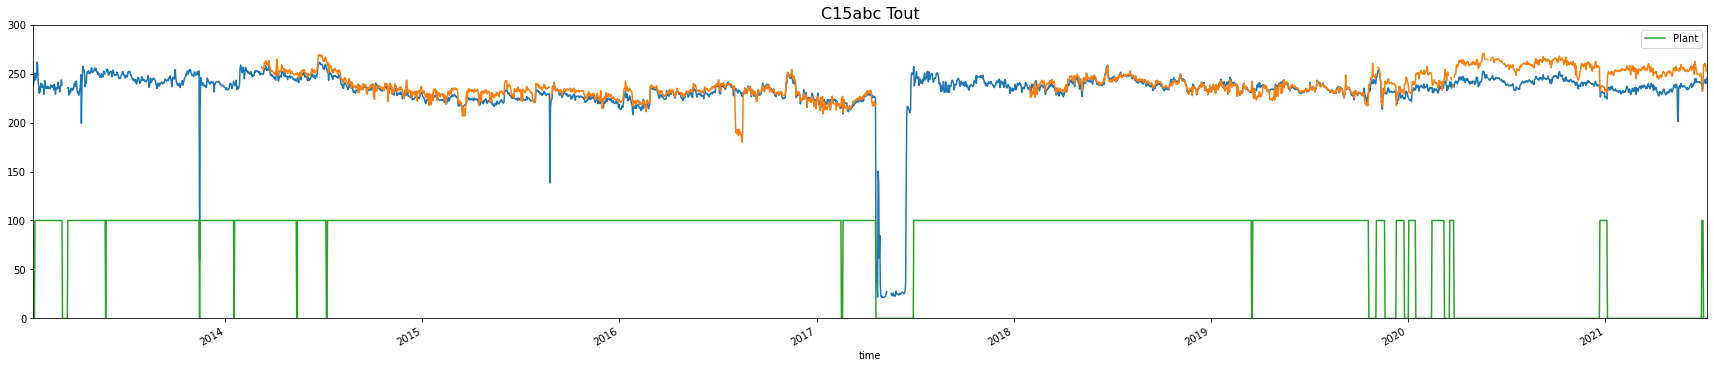

In [254]:
fig, ax = plt.subplots(figsize=(30,6))
ax.plot(df['c15abc_flashed_crude_tout'])
ax.plot(date_indx, c15abc_flashed_crude_tout_list)
plt.legend(['Plant', 'Calc'])
plt.grid()
plt.ylim(0,300)
plt.xlim(date_indx[0], date_indx[-1])
plt.title('C15abc Tout', size=16)

(df['j70abc_on_off']*100).plot()

Accuracy suffers when Refinery is running Crude only operation...Doesn't account for Crude from C72 going to Desalter inlet...


- if J70abc == 0 (ie crude only operation):
        - c7abc >> c9ab crude == crude + lssr
        - PFD liquid function should take in total crude flow to calc flashed_crude rate
        - C73 cold in = vfr_to_e3 rate only ie. no lssr



C71 and/or C72 exchagners are potentially bypassed??

Add option to select exchanger as offline on a given date. In which case, the tout = tin for both hot/cold streams... OR set U value to 0..

In [ ]:
desalter_temp_calc_list = []
pfd_temp_calc_list = []
c1ab_duty_calc_list = []
c2ab_duty_calc_list = []
c3_duty_calc_list = []
c4ab_duty_calc_list = []
c5ab_duty_calc_list = []
c6ab_duty_calc_list = []
c7ab_duty_calc_list = []
c8ab_duty_calc_list = []
c9ab_duty_calc_list = []
c10ab_duty_calc_list = []
c11_duty_calc_list = []
c12ab_duty_calc_list = []
c13ab_duty_calc_list = []
c14abcd_duty_calc_list = []
c15abc_duty_calc_list = []
c70ab_duty_calc_list = []
c71abc_duty_calc_list = []
c72abcd_duty_calc_list = []
c73ab_duty_calc_list = []

#crude temps
c1ab_crude_tout_list = []
c2ab_crude_tout_list = []
c3_crude_tout_list = []
c4ab_crude_tout_list = []
c5ab_crude_tout_list = []
c6ab_crude_tout_list = []
c7ab_crude_tout_list = []
c8ab_crude_tout_list = []
c9ab_crude_tout_list = []
c10ab_flashed_crude_tout_list = []
c11_flashed_crude_tout_list = []
c12ab_flashed_crude_tout_list = []
c13ab_flashed_crude_tout_list = []
c14abcd_flashed_crude_tout_list = []
c15abc_flashed_crude_tout_list = []
c70ab_crude_tout_list = []
c71abc_crude_tout_list = []
c72abcd_crude_tout_list = []
c73ab_crude_tout_list = []

#hvgo_pa temps

c12ab_hvgo_tout_list = []
c72abcd_hvgo_tout_list = []
c10ab_hvgo_tout_list = []
c8ab_hvgo_tout_list = []
c6ab_hvgo_tout_list = []

e7_feed_temp_list = []

#NEW U VALUES
c1ab_u_new_list= []
c1a_u_new_list= []
c1b_u_new_list= []
c2ab_u_new_list= []
c3_u_new_list= []
c4ab_u_new_list= []
c5ab_u_new_list= []
c6ab_u_new_list= []
c7ab_u_new_list= []
c8ab_u_new_list= []
c9ab_u_new_list= []
c10ab_u_new_list= []
c11_u_new_list= []
c12ab_u_new_list= []
c13ab_u_new_list= []
c14abcd_u_new_list= []
c15abc_u_new_list= []
c70ab_u_new_list= []
c71abc_u_new_list= []
c72abcd_u_new_list= []
c73ab_u_new_list= []

pht_error = []
pht_squared_error = []

date_indx = []


for date in df.index:
    
#for date in df[(df.index.year==2019)].index:
#for date in ['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01']:
#for date in ['2019-01-31']:

#select which data to use ie. from which date. Default will be latest measurements

# latest_date = df.index[-1]

# while True:
#     date = input("Enter date (yyyy-mm-dd). Leave blank to use latest : ")
    
#     if date == "":
#         date = latest_date
#         print(date)
#         break 
#     elif date not in df.index:
#         print("Invalid date")       
#     else:
#         break

#Extract the massflows and temperatures of inlet streams at the selected date

    try:
        #CRUDE ONLY OPERATION?
        crude_only_operation = (1 - df['j70abc_on_off'][date])
        
        #MASSFLOWS
        crude_tnh         = df['crude_tnh'].fillna(method='ffill')[date]
        c1a_crude_tnh     = df['c1a_crude_tnh'].fillna(method='ffill')[date]
        c1b_crude_tnh     = df['c1b_crude_tnh'].fillna(method='ffill')[date]
        flashed_crude_tnh = df['flashed_crude_tnh'].fillna(method='ffill')[date]

        lssr_tnh          = df['lssr_tnh'].fillna(method='ffill')[date]
        c73ab_e3_feed_tnh = df['c73ab_e3_feed_tnh'].fillna(method='ffill')[date]

        #PUMPAROUNDS
        c1a_e7_tpa_tnh    = df['c1a_e7_tpa_tnh'].fillna(method='ffill')[date]
        c1b_e7_tpa_tnh    = df['c1b_e7_tpa_tnh'].fillna(method='ffill')[date]

        e1_tpa_tnh        = df['e1_tpa_tnh'].fillna(method='ffill')[date]
        c2ab_e1_tpa_tnh   = df['c2ab_e1_tpa_tnh'].fillna(method='ffill')[date]
        c70ab_e1_tpa_tnh  = df['c70ab_e1_tpa_tnh'].fillna(method='ffill')[date]

        kpa_tnh           = df['kpa_tnh'].fillna(method='ffill')[date]
        lgo_pa_tnh        = df['lgo_pa_tnh'].fillna(method='ffill')[date]
        hgo_pa_tnh        = df['hgo_pa_tnh'].fillna(method='ffill')[date]
        e7_tpa_tnh        = df['e7_tpa_tnh'].fillna(method='ffill')[date]

        hvgo_pa_tnh       = df['hvgo_pa_tnh'].fillna(method='ffill')[date]
        hvgo_tnh = hvgo_pa_tnh

        c12ab_hvgo_tnh = df['c12ab_hvgo_tnh'].fillna(method='ffill')[date]
        c72abcd_hvgo_tnh = df['c72abcd_hvgo_tnh'].fillna(method='ffill')[date]
        e3_bpa_tnh         = df['e3_bpa_tnh'].fillna(method='ffill')[date]

        #PRODUCTS
        kero_prod_tnh     = df['kero_prod_tnh'].fillna(method='ffill')[date]
        lgo_prod_tnh      = df['lgo_prod_tnh'].fillna(method='ffill')[date]
        hgo_prod_tnh      = df['hgo_prod_tnh'].fillna(method='ffill')[date]
        e7_lvgo_prod_tnh  = df['e7_lvgo_prod_tnh'].fillna(method='ffill')[date]
        e3_lvgo_prod_tnh  = df['e3_lvgo_prod_tnh'].fillna(method='ffill')[date]
        hvgo_prod_tnh     = df['hvgo_prod_tnh'].fillna(method='ffill')[date]
        ar_tnh            = df['ar_tnh'].fillna(method='ffill')[date]
        c14abcd_ar_tnh    = df['c14abcd_ar_tnh'].fillna(method='ffill')[date]
        vfr_to_e3_tnh     = df['vfr_to_e3_tnh'].fillna(method='ffill')[date]
        vfr_to_fcc_tnh    = df['vfr_to_fcc_tnh'].fillna(method='ffill')[date]
        vr_tnh            = df['vr_tnh'].fillna(method='ffill')[date]
        vbr_tnh           = df['vbr_tnh'].fillna(method='ffill')[date]
        c71abc_vbr_tnh    = df['c71abc_vbr_tnh'].fillna(method='ffill')[date]

        #TEMPERATURES
        c1a_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]
        c1b_crude_tin     = df['c1a_crude_tin'].fillna(method='ffill')[date]

        #ADD FORMULA/FUNTION TO CALC FLASHED CRUDE TEMP

        c70ab_lssr_tin    = df['c70ab_lssr_tin'].fillna(method='ffill')[date]
        c1a_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
        c1b_e7_tpa_tin    = df['c1a_e7_tpa_tin'].fillna(method='ffill')[date]
        c2ab_e1_tpa_tin   = df['c2ab_e1_tpa_tin'].fillna(method='ffill')[date] 
        c3_kero_prod_tin  = df['c3_kero_prod_tin'].fillna(method='ffill')[date]  
        c4ab_kpa_tin      = df['c4ab_kpa_tin'].fillna(method='ffill')[date]      
        c5ab_lgo_prod_tin = df['c5ab_lgo_prod_tin'].fillna(method='ffill')[date]
        c7ab_hgo_prod_tin = df['c7ab_hgo_prod_tin'].fillna(method='ffill')[date]
        c9ab_lgo_pa_tin   = df['c9ab_lgo_pa_tin'].fillna(method='ffill')[date]
        c12ab_hvgo_tin  = df['c12ab_hvgo_tin'].fillna(method='ffill')[date]
        c13ab_hgo_pa_tin  = df['c13ab_hgo_pa_tin'].fillna(method='ffill')[date]
        c14abcd_ar_tin    = df['c14abcd_ar_tin'].fillna(method='ffill')[date]
        c73ab_e3_bpa_tin  = df['c73ab_e3_bpa_tin'].fillna(method='ffill')[date]
        c15abc_vbr_tin    = df['c15abc_vbr_tin_alt'].fillna(method='ffill')[date]    #use the alternative vbr measuremnent??
        c72abcd_hvgo_tin = df['c72abcd_hvgo_tin'].fillna(method='ffill')[date]


        #Pick out U values at selected date
        #convert units from  kcal/hr.m2C to w/m2.C
        #Forward fill missing values for now...

        c1ab_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
        c1a_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163
        c1b_ucalc1 = df['c1ab_ucalc1'].fillna(method='ffill')[date] * 1.163

        c2ab_ucalc1 = df['c2ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c3_ucalc1   = df['c3_ucalc1'].fillna(method='ffill')[date]* 1.163
        c4ab_ucalc1 = df['c4ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c5ab_ucalc1 = df['c5ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c6ab_ucalc1 = df['c6ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c7ab_ucalc1 = df['c7ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c8ab_ucalc1 = df['c8ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c9ab_ucalc1 = df['c9ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c10ab_ucalc1 = df['c10ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c11_ucalc1 = df['c11_ucalc1'].fillna(method='ffill')[date]* 1.163
        c12ab_ucalc1 = df['c12ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c13ab_ucalc1 = df['c13ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c14abcd_ucalc1 = df['c14abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
        c15abc_ucalc1 = df['c15abc_ucalc1'].fillna(method='ffill')[date]* 1.163
        c70ab_ucalc1 = df['c70ab_ucalc1'].fillna(method='ffill')[date]* 1.163
        c71abc_ucalc1 = df['c71abc_ucalc1'].fillna(method='ffill')[date]* 1.163
        c72abcd_ucalc1 = df['c72abcd_ucalc1'].fillna(method='ffill')[date]* 1.163
        c73ab_ucalc1 = df['c73ab_ucalc1'].fillna(method='ffill')[date]* 1.163

        #Set initialisation temperature to allow the program to solve
        init_temp = 99


        #Create the exchangers and streams
        c1a = Hex(name       ='c1a',
                  cold_in    = Stream(c1a_crude_tnh/3.6,   c1a_crude_tin,        stream_type='crude'), 
                  cold_out   = Stream(c1a_crude_tnh/3.6,   init_temp,            stream_type='crude'), 
                  hot_in     = Stream(c1a_e7_tpa_tnh/3.6 , c1a_e7_tpa_tin,       stream_type='e7_tpa'),
                  hot_out    = Stream(c1a_e7_tpa_tnh/3.6 , init_temp,            stream_type='e7_tpa'), 
                  u          = c1ab_ucalc1, 
                  area_shell = 269.4, 
                  n_shells   = 1
                  )

        c1b = Hex(name       ='c1b',
                  cold_in    = Stream(c1b_crude_tnh/3.6,  c1b_crude_tin,         stream_type='crude'), 
                  cold_out   = Stream(c1b_crude_tnh/3.6,  init_temp,             stream_type='crude'), 
                  hot_in     = Stream(c1b_e7_tpa_tnh/3.6, c1b_e7_tpa_tin,        stream_type='e7_tpa'),
                  hot_out    = Stream(c1b_e7_tpa_tnh/3.6, init_temp,             stream_type='e7_tpa'), 
                  u          = c1ab_ucalc1, 
                  area_shell = 269.4, 
                  n_shells   = 1
                  )

        c2ab = Hex(name       ='c2ab',
                   cold_in    = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6,       init_temp,           stream_type='crude'), 
                   hot_in     = Stream(c2ab_e1_tpa_tnh/3.6, c2ab_e1_tpa_tin,     stream_type='e1_tpa'),
                   hot_out    = Stream(c2ab_e1_tpa_tnh/3.6, init_temp,           stream_type='e1_tpa'), 
                   u          = c2ab_ucalc1, 
                   area_shell = 195.8, 
                   n_shells   = 2
                   )

        c3 = Hex(name        ='c3',
                  cold_in    = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
                  cold_out   = Stream(crude_tnh/3.6,     init_temp,               stream_type='crude'), 
                  hot_in     = Stream(kero_prod_tnh/3.6, c3_kero_prod_tin,        stream_type='kero'),
                  hot_out    = Stream(kero_prod_tnh/3.6, init_temp,               stream_type='kero'), 
                  u          = c3_ucalc1, 
                  area_shell = 233.4, 
                  n_shells   = 1
                  )

        c4ab = Hex(name       ='c4ab',
                   cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   hot_in     = Stream(kpa_tnh/3.6,   c4ab_kpa_tin,              stream_type='kero'),
                   hot_out    = Stream(kpa_tnh/3.6,   init_temp,                 stream_type='kero'), 
                   u          = c4ab_ucalc1, 
                   area_shell = 204.4, 
                   n_shells   = 2
                   )

        c5ab = Hex(name     ='c5ab',
                   cold_in    = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6, init_temp,                 stream_type='crude'), 
                   hot_in     = Stream(lgo_prod_tnh/3.6, c5ab_lgo_prod_tin,      stream_type='lgo'),
                   hot_out    = Stream(lgo_prod_tnh/3.6,  init_temp,             stream_type='lgo'), 
                   u          = c5ab_ucalc1, 
                   area_shell = 247.5, 
                   n_shells   = 2
                   )

        c6ab = Hex(name     ='c6ab',
                  cold_in    = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
                   cold_out   = Stream(crude_tnh/3.6,   init_temp,           stream_type='crude'), 
                   hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
                   hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
                   u          = c6ab_ucalc1, 
                   area_shell = 382.6, 
                   n_shells   = 2
                   )

        crude_lssr_tnh = crude_tnh + lssr_tnh*crude_only_operation
        
        c7ab = Hex(name     ='c7ab',
                  cold_in    = Stream(crude_lssr_tnh/3.6, init_temp,             stream_type='crude'), 
                   cold_out   = Stream(crude_lssr_tnh/3.6, init_temp,             stream_type='crude'), 
                   hot_in     = Stream(hgo_prod_tnh/3.6, c7ab_hgo_prod_tin,  stream_type='hgo'),
                   hot_out    = Stream(hgo_prod_tnh/3.6,  init_temp,         stream_type='hgo'), 
                   u          = c7ab_ucalc1, 
                   area_shell = 194.2, 
                   n_shells   = 2
                   )

        c8ab = Hex(name     ='c8ab',
                  cold_in    = Stream(crude_lssr_tnh/3.6,   init_temp,           stream_type='crude'), 
                   cold_out   = Stream(crude_lssr_tnh/3.6,   init_temp,           stream_type='crude'), 
                   hot_in     = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'),
                   hot_out    = Stream(hvgo_pa_tnh/3.6, init_temp,           stream_type='hvgo'), 
                   u          = c8ab_ucalc1, 
                   area_shell = 399.6, 
                   n_shells   = 2
                   )

        c9ab = Hex(name     ='c9ab',
                   cold_in    = Stream(crude_lssr_tnh/3.6,  init_temp,            stream_type='crude'), 
                   cold_out   = Stream(crude_lssr_tnh/3.6,  init_temp,            stream_type='crude'), 
                   hot_in     = Stream(lgo_pa_tnh/3.6, c9ab_lgo_pa_tin,      stream_type='lgo'),
                   hot_out    = Stream(lgo_pa_tnh/3.6, init_temp,            stream_type='lgo'), 
                   u          = c9ab_ucalc1, 
                   area_shell = 207.6, 
                   n_shells   = 2
                  )

        c10ab = Hex(name      ='c10ab',
                   cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'),
                   hot_out    = Stream(hvgo_pa_tnh/3.6,         init_temp, stream_type='hvgo'), 
                   u          = c10ab_ucalc1, 
                   area_shell = 351.1, 
                   n_shells   = 2
                   )

        c11 = Hex(name        ='c11',
                   cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'),
                   hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
                   u          = c11_ucalc1, 
                   area_shell = 341.7, 
                   n_shells   = 1
                   )

        c12ab = Hex(name      ='c12ab',
                   cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(c12ab_hvgo_tnh/3.6,      c12ab_hvgo_tin, stream_type='hvgo'),
                   hot_out    = Stream(c12ab_hvgo_tnh/3.6,      init_temp, stream_type='hvgo'), 
                   u          = c12ab_ucalc1, 
                   area_shell = 264.2, 
                   n_shells   = 2
                   )

        c13ab = Hex(name      ='c13ab',
                  cold_in     = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(hgo_pa_tnh/3.6,         c13ab_hgo_pa_tin, stream_type='hgo'),
                   hot_out    = Stream(hgo_pa_tnh/3.6,         init_temp, stream_type='hgo'), 
                   u          = c13ab_ucalc1, 
                   area_shell = 178.8, 
                   n_shells   = 2
                   )

        c14abcd = Hex(name    ='c14abcd',
                   cold_in    = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,  init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(ar_tnh/3.6,             c14abcd_ar_tin, stream_type='ar'),
                   hot_out    = Stream(ar_tnh/3.6,             init_temp, stream_type='ar'), 
                   u          = c14abcd_ucalc1, 
                   area_shell = 207.8, 
                   n_shells   = 4
                   )           

        c15abc = Hex(name     ='c15abc',
                   cold_in    = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   cold_out   = Stream(flashed_crude_tnh/3.6,   init_temp, stream_type='flashed_crude'), 
                   hot_in     = Stream(vbr_tnh/3.6,             c15abc_vbr_tin, stream_type='ar'),
                   hot_out    = Stream(vbr_tnh/3.6,             init_temp, stream_type='ar'), 
                   u          = c15abc_ucalc1, 
                   area_shell = 155.7, 
                   n_shells   = 3
                   )           

        c70ab = Hex(name      ='c70ab',
                   cold_in    = Stream(lssr_tnh/3.6,          c70ab_lssr_tin,         stream_type='lssr'), 
                   cold_out   = Stream(lssr_tnh/3.6,          init_temp,              stream_type='lssr'), 
                   hot_in     = Stream(c70ab_e1_tpa_tnh/3.6,  c2ab_e1_tpa_tin,        stream_type='e1_tpa'),
                   hot_out    = Stream(c70ab_e1_tpa_tnh/3.6,  init_temp,              stream_type='e1_tpa'), 
                   u          = c70ab_ucalc1, 
                   area_shell = 173.2, 
                   n_shells   = 2
                   )           

        c71abc = Hex(name     ='c71abc',
                   cold_in    = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
                   cold_out   = Stream(lssr_tnh/3.6,        init_temp, stream_type='lssr'), 
                   hot_in     = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'),
                   hot_out    = Stream(c71abc_vbr_tnh/3.6,  init_temp, stream_type='vbr'), 
                   u          = c71abc_ucalc1, 
                   area_shell = 175.2, 
                   n_shells   = 3
                   )             

        c72abcd = Hex(name    ='c72abcd',
                   cold_in    = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
                   cold_out   = Stream(lssr_tnh/3.6,             init_temp,           stream_type='lssr'), 
                   hot_in     = Stream(c72abcd_hvgo_tnh/3.6,  c72abcd_hvgo_tin, stream_type='hvgo'),
                   hot_out    = Stream(c72abcd_hvgo_tnh/3.6,  init_temp,           stream_type='hvgo'), 
                   u          = c72abcd_ucalc1, 
                   area_shell = 196.6, 
                   n_shells   = 4
                   )            

        vfr_to_e3      = Stream(vfr_to_e3_tnh/3.6, 255, stream_type='lssr')     #enter estimated vfr temp for now. Assume lssr for cp calc

        c73ab = Hex(name      ='c73ab',
                   cold_in    = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
                   cold_out   = Stream(c73ab_e3_feed_tnh/3.6,        init_temp, stream_type='lssr'), 
                   hot_in     = Stream(e3_bpa_tnh/3.6,  c73ab_e3_bpa_tin, stream_type='vr'),
                   hot_out    = Stream(e3_bpa_tnh/3.6,  init_temp, stream_type='vr'), 
                   u          = c73ab_ucalc1, 
                   area_shell = 321.2, 
                   n_shells   = 2
                   )  

        u_tuned_dict = {}

        for hx in ordered_hex_list:
            try:
                if hx =='c70ab'or hx=='c71abc' or hx=='c72abcd':
                    cold_stream = 'lssr'
                elif hx == 'c73ab':
                    cold_stream = 'e3_feed'
                elif hx =='c10ab'or hx=='c11' or hx=='c12ab' or hx=='c13ab' or hx=='c14abcd' or hx=='c15abc':
                    cold_stream = 'flashed_crude'
                else:
                    cold_stream = 'crude'

                #connect calculated hot_in temps to appropriate exchangers
                if hx=='c6ab':
                    c6ab.hot_in.temp = c8ab.hot_out.temp
                elif hx=='c8ab':
                    c8ab.hot_in.temp = c10ab.hot_out.temp
                elif hx=='c10ab':
                    c10ab.hot_in.temp = stream_mixer_temp(c12ab.hot_out, c72abcd.hot_out)
                elif hx=='c11':
                    c11.hot_in.temp = c13ab.hot_out.temp
                else:
                    pass #and hot in temp from inlet stream plant data 

                hex_calc = effectiveness_NTU_method(
                            mh = globals()[hx].hot_in.massflow, 
                            mc = globals()[hx].cold_in.massflow,
                            Cph = df[hx+'_'+hot_stream_dict[hx]+'_cp'][date]*1000*4.1868,
                            Cpc = df[hx+'_'+cold_stream+'_cp'][date]*1000*4.1868,
                            subtype = str(globals()[hx].n_shells)+'S&T',
                            Thi =  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date],
                            Tho = None,
                            Tci = df[hx+'_'+cold_stream+'_tin'][date],
                            Tco = df[hx+'_'+cold_stream+'_tout'][date],
                            UA = None,)
                #print(f"{hx} U_initial:  {hex_calc['Q'] / (hex_area[hx] *lmtd(hex_calc['Thi'], hex_calc['Tho'], hex_calc['Tci'], hex_calc['Tco']))}")

                #update Cph calc with new Tho
                for i in range(0,4):
                    hex_calc = effectiveness_NTU_method(
                                mh = globals()[hx].hot_in.massflow, 
                                mc = globals()[hx].cold_in.massflow,
                                Cph = globals()[hot_stream_cp_dict[hx]+'_cp'](hex_calc['Thi'], hex_calc['Tho'], units='j_kg.c'),
                                Cpc = df[hx+'_'+cold_stream+'_cp'][date]*1000*4.1868,
                                subtype = str(globals()[hx].n_shells)+'S&T',
                                Thi =  df[hx+'_'+hot_stream_dict[hx]+'_tin'][date],
                                Tho = None,
                                Tci = df[hx+'_'+cold_stream+'_tin'][date],
                                Tco = df[hx+'_'+cold_stream+'_tout'][date],
                                UA = None,)
                    #print(f"{hx} U_new:  {hex_calc['Q'] / (hex_area[hx] *lmtd(hex_calc['Thi'], hex_calc['Tho'], hex_calc['Tci'], hex_calc['Tco']))}")       

                u_tuned = hex_calc['Q']/(hex_area[str(hx)] * lmtd(hex_calc['Thi'], hex_calc['Tho'] , hex_calc['Tci'], hex_calc['Tco']))
                if np.isnan(u_tuned):
                    #revert to original ucalc1 if calc fails
                    u_tuned_dict[hx] = globals()[hx+'_ucalc1']
                    #print(date, hx, globals()[hx+'_ucalc1'])
                else:
                    u_tuned_dict[hx]=u_tuned

                #update hot_out temps so they can be used in subsequent exchangers where required eg c6/8/10
                globals()[hx].hot_out.temp = tho
                
            except:
                u_tuned_dict[hx] = globals()[hx+'_ucalc1']
                #print(hx, globals()[hx+'_ucalc1'])
                
        c1ab_ucalc_new = u_tuned_dict['c1a']
        c2ab_ucalc_new = u_tuned_dict['c2ab']
        c3_ucalc_new   = u_tuned_dict['c3']
        c4ab_ucalc_new = u_tuned_dict['c4ab']
        c5ab_ucalc_new = u_tuned_dict['c5ab']
        c6ab_ucalc_new = u_tuned_dict['c6ab']
        c7ab_ucalc_new = u_tuned_dict['c7ab']
        c8ab_ucalc_new = u_tuned_dict['c8ab']
        c9ab_ucalc_new = u_tuned_dict['c9ab']
        c10ab_ucalc_new = u_tuned_dict['c10ab']
        c11_ucalc_new = u_tuned_dict['c11']
        c12ab_ucalc_new = u_tuned_dict['c12ab']
        c13ab_ucalc_new = u_tuned_dict['c13ab']
        c14abcd_ucalc_new = u_tuned_dict['c14abcd']
        c15abc_ucalc_new = u_tuned_dict['c15abc']
        c70ab_ucalc_new = u_tuned_dict['c70ab']
        c71abc_ucalc_new = u_tuned_dict['c71abc']
        c72abcd_ucalc_new = u_tuned_dict['c72abcd']
        c73ab_ucalc_new = u_tuned_dict['c73ab']


        #update exchangers/streams
        for i in range(0,50):

            c1a = Hex(name     ='c1a',
                      cold_in    = c1a.cold_in, 
                      cold_out   = c1a.cold_stream_out(), 
                      hot_in     = c1a.hot_in,
                      hot_out    = c1a.hot_stream_out(), 
                      u          = c1ab_ucalc_new, 
                      area_shell = 269.4, 
                      n_shells   = 1
                      )

            c1b = Hex(name     ='c1b',
                      cold_in    = c1b.cold_in, 
                      cold_out   = c1b.cold_stream_out(), 
                      hot_in     = c1b.hot_in,
                      hot_out    = c1b.hot_stream_out(), 
                      u          = c1ab_ucalc_new, 
                      area_shell = 269.4, 
                      n_shells   = 1
                      )

            c2ab = Hex(name     ='c2ab',
                       cold_in    = stream_mixer(c1a.cold_stream_out(), c1b.cold_stream_out()), 
                       cold_out   = c2ab.cold_stream_out(), 
                       hot_in     = c2ab.hot_in,
                       hot_out    = c2ab.hot_stream_out(), 
                       u          = c2ab_ucalc_new, 
                       area_shell = 195.8, 
                       n_shells   = 2
                       )

            c3 = Hex(name     ='c3',
                      cold_in    = c2ab.cold_stream_out(), 
                      cold_out   = c3.cold_stream_out(), 
                      hot_in     = c3.hot_in,
                      hot_out    = c3.hot_stream_out(), 
                      u          = c3_ucalc_new, 
                      area_shell = 233.4, 
                      n_shells   = 1
                      )

            c4ab = Hex(name     ='c4ab',
                       cold_in    = c3.cold_stream_out(), 
                       cold_out   = c4ab.cold_stream_out(), 
                       hot_in     = c4ab.hot_in,
                       hot_out    = c4ab.hot_stream_out(), 
                       u          = c4ab_ucalc_new, 
                       area_shell = 204.4, 
                       n_shells   = 2
                       )

            c5ab = Hex(name     ='c5ab',
                       cold_in    = c4ab.cold_stream_out(), 
                       cold_out   = c5ab.cold_stream_out(), 
                       hot_in     = c5ab.hot_in,
                       hot_out    = c5ab.hot_stream_out(), 
                       u          = c5ab_ucalc_new, 
                       area_shell = 247.5, 
                       n_shells   = 2
                       )

            #Crude only operation
            Stream(crude_lssr_tnh)
            
            c6ab = Hex(name     ='c6ab',
                       cold_in    = c5ab.cold_stream_out(), 
                       cold_out   = c6ab.cold_stream_out(), 
                       hot_in     = c8ab.hot_stream_out(),
                       hot_out    = c6ab.hot_stream_out(), 
                       u          = c6ab_ucalc_new, 
                       area_shell = 382.6, 
                       n_shells   = 2
                       )

            c7ab = Hex(name     ='c7ab',
                       cold_in    = Stream(crude_tnh/3.6,    c6ab.cold_tout()-5, stream_type='crude'),   #estimate desalter temp drop for now 
                       cold_out   = c7ab.cold_stream_out(), 
                       hot_in     = c7ab.hot_in,
                       hot_out    = c7ab.hot_stream_out(), 
                       u          = c7ab_ucalc_new, 
                       area_shell = 194.2, 
                       n_shells   = 2
                       )

            c8ab = Hex(name     ='c8ab',
                       cold_in    = c7ab.cold_stream_out(), 
                       cold_out   = c8ab.cold_stream_out(), 
                       hot_in     = c10ab.hot_stream_out(),
                       hot_out    = c8ab.hot_stream_out(), 
                       u          = c8ab_ucalc_new, 
                       area_shell = 399.6, 
                       n_shells   = 2
                       )

            c9ab = Hex(name     ='c9ab',
                       cold_in    = c8ab.cold_stream_out(), 
                       cold_out   = c9ab.cold_stream_out(), 
                       hot_in     = c9ab.hot_in,
                       hot_out    = c9ab.hot_stream_out(), 
                       u          = c9ab_ucalc_new, 
                       area_shell = 207.6, 
                       n_shells   = 2
                      )

            c10ab = Hex(name     ='c10ab',
                       cold_in   = Stream(flashed_crude_tnh/3.6,   c9ab.cold_tout()-6 , stream_type='crude'),  #estimate temp drop over pre-flash drum for now
                       cold_out   = c10ab.cold_stream_out(), 
                       hot_in     = stream_mixer(c12ab.hot_stream_out(), c72abcd.hot_stream_out()),
                       hot_out    = c10ab.hot_stream_out(), 
                       u          = c10ab_ucalc_new, 
                       area_shell = 351.1, 
                       n_shells   = 2
                       )

            c11 = Hex(name     ='c11',
                       cold_in     = c10ab.cold_stream_out(), 
                       cold_out   = c11.cold_stream_out(), 
                       hot_in     = c13ab.hot_stream_out(),
                       hot_out    = c11.hot_stream_out(), 
                       u          = c11_ucalc_new, 
                       area_shell = 341.7, 
                       n_shells   = 1
                       )

            c12ab = Hex(name     ='c12ab',
                       cold_in   = c11.cold_stream_out(), 
                       cold_out   = c12ab.cold_stream_out(), 
                       hot_in     = c12ab.hot_in,
                       hot_out    = c12ab.hot_stream_out(), 
                       u          = c12ab_ucalc_new, 
                       area_shell = 264.2, 
                       n_shells   = 2
                       )

            c13ab = Hex(name     ='c13ab',
                       cold_in   = c12ab.cold_stream_out(), 
                       cold_out   = c13ab.cold_stream_out(), 
                       hot_in     = c13ab.hot_in,
                       hot_out    = c13ab.hot_stream_out(), 
                       u          = c13ab_ucalc_new, 
                       area_shell = 178.8, 
                       n_shells   = 2
                       )

            #Calc AR to c14 to match target VF feed temp
            c14abcd_ar_tnh = ar_tnh
            c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14abcd.hot_in.temp, stream_type='ar')

            e7_feed_target_temp = 280
            c14abcd_ar_tnh = ar_tnh * (e7_feed_target_temp - c14_bypass.temp) / (c14abcd.hot_tout() - c14abcd.hot_in.temp)

            if c14abcd_ar_tnh > ar_tnh:
                c14abcd_ar_tnh = ar_tnh
            elif c14abcd_ar_tnh < 0:
                c14abcd_ar_tnh = 0
            else:
                pass

            c14_bypass = Stream((ar_tnh - c14abcd_ar_tnh)*(1000/3600), c14_bypass.temp, stream_type='ar')

            c14abcd = Hex(name    ='c14abcd',
                       cold_in    = c13ab.cold_stream_out(), 
                       cold_out   = c14abcd.cold_stream_out(), 
                       hot_in     = Stream(c14abcd_ar_tnh/3.6, c14abcd_ar_tin, stream_type='ar'),
                       hot_out    = c14abcd.hot_stream_out(), 
                       u          = c14abcd_ucalc_new, 
                       area_shell = 207.8, 
                       n_shells   = 4
                       )           

            e7_feed = stream_mixer(c14abcd.hot_stream_out(), c14_bypass)

            c15abc = Hex(name     ='c15abc',
                       cold_in    = c14abcd.cold_stream_out(), 
                       cold_out   = c15abc.cold_stream_out(), 
                       hot_in     = c15abc.hot_in,
                       hot_out    = c15abc.hot_stream_out(), 
                       u          = c15abc_ucalc_new, 
                       area_shell = 155.7, 
                       n_shells   = 3
                       )           

            c70ab = Hex(name     ='c70ab',
                       cold_in   = c70ab.cold_in, 
                       cold_out   = c70ab.cold_stream_out(), 
                       hot_in     = c70ab.hot_in,
                       hot_out    = c70ab.hot_stream_out(), 
                       u          = c70ab_ucalc_new, 
                       area_shell = 173.2, 
                       n_shells   = 2
                       )           

            c71abc = Hex(name     ='c71abc',
                       cold_in    = c70ab.cold_stream_out(), 
                       cold_out   = c71abc.cold_stream_out(), 
                       hot_in     = Stream(c71abc_vbr_tnh/3.6,  c15abc.hot_tout(),  stream_type='vbr'),
                       hot_out    = c71abc.hot_stream_out(), 
                       u          = c71abc_ucalc_new, 
                       area_shell = 175.2, 
                       n_shells   = 3
                       )             

            c72abcd = Hex(name    ='c72abcd',
                       cold_in    = c71abc.cold_stream_out(), 
                       cold_out   = c72abcd.cold_stream_out(), 
                       hot_in     = c72abcd.hot_in,
                       hot_out    = c72abcd.hot_stream_out(), 
                       u          = c72abcd_ucalc_new, 
                       area_shell = 196.6, 
                       n_shells   = 4
                       )            

            c73ab = Hex(name      ='c73ab',
                       cold_in    = stream_mixer(vfr_to_e3, c72abcd.cold_stream_out()),  # if crude only op then lssrdoesnt go to c73 #assumes vfr and lssr are similar for the sake of cp calc
                       cold_out   = c73ab.cold_stream_out(), 
                       hot_in     = c73ab.hot_in,
                       hot_out    = c73ab.hot_stream_out(), 
                       u          = c73ab_ucalc_new, 
                       area_shell = 321.2, 
                       n_shells   = 2
                       )         


        #HEX DUTIES

        desalter_temp_calc_list.append(c6ab.cold_tout())
        pfd_temp_calc_list.append(c9ab.cold_tout())
        c1ab_duty_calc_list.append(c1a.duty_cold() + c1b.duty_cold())
        c2ab_duty_calc_list.append(c2ab.duty_cold())
        c3_duty_calc_list.append(c3.duty_cold())
        c4ab_duty_calc_list.append(c4ab.duty_cold())
        c5ab_duty_calc_list.append(c5ab.duty_cold())
        c6ab_duty_calc_list.append(c6ab.duty_cold())
        c7ab_duty_calc_list.append(c7ab.duty_cold())
        c8ab_duty_calc_list.append(c8ab.duty_cold())
        c9ab_duty_calc_list.append(c9ab.duty_cold())
        c10ab_duty_calc_list.append(c10ab.duty_cold())
        c11_duty_calc_list.append(c11.duty_cold())
        c12ab_duty_calc_list.append(c12ab.duty_cold())
        c13ab_duty_calc_list.append(c13ab.duty_cold())
        c14abcd_duty_calc_list.append(c14abcd.duty_cold())
        c15abc_duty_calc_list.append(c15abc.duty_cold())
        c70ab_duty_calc_list.append(c70ab.duty_cold())
        c71abc_duty_calc_list.append(c71abc.duty_cold())
        c72abcd_duty_calc_list.append(c72abcd.duty_cold())
        c73ab_duty_calc_list.append(c73ab.duty_cold())

        #STREAM TEMPERATURES
        c1ab_crude_tout_list.append(0.5* (c1a.cold_tout() + c1b.cold_tout()))
        c2ab_crude_tout_list.append(c2ab.cold_tout())
        c3_crude_tout_list.append(c3.cold_tout())
        c4ab_crude_tout_list.append(c4ab.cold_tout())
        c5ab_crude_tout_list.append(c5ab.cold_tout())
        c6ab_crude_tout_list.append(c6ab.cold_tout())
        c7ab_crude_tout_list.append(c7ab.cold_tout())
        c8ab_crude_tout_list.append(c8ab.cold_tout())
        c9ab_crude_tout_list.append(c9ab.cold_tout())
        c10ab_flashed_crude_tout_list.append(c10ab.cold_tout())
        c11_flashed_crude_tout_list.append(c11.cold_tout())
        c12ab_flashed_crude_tout_list.append(c12ab.cold_tout())
        c13ab_flashed_crude_tout_list.append(c13ab.cold_tout())
        c14abcd_flashed_crude_tout_list.append(c14abcd.cold_tout())
        c15abc_flashed_crude_tout_list.append(c15abc.cold_tout())
        c70ab_crude_tout_list.append(c70ab.cold_tout())
        c71abc_crude_tout_list.append(c71abc.cold_tout())
        c72abcd_crude_tout_list.append(c72abcd.cold_tout())
        c73ab_crude_tout_list.append(c73ab.cold_tout())

        c12ab_hvgo_tout_list.append(c12ab.hot_tout())
        c72abcd_hvgo_tout_list.append(c72abcd.hot_tout())
        c10ab_hvgo_tout_list.append(c10ab.hot_tout())
        c8ab_hvgo_tout_list.append(c8ab.hot_tout())
        c6ab_hvgo_tout_list.append(c6ab.hot_tout())

        e7_feed_temp_list.append(e7_feed.temp)

        #NEW U VALUES
        c1ab_u_new_list.append(c1ab_ucalc_new)
        c1a_u_new_list.append(c1a_ucalc_new)
        c1b_u_new_list.append(c1a_ucalc_new)

        c2ab_u_new_list.append(c2ab_ucalc_new)
        c3_u_new_list.append(c3_ucalc_new)
        c4ab_u_new_list.append(c4ab_ucalc_new)
        c5ab_u_new_list.append(c5ab_ucalc_new)
        c6ab_u_new_list.append(c6ab_ucalc_new)
        c7ab_u_new_list.append(c7ab_ucalc_new)
        c8ab_u_new_list.append(c8ab_ucalc_new)
        c9ab_u_new_list.append(c9ab_ucalc_new)
        c10ab_u_new_list.append(c10ab_ucalc_new)
        c11_u_new_list.append(c11_ucalc_new)
        c12ab_u_new_list.append(c12ab_ucalc_new)
        c13ab_u_new_list.append(c13ab_ucalc_new)
        c14abcd_u_new_list.append(c14abcd_ucalc_new)
        c15abc_u_new_list.append(c15abc_ucalc_new)
        c70ab_u_new_list.append(c70ab_ucalc_new)
        c71abc_u_new_list.append(c71abc_ucalc_new)
        c72abcd_u_new_list.append(c72abcd_ucalc_new)
        c73ab_u_new_list.append(c73ab_ucalc_new)

        pht_error.append(abs(c15abc.cold_stream_out().temp - df['c15abc_flashed_crude_tout'][date]))
        pht_squared_error.append((c15abc.cold_tout() - df['c15abc_flashed_crude_tout'][date])**2)

        date_indx.append(date)

    except:
        print(date)


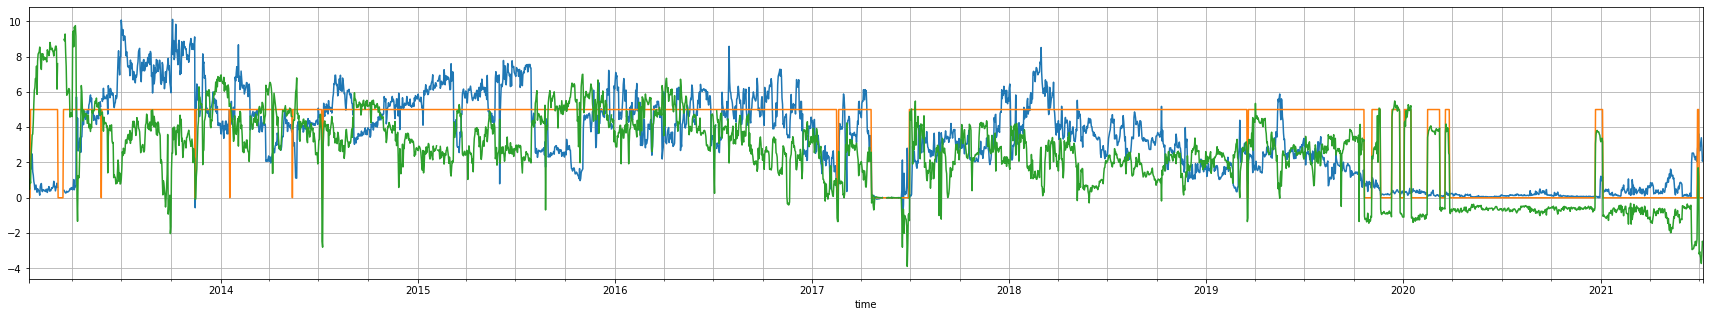

In [259]:
df['c71abc_lssr_gcalh'].plot(figsize=(30,5))
(df['j70abc_on_off']*5).plot()
df['c72abcd_lssr_gcalh'].plot()
plt.grid(which="both")

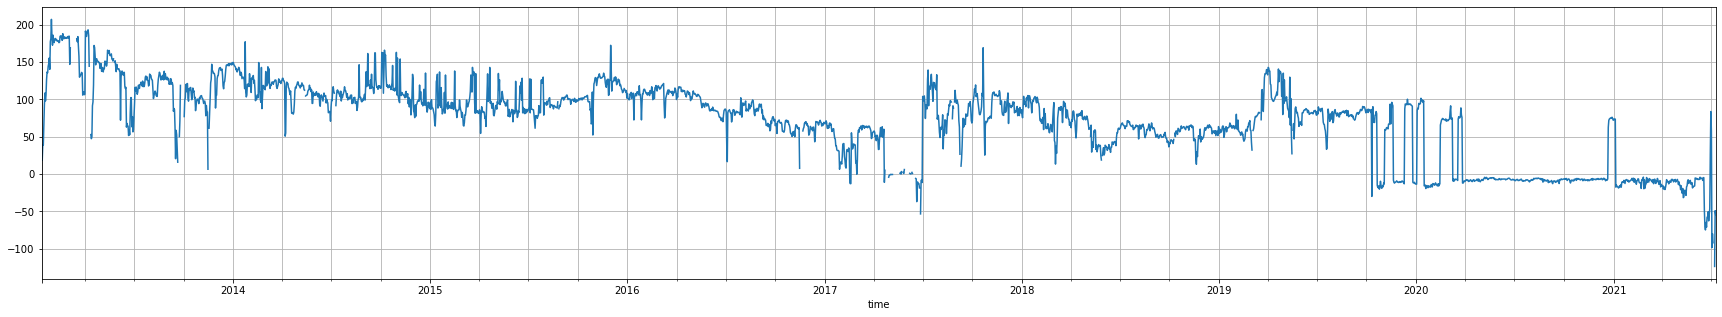

In [263]:
df['c72abcd_ucalc1'].plot(figsize=(30,5))
plt.grid(which="both")

In [ ]:
fig, ax = plt.subplots(figsize=(30,6))
ax.plot(df['c72abcd_lssr_tin'])
ax.plot(date_indx, c15abc_flashed_crude_tout_list)
plt.legend(['Plant', 'Calc'])
plt.grid()
plt.ylim(0,300)
plt.xlim(date_indx[0], date_indx[-1])
plt.title('C15abc Tout', size=16)

(df['j70abc_on_off']*100).plot()

In [187]:
date = ('2021-06-30')

us = df[df.index==date][[col for col in df.columns if 'ucalc1' in col]].T

In [188]:
us

time,2021-06-30
c1ab_ucalc1,234.837973
c2ab_ucalc1,245.517901
c3_ucalc1,146.250563
c4ab_ucalc1,186.167943
c5ab_ucalc1,136.835101
c6ab_ucalc1,191.817434
c7ab_ucalc1,30.541050
c8ab_ucalc1,207.600402
c9ab_ucalc1,76.199231
c10ab_ucalc1,285.829144


In [191]:
df[df.index.year > 2019][[col for col in df.columns if 'ucalc1' in col]].mean()

c1ab_ucalc1       205.010268
c2ab_ucalc1       192.311310
c3_ucalc1         139.284648
c4ab_ucalc1       174.785871
c5ab_ucalc1       106.480967
c6ab_ucalc1       403.789299
c7ab_ucalc1              inf
c8ab_ucalc1       189.934274
c9ab_ucalc1        73.332074
c10ab_ucalc1      375.107803
c11_ucalc1        238.818897
c12ab_ucalc1      100.180466
c13ab_ucalc1      255.592926
c14abcd_ucalc1     81.102671
c15abc_ucalc1      28.477816
c70ab_ucalc1      128.150791
c71abc_ucalc1       5.139041
c72abcd_ucalc1     -3.004496
c73ab_ucalc1       50.847236
dtype: float64

In [165]:
exchanger = 'c73ab'

us.loc[(exchanger+'_ucalc1')][0] * hex_area[exchanger]

32495.55969628424

In [176]:
df[df.index==date][[col for col in df.columns if 'c14abcd' in col]].T

time,2021-06-30
c14abcd_crude_pout,14.255752
c14abcd_flashed_crude_tout,223.820694
c14abcd_ar_m3h,70.420692
c14abcd_ar_tin,317.083496
c14abcd_ar_tout,253.588791
c14abcd_flashed_crude_tin,210.887558
c14abcd_lmtd,64.723486
c14abcd_flashed_crude_cp,0.646754
c14abcd_ar_cp,0.677569
c14abcd_flashed_crude_gcalh,3.461601


In [ ]:
total_hex_duty_calc_list = [sum(x) for x in zip(c1ab_duty_calc_list,
c2ab_duty_calc_list,
c3_duty_calc_list,
c4ab_duty_calc_list,
c5ab_duty_calc_list,
c6ab_duty_calc_list,
c7ab_duty_calc_list,
c8ab_duty_calc_list,
c9ab_duty_calc_list,
c10ab_duty_calc_list,
c11_duty_calc_list,
c12ab_duty_calc_list,
c13ab_duty_calc_list,
c14abcd_duty_calc_list,
c15abc_duty_calc_list,
c70ab_duty_calc_list,
c71abc_duty_calc_list,
c72abcd_duty_calc_list)]